LOAD DATA

In [48]:
# import pandas as pd

# # Baca file .xlsx
# df = pd.read_excel("Song_data_Final_dB_Fix.xlsx")

# # Simpan sebagai CSV
# df.to_csv("Song_data_FINAL_dB_Fix.csv", index=False)

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
grammys_df = pd.read_csv("grammys_data_FINAL.csv")
lyrics_df = pd.read_csv("lyrics_data_sentiment.csv")
artists_df = pd.read_csv("artists_data_FINAL.csv")
songs_df = pd.read_csv("songs_data_FINAL_am.csv")
hot_df = pd.read_csv("hot100_FINAL.csv")
grammys_5_df = pd.read_csv("grammys_5_cat.csv")

In [45]:
songs_df['ArtistID'].isna().sum()

np.int64(0)

In [51]:
missing_count = songs_df['ArtistID'].isna().sum()
total_count = len(songs_df)
print(total_count)

missing_percentage = (missing_count / total_count) * 100
print(f"Missing Release Date: {missing_percentage:.2f}%")


11489
Missing Release Date: 0.00%


TOP 10 ARTIST WITH THE MOST GRAMMY WINS

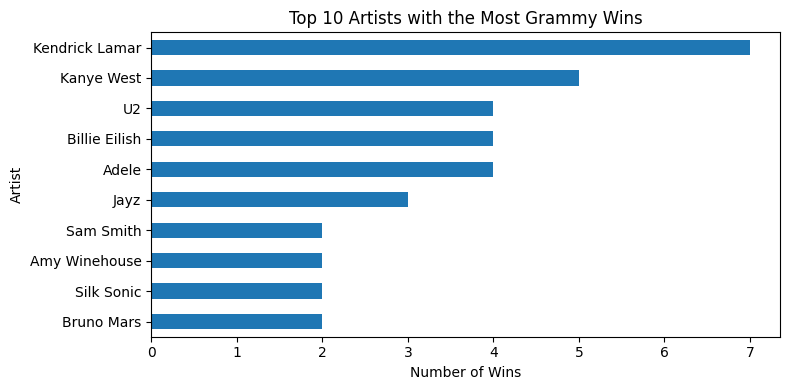

In [52]:
# Count wins per artist and get top 10
artist_wins = grammys_df[grammys_df["Win"] == 1]["Cleaned Main Artist"].value_counts().head(10)

# Sort so highest is on top in horizontal bar plot
artist_wins = artist_wins.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 4))
artist_wins.plot(kind="barh")
plt.title("Top 10 Artists with the Most Grammy Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


DISTRIBUTION OF GENRES IN THE DATASET (GROUPED SMALL GENRES AS 'OTHERS')

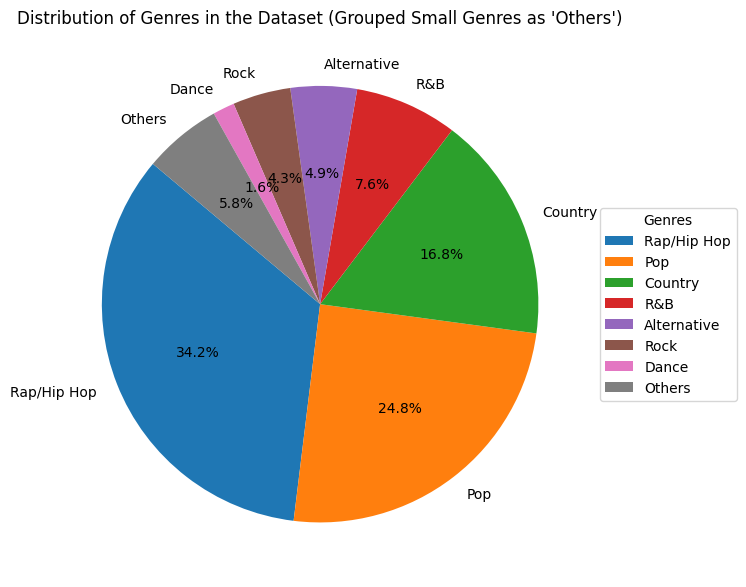

In [53]:
# Count the number of songs per genre
genre_counts = lyrics_df['Genre'].value_counts()

# Set threshold (1.6%)
threshold = 0.016
total_songs = genre_counts.sum()

# Separate genres above and below the threshold
large_genres = genre_counts[genre_counts / total_songs >= threshold]
small_genres = genre_counts[genre_counts / total_songs < threshold]

# Create modified genre count with "Others"
genre_counts_modified = large_genres.copy()
genre_counts_modified['Others'] = small_genres.sum()

# Plot with labels in pie and legend on the side
plt.figure(figsize=(7.5, 7.5))
patches, texts, autotexts = plt.pie(
    genre_counts_modified,
    labels=genre_counts_modified.index,         # show genre names in the pie
    autopct='%1.1f%%',
    startangle=140
)

# Add a legend on the right
plt.legend(
    patches,
    genre_counts_modified.index,
    title="Genres",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Distribution of Genres in the Dataset (Grouped Small Genres as 'Others')")
plt.tight_layout()
plt.show()

DITRIBUTION OF SONG LANGUAGES (GROUPED RARE LANGUAGES AS 'OTHERS')

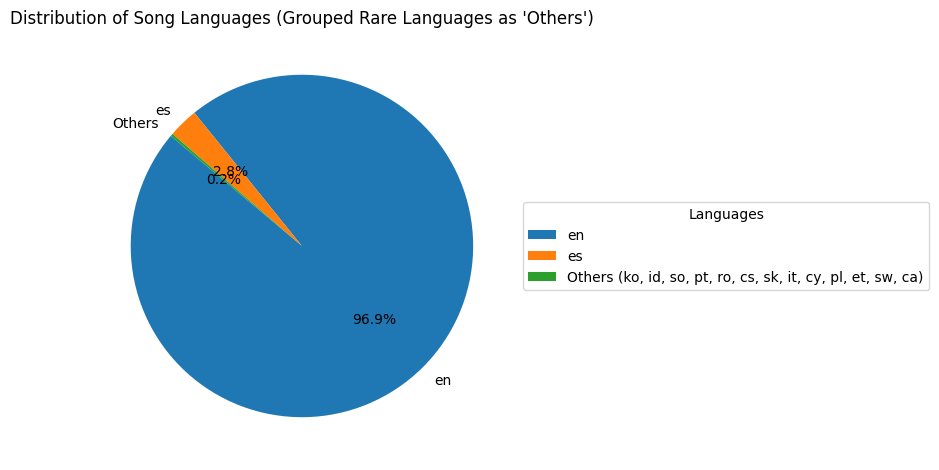

In [54]:
# Count songs per language
language_counts = lyrics_df['Song Language'].value_counts()

# Set threshold
threshold = 0.016
total_languages = language_counts.sum()

# Separate common and rare languages
common_languages = language_counts[language_counts / total_languages >= threshold]
rare_languages = language_counts[language_counts / total_languages < threshold]

# Create modified language counts with 'Others'
language_counts_modified = common_languages.copy()
language_counts_modified['Others'] = rare_languages.sum()

# Create custom label for legend
rare_labels = ", ".join(rare_languages.index.tolist())
custom_labels = language_counts_modified.index.tolist()
custom_labels[-1] = f"Others ({rare_labels})"  # Replace last label with detailed list

# Plot pie chart
plt.figure(figsize=(8.5, 8))
patches, texts, autotexts = plt.pie(
    language_counts_modified,
    labels=language_counts_modified.index,  # still shows basic labels in pie
    autopct='%1.1f%%',
    startangle=140
)

# Add custom legend with expanded 'Others'
plt.legend(
    patches,
    custom_labels,
    title="Languages",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Distribution of Song Languages (Grouped Rare Languages as 'Others')")
plt.tight_layout()
plt.show()


NUMBER OF SONGS PER SENTIMENT LABEL (VERY POSITIVE, VERY NEGATIVE, NEUTRAL, POSITIVE, NEGATIVE)

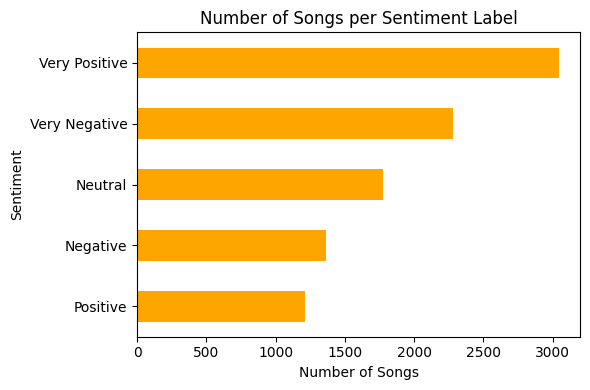

In [55]:
#Count and sort sentiment labels in ascending order
sentiment_counts = lyrics_df["Sentiment Label"].value_counts().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="barh", color="orange")
plt.title("Number of Songs per Sentiment Label")
plt.xlabel("Number of Songs")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()


NUMBER OF SONGS PER SENTIMENT LABEL (POSITIVE, NEUTRAL, NEGATIVE)

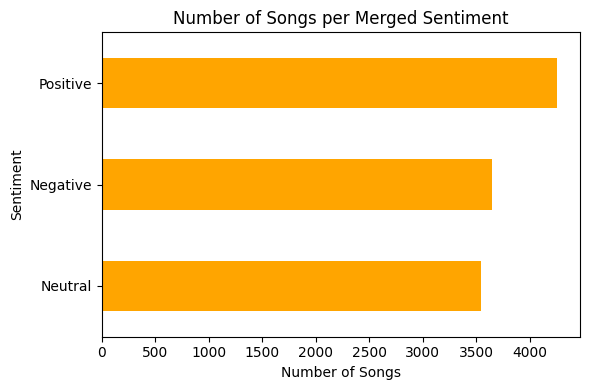

In [56]:
def merge_sentiment(label):
    if label in ['Very Positive', 'Positive']:
        return 'Positive'
    elif label in ['Very Negative', 'Negative']:
        return 'Negative'
    else:
        return 'Neutral'

lyrics_df["Merged Sentiment"] = lyrics_df["Sentiment Label"].apply(merge_sentiment)

sentiment_counts = lyrics_df["Merged Sentiment"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="barh", color="orange")
plt.title("Number of Songs per Merged Sentiment")
plt.xlabel("Number of Songs")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()


COUNT OF EACH SENTIMENT PER GENRE

<Figure size 1400x800 with 0 Axes>

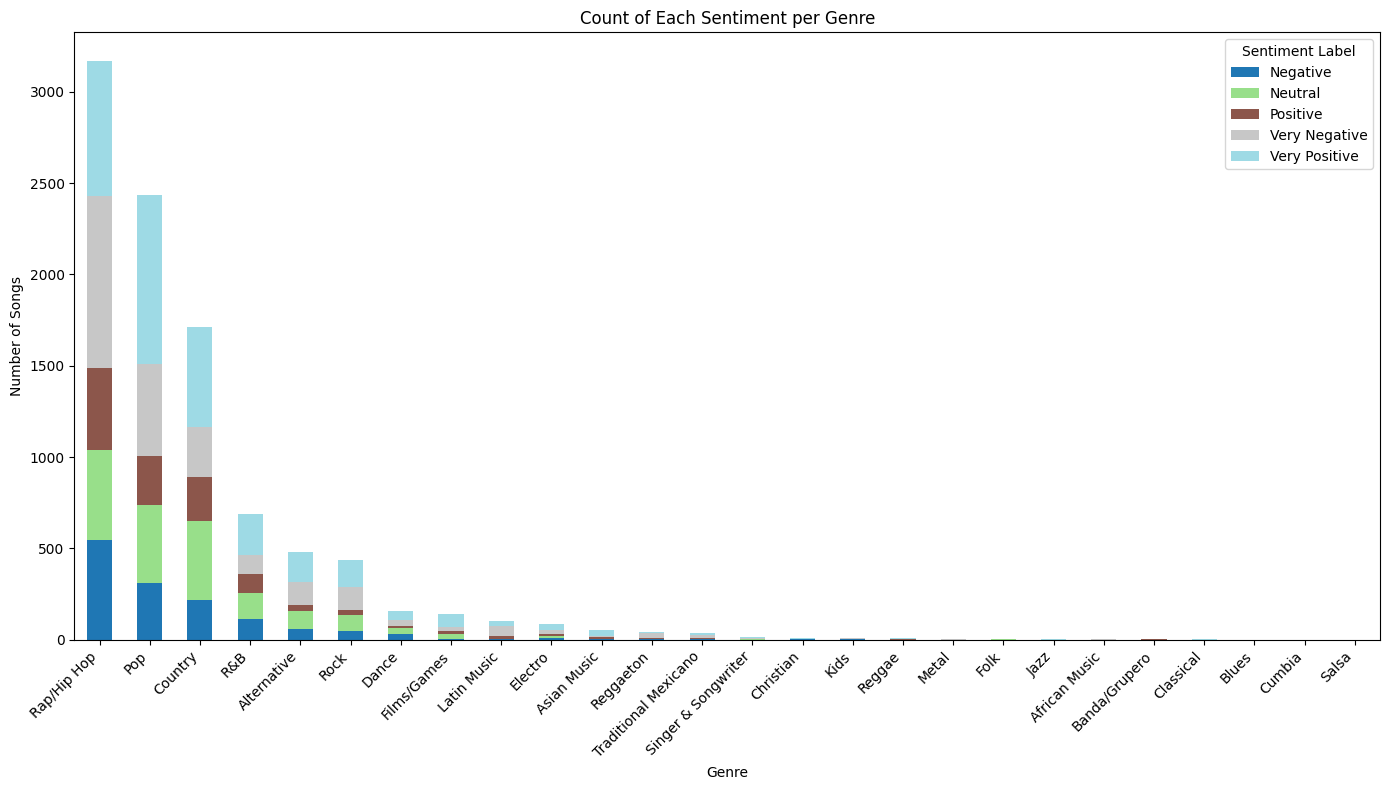

In [57]:
# Group by Genre and Sentiment Label, count each combination
category_sentiment_counts = lyrics_df.groupby(["Genre", "Sentiment Label"]).size().unstack(fill_value=0)

# Sort genres by total number of songs
category_sentiment_counts_sorted = category_sentiment_counts.loc[
    category_sentiment_counts.sum(axis=1).sort_values(ascending=False).index
]

# Plot stacked bar chart
plt.figure(figsize=(14, 8))
category_sentiment_counts_sorted.plot(
    kind="bar", stacked=True, colormap="tab20", figsize=(14, 8)
)
plt.title("Count of Each Sentiment per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 800x400 with 0 Axes>

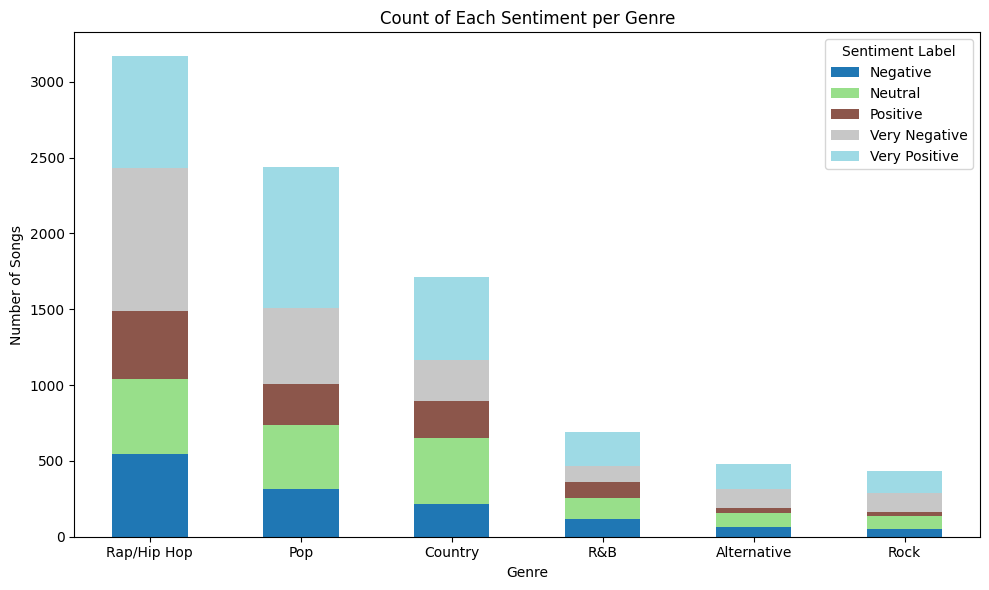

In [58]:
# Group by Genre and Sentiment Label, and count each combination
category_sentiment_counts = lyrics_df.groupby(["Genre", "Sentiment Label"]).size().unstack(fill_value=0)

# Sort genres by total number of songs
category_sentiment_counts_sorted = category_sentiment_counts.loc[
    category_sentiment_counts.sum(axis=1).sort_values(ascending=False).index
]

# Identify genres to remove: from 'Dance' to 'Salsa'
all_genres_sorted = category_sentiment_counts_sorted.index.tolist()
start_idx = all_genres_sorted.index("Dance")
end_idx = all_genres_sorted.index("Salsa") + 1
genres_to_remove = all_genres_sorted[start_idx:end_idx]

# Drop the selected genres
category_sentiment_counts_filtered = category_sentiment_counts_sorted.drop(index=genres_to_remove)

# Plot the filtered stacked bar chart
plt.figure(figsize=(8, 4))
category_sentiment_counts_filtered.plot(
    kind="bar", stacked=True, colormap="tab20", figsize=(10, 6)
)
plt.title("Count of Each Sentiment per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

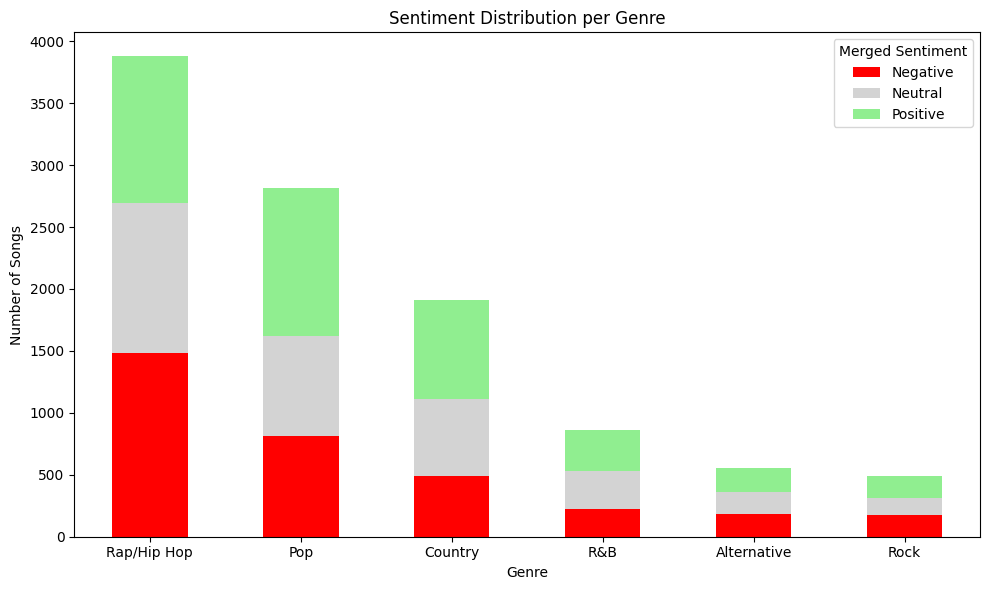

In [59]:
# Merge sentiment labels
def merge_sentiment(label):
    if label in ['Very Positive', 'Positive']:
        return 'Positive'
    elif label in ['Very Negative', 'Negative']:
        return 'Negative'
    else:
        return 'Neutral'

lyrics_df['Merged Sentiment'] = lyrics_df['Sentiment Label'].apply(merge_sentiment)

# Group by Genre and merged sentiment, count each combination
merged_sentiment_counts = lyrics_df.groupby(['Genre', 'Merged Sentiment']).size().unstack(fill_value=0)

# Sort genres by total number of songs
merged_sentiment_counts_sorted = merged_sentiment_counts.loc[
    merged_sentiment_counts.sum(axis=1).sort_values(ascending=False).index
]

# Identify and remove genres from 'Dance' to 'Salsa'
all_genres = merged_sentiment_counts_sorted.index.tolist()
start_idx = all_genres.index("Dance")
end_idx = all_genres.index("Salsa") + 1
genres_to_remove = all_genres[start_idx:end_idx]
filtered_counts = merged_sentiment_counts_sorted.drop(index=genres_to_remove)

# Set custom colors for sentiment categories
sentiment_colors = {
    'Negative': 'red',
    'Neutral': 'lightgrey',
    'Positive': 'lightgreen'
}

# Plot the stacked bar chart with custom colors
plt.figure(figsize=(14, 8))
filtered_counts.plot(
    kind="bar",
    stacked=True,
    color=[sentiment_colors[col] for col in filtered_counts.columns],
    figsize=(10, 6)
)
plt.title("Sentiment Distribution per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


DISTRIBUTION OF GRAMMY WINS

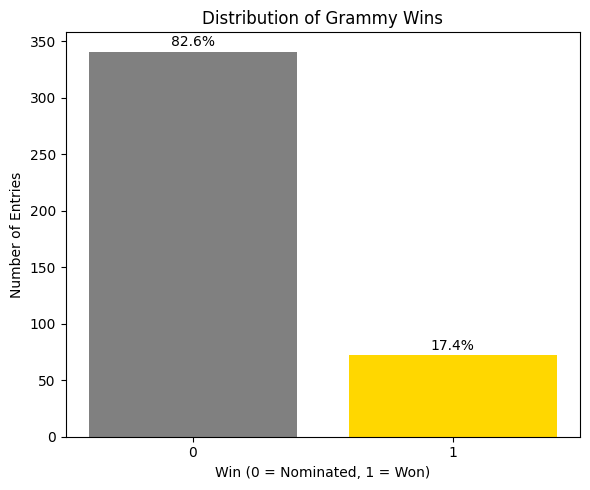

In [60]:
# Count distribution of the 'Win' column
win_counts = grammys_df['Win'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(win_counts.index.astype(str), win_counts.values, color=['grey', 'gold'])
plt.title("Distribution of Grammy Wins")
plt.xlabel("Win (0 = Nominated, 1 = Won)")
plt.ylabel("Number of Entries")

# Add percentage labels above bars
total = win_counts.sum()
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{percent:.1f}%", ha='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

TOP ARTIST COUNTRIES

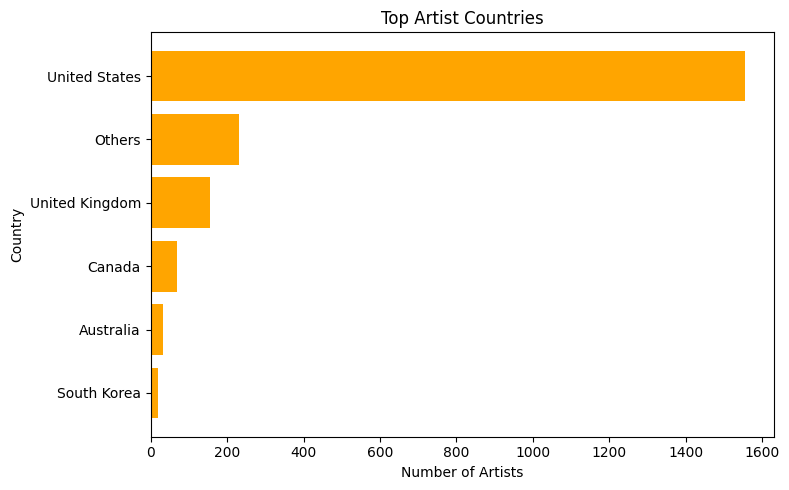

In [61]:
# Keep only rows where 'Found Wiki' == 1
valid_df = artists_df[artists_df['Found Wiki'] == 1]

# Count valid countries
country_counts = valid_df['Country'].value_counts()

# Define countries to keep
countries_to_keep = ['United States', 'United Kingdom', 'Canada', 'Australia', 'South Korea']

# Separate and group
kept_countries = country_counts[countries_to_keep]
others = country_counts.drop(index=countries_to_keep)
country_counts_grouped_final = kept_countries.copy()
country_counts_grouped_final['Others'] = others.sum()

# Sort in ascending order
country_counts_grouped_final = country_counts_grouped_final.sort_values(ascending=True)

# Plot as horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(country_counts_grouped_final.index, country_counts_grouped_final.values, color='orange')
plt.title("Top Artist Countries")
plt.xlabel("Number of Artists")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Add legend for Others
# handles = [bars[-1]]
# labels = [others_label_final]
# plt.legend(handles, labels, title="Grouped")

GENDER DISTRIBUTION OF ARTISTS


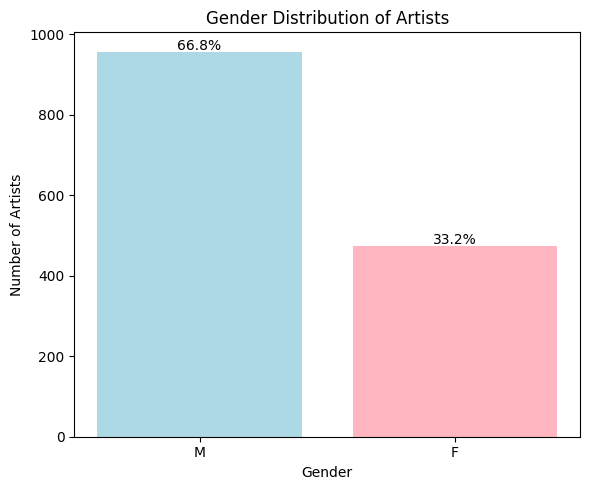

In [62]:
# Filter only valid Wikipedia entries
valid_df = artists_df[artists_df['Found Wiki'] == 1]

# Count gender distribution
gender_counts = valid_df['Gender'].value_counts()

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink', 'lightgrey'])
plt.title("Gender Distribution of Artists")
plt.xlabel("Gender")
plt.ylabel("Number of Artists")

# Add percentages
total = gender_counts.sum()
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percent:.1f}%", ha='center')

plt.tight_layout()
plt.show()

SONG FEATURES GRAMMY SONGS

1. Grammy Songs

In [63]:
#Normalisasi sebelum merge biar gak ada masalah
grammys_df['Song ID'] = grammys_df['Song ID'].astype(str).str.strip()
songs_df['Song ID'] = songs_df['Song ID'].astype(str).str.strip()

#Merging SongID and Artist ID from Songs Data and Grammys Data
merged_sg = pd.merge(songs_df, grammys_df[['Song ID', 'Win', 'Category', 'Year']], on='Song ID', how='left')

# merged_df.head()

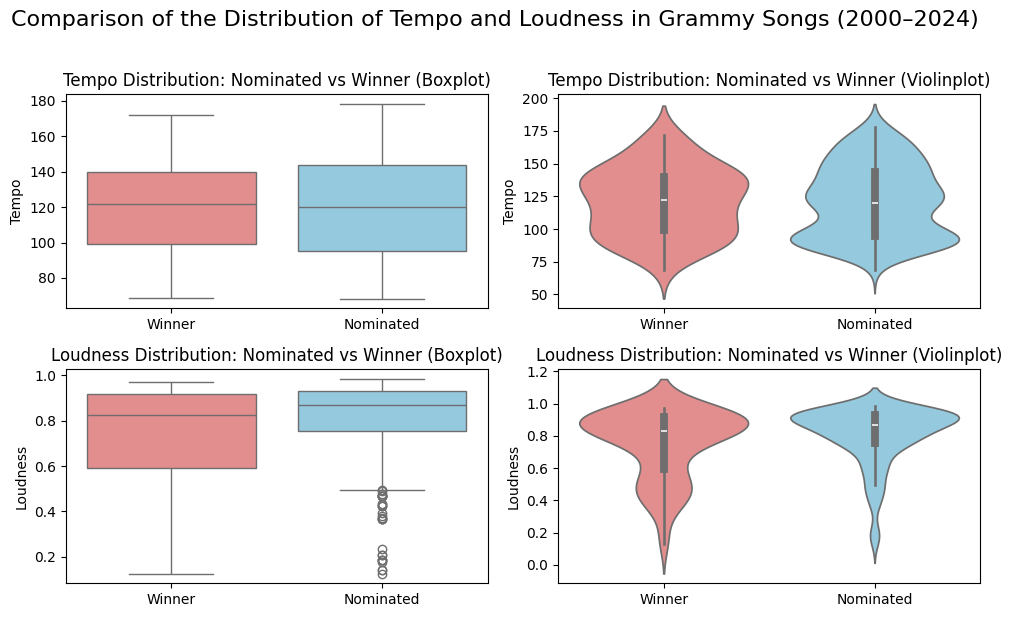

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

label_map = {0: 'Nominated', 1: 'Winner'}

df_plot = merged_sg[merged_sg['Win'].isin([0, 1])].copy()
df_plot['Win Label'] = df_plot['Win'].map(label_map)

features = ['Tempo', 'Loudness']

# Custom color palette
custom_palette = {
    'Winner': 'lightcoral',
    'Nominated': 'skyblue'
}

plt.figure(figsize=(10, 6))

for i, feature in enumerate(features):
    # Boxplot
    plt.subplot(2, 2, i*2 + 1)
    sns.boxplot(
        data=df_plot, x='Win Label', y=feature,
        hue='Win Label', palette=custom_palette, legend=False
    )
    plt.title(f'{feature} Distribution: Nominated vs Winner (Boxplot)')
    plt.xlabel('')

    # Violinplot
    plt.subplot(2, 2, i*2 + 2)
    sns.violinplot(
        data=df_plot, x='Win Label', y=feature,
        hue='Win Label', palette=custom_palette, inner='box', legend=False
    )
    plt.title(f'{feature} Distribution: Nominated vs Winner (Violinplot)')
    plt.xlabel('')

plt.suptitle('Comparison of the Distribution of Tempo and Loudness in Grammy Songs (2000–2024)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [65]:
# Statistik deskriptif per kategori dan fitur
for feature in features:
    print(f'\n==== {feature} ====')
    print(df_plot.groupby('Win Label')[feature].describe())


==== Tempo ====
           count        mean        std        min        25%         50%  \
Win Label                                                                   
Nominated  327.0  121.242301  27.674060  68.358604  95.022739  120.049972   
Winner      72.0  121.160762  25.953278  68.932556  99.089380  121.972214   

                  75%         max  
Win Label                          
Nominated  143.814209  178.206039  
Winner     139.961113  172.265961  

==== Loudness ====
           count      mean       std       min       25%       50%       75%  \
Win Label                                                                      
Nominated  325.0  0.803015  0.181664  0.125893  0.755556  0.867348  0.930334   
Winner      72.0  0.749766  0.212409  0.125893  0.592224  0.827132  0.916965   

                max  
Win Label            
Nominated  0.983959  
Winner     0.971511  


In [66]:
df_plot['Win'].isna().sum()

np.int64(0)

In [67]:
df_plot.to_csv('df_plot.csv', index='False')

t-test loudness and tempo in general (we use t-test because we only have 2 groups (winner and nominated) in the categorical variable 'Win Label')
if the group is more than 2 then use Anova
so here we call the column a variable btw.
so we want to see whether the loudness variable affects the 'win label' variable, and so does the tempo

In [68]:
# Separate the group
tempo_win = df_plot[df_plot['Win Label'] == 'Winner']['Tempo'].dropna()
tempo_nom = df_plot[df_plot['Win Label'] == 'Nominated']['Tempo'].dropna()

loud_win = df_plot[df_plot['Win Label'] == 'Winner']['Loudness'].dropna()
loud_nom = df_plot[df_plot['Win Label'] == 'Nominated']['Loudness'].dropna()

In [69]:
#check independent of data, for example if one song is saved as nominated and also wins --> not independent.
#although conceptually the winner song is also a nominated song, but here it is enough to see whether one song is written more than once (duplicated) or not.
#and here it is not duplicated
df_plot['Song ID'].duplicated().sum()

np.int64(96)

In [70]:
#Check data normality (use Shapiro-Wilk test)
#each group must be normal
#this must be above 0.05
from scipy.stats import shapiro

print("Normalitas TEMPO:")
print("  Winner:", shapiro(tempo_win))
print("  Nominated:", shapiro(tempo_nom))

print("\nNormalitas LOUDNESS:")
print("  Winner:", shapiro(loud_win))
print("  Nominated:", shapiro(loud_nom))

Normalitas TEMPO:
  Winner: ShapiroResult(statistic=np.float64(0.9713693619177762), pvalue=np.float64(0.09957259175450323))
  Nominated: ShapiroResult(statistic=np.float64(0.9483044692870364), pvalue=np.float64(2.6862231551675938e-09))

Normalitas LOUDNESS:
  Winner: ShapiroResult(statistic=np.float64(0.8507520777352873), pvalue=np.float64(5.295424325877776e-07))
  Nominated: ShapiroResult(statistic=np.float64(0.8005653906861645), pvalue=np.float64(1.1082582022431493e-19))


In [71]:
#checking data variance
#each group variance distribution must be homogeneous
#this must be above 0.05
from scipy.stats import levene

print("Levene Test TEMPO:", levene(tempo_win, tempo_nom))
print("Levene Test LOUDNESS:", levene(loud_win, loud_nom))

Levene Test TEMPO: LeveneResult(statistic=np.float64(0.9057804241037399), pvalue=np.float64(0.3418155385354048))
Levene Test LOUDNESS: LeveneResult(statistic=np.float64(2.927397500892601), pvalue=np.float64(0.08787287221158663))


In [72]:
from scipy.stats import mannwhitneyu

# Tempo
u_tempo, p_tempo = mannwhitneyu(tempo_win, tempo_nom, alternative='two-sided')
print(f"Mann–Whitney TEMPO - U: {u_tempo:.3f}, p: {p_tempo:.4f}")

# Loudness
u_loud, p_loud = mannwhitneyu(loud_win, loud_nom, alternative='two-sided')
print(f"Mann–Whitney LOUDNESS - U: {u_loud:.3f}, p: {p_loud:.4f}")

Mann–Whitney TEMPO - U: 11834.500, p: 0.9442
Mann–Whitney LOUDNESS - U: 9992.500, p: 0.0527


<ipython-input-73-fcaa6a864e39>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tempo_counts = df_plot.groupby(['Tempo Bin', 'Win Label']).size().reset_index(name='Count')


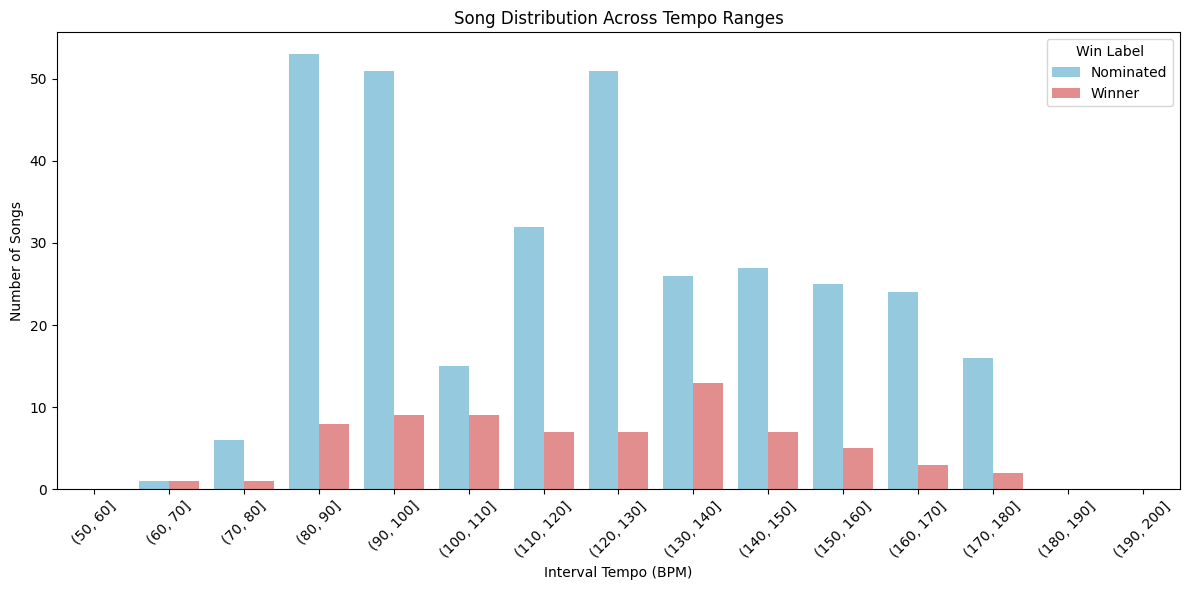

In [73]:
# Binning tempo to intervals of 10
bins = range(50, 201, 10)  # dari 50 sampai 200 BPM, tiap 10
df_plot['Tempo Bin'] = pd.cut(df_plot['Tempo'], bins)

#Count the number per bin and category
tempo_counts = df_plot.groupby(['Tempo Bin', 'Win Label']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=tempo_counts, x='Tempo Bin', y='Count', hue='Win Label', palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Song Distribution Across Tempo Ranges')
plt.xlabel('Interval Tempo (BPM)')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

<ipython-input-74-bb35292bb705>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loudness_counts = df_plot.groupby(['Loudness Bin', 'Win Label']).size().reset_index(name='Count')


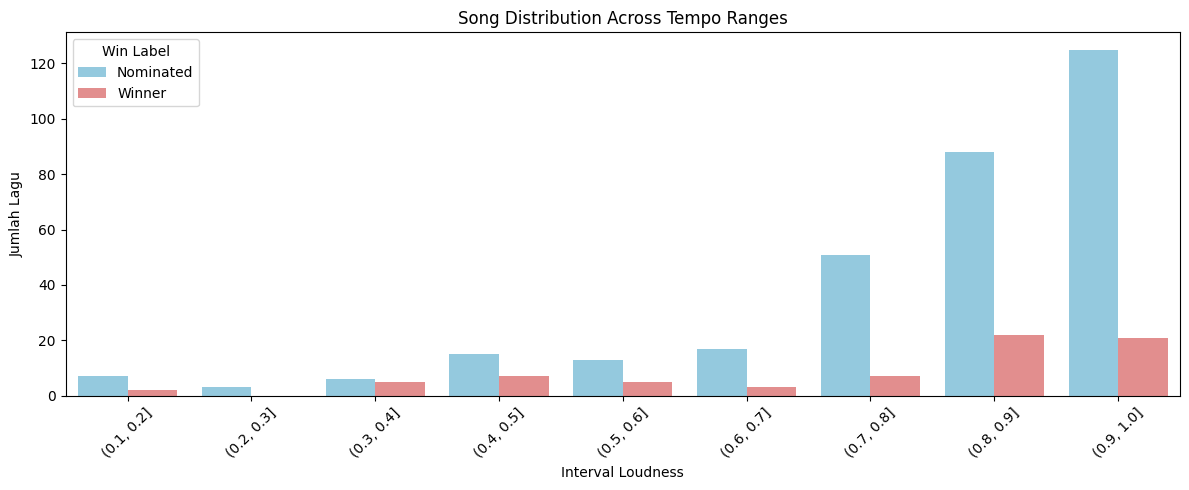

In [74]:
def frange(start, stop, step):
  while start <=stop:
    yield round(start, 10)
    start += step

# Atur bin untuk tempo dan loudness
loudness_bins = [round(x, 1) for x in list(frange(0.1, 1.01, 0.1))]  # Loudness: 0.1 sampai 1.0, interval 0.1

# Binning
df_plot['Loudness Bin'] = pd.cut(df_plot['Loudness'], bins=loudness_bins)

# Hitung jumlah per bin dan label
loudness_counts = df_plot.groupby(['Loudness Bin', 'Win Label']).size().reset_index(name='Count')

# Plot Loudness
plt.figure(figsize=(12, 5))
sns.barplot(data=loudness_counts, x='Loudness Bin', y='Count', hue='Win Label', palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Song Distribution Across Tempo Ranges')
plt.xlabel('Interval Loudness')
plt.ylabel('Jumlah Lagu')
plt.tight_layout()
plt.show()

In [75]:
merged_sg[['Tempo', 'Loudness']].corr()

Tempo  Loudness
Tempo     1.000000 -0.028385
Loudness -0.028385  1.000000

<Axes: xlabel='Tempo', ylabel='Loudness'>

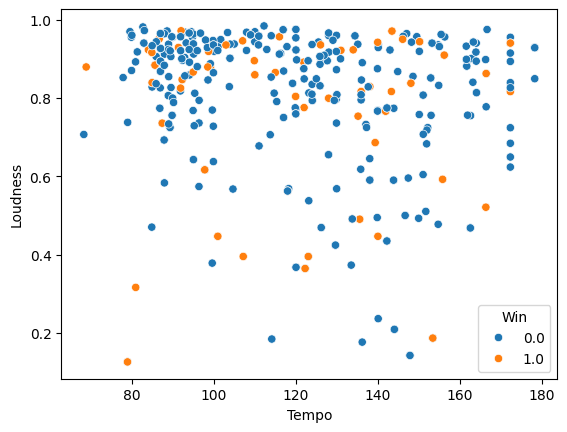

In [76]:
import seaborn as sns
sns.scatterplot(data=merged_sg, x='Tempo', y='Loudness', hue='Win')

In [77]:
print(f"Number of genre: {merged_sg['Genre'].nunique()}")

merged_sg['Genre'].unique().tolist()

Number of genre: 27


['Rock',
 'R&B',
 'Pop',
 'Rap/Hip Hop',
 'Country',
 'Alternative',
 'Electro',
 'Dance',
 'Films/Games',
 'Classical',
 'Latin Music',
 'Christian',
 'Reggae',
 'Kids',
 'Folk',
 'Asian Music',
 nan,
 'Blues',
 'Traditional Mexicano',
 'Singer & Songwriter',
 'Metal',
 'Jazz',
 'Reggaeton',
 'Salsa',
 'African Music',
 'Brazilian Music',
 'Banda/Grupero',
 'Cumbia']

In [78]:
import pandas as pd

# Filter data
df_grammy = merged_sg[
    (merged_sg['Category'] == 'Record Of The Year') &
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

# Tambahkan label
df_grammy['Win Label'] = df_grammy['Win'].map({0: 'Nominated', 1: 'Winner'})

# Grouping genre dan tahun kemunculan
genre_years = df_grammy.groupby(['Genre', 'Win Label'])['Year'].unique().reset_index()

# Format tahun jadi string
genre_years['Year'] = genre_years['Year'].apply(lambda x: ', '.join(str(y) for y in sorted(x)))

# Urutkan dan tampilkan
genre_years = genre_years.sort_values(['Win Label', 'Genre']).reset_index(drop=True)

# Tampilkan
pd.set_option('display.max_rows', None)  # supaya gak terpotong
display(genre_years)  # atau print(genre_years)

Genre  Win Label  \
0           Alternative  Nominated   
1               Country  Nominated   
2                 Dance  Nominated   
3               Electro  Nominated   
4           Films/Games  Nominated   
5                  Jazz  Nominated   
6                   Pop  Nominated   
7                   R&B  Nominated   
8           Rap/Hip Hop  Nominated   
9                  Rock  Nominated   
10  Singer & Songwriter  Nominated   
11          Alternative     Winner   
12              Country     Winner   
13                Dance     Winner   
14                  Pop     Winner   
15                  R&B     Winner   
16          Rap/Hip Hop     Winner   
17                 Rock     Winner   
18  Singer & Songwriter     Winner   

                                                 Year  
0   2006.0, 2007.0, 2010.0, 2011.0, 2012.0, 2013.0...  
1                                      2009.0, 2024.0  
2                              2000.0, 2007.0, 2018.0  
3                              2008.0, 2020.0, 2024.0  
4                                      2018.0, 2019.0  
5                              2003.0, 2021.0, 2023.0  
6   2000.0, 2002.0, 2005.0, 2006.0, 2007.0, 2008.0...  
7   2000.0, 2001.0, 2003.0, 2004.0, 2006.0, 2015.0...  
8   2001.0, 2002.0, 2003.0, 2005.0, 2010.0, 2014.0...  
9                      2001.0, 2002.0, 2004.0, 2024.0  
10                             2018.0, 2021.0, 2022.0  
11             2005.0, 2012.0, 2018.0, 2019.0, 2020.0  
12                                             2006.0  
13                                             2013.0  
14  2008.0, 2011.0, 2014.0, 2015.0, 2016.0, 2017.0...  
15                                     2004.0, 2007.0  
16                                     2010.0, 2024.0  
17                     2000.0, 2001.0, 2003.0, 2009.0  
18                                             2002.0

In [79]:
# Filter data
df_grammy = merged_sg[
    (merged_sg['Category'] == 'Record Of The Year') &
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

df_grammy['Win Label'] = df_grammy['Win'].map({0: 'Nominated', 1: 'Winner'})

# Ambil genre unik (misalnya yang pernah menang atau masuk nominasi)
selected_genres = df_grammy['Genre'].unique()

# Group: hitung jumlah lagu per tahun, genre, dan status
counts = df_grammy.groupby(['Year', 'Genre', 'Win Label']).size().reset_index(name='Count')

# Buat pivot table agar tiap kombinasi (Genre, Status) jadi kolom
pivot = counts.pivot_table(
    index='Year',
    columns=['Genre', 'Win Label'],
    values='Count',
    fill_value=0
)

# Optional: urutkan kolom berdasarkan genre lalu status
pivot = pivot.sort_index(axis=1, level=[0, 1])

# Biar nama kolom rapi jadi satu level, misalnya: 'Pop (Nominated)', 'Pop (Winner)'
pivot.columns = [f"{genre} ({status})" for genre, status in pivot.columns]

# Reset index biar Year jadi kolom biasa
pivot = pivot.reset_index()

import pandas as pd
pd.set_option('display.max_columns', None)  # biar semua kolom keliatan
pd.set_option('display.max_rows', None)
display(pivot)

Year  Alternative (Nominated)  Alternative (Winner)  \
0   2000.0                      0.0                   0.0   
1   2001.0                      0.0                   0.0   
2   2002.0                      0.0                   0.0   
3   2003.0                      0.0                   0.0   
4   2004.0                      0.0                   0.0   
5   2005.0                      0.0                   1.0   
6   2006.0                      1.0                   0.0   
7   2007.0                      1.0                   0.0   
8   2008.0                      0.0                   0.0   
9   2009.0                      0.0                   0.0   
10  2010.0                      1.0                   0.0   
11  2011.0                      2.0                   0.0   
12  2012.0                      2.0                   1.0   
13  2013.0                      1.0                   0.0   
14  2014.0                      1.0                   0.0   
15  2015.0                      0.0                   0.0   
16  2016.0                      1.0                   0.0   
17  2017.0                      0.0                   0.0   
18  2018.0                      0.0                   1.0   
19  2019.0                      2.0                   1.0   
20  2020.0                      2.0                   1.0   
21  2021.0                      1.0                   0.0   
22  2022.0                      0.0                   0.0   
23  2023.0                      2.0                   0.0   
24  2024.0                      1.0                   0.0   

    Country (Nominated)  Country (Winner)  Dance (Nominated)  Dance (Winner)  \
0                   0.0               0.0                1.0             0.0   
1                   0.0               0.0                0.0             0.0   
2                   0.0               0.0                0.0             0.0   
3                   0.0               0.0                0.0             0.0   
4                   0.0               0.0                0.0             0.0   
5                   0.0               0.0                0.0             0.0   
6                   0.0               1.0                0.0             0.0   
7                   0.0               0.0                1.0             0.0   
8                   0.0               0.0                0.0             0.0   
9                   1.0               0.0                0.0             0.0   
10                  0.0               0.0                0.0             0.0   
11                  0.0               0.0                0.0             0.0   
12                  0.0               0.0                0.0             0.0   
13                  0.0               0.0                0.0             1.0   
14                  0.0               0.0                0.0             0.0   
15                  0.0               0.0                0.0             0.0   
16                  0.0               0.0                0.0             0.0   
17                  0.0               0.0                0.0             0.0   
18                  0.0               0.0                1.0             0.0   
19                  0.0               0.0                0.0             0.0   
20                  0.0               0.0                0.0             0.0   
21                  0.0               0.0                0.0             0.0   
22                  0.0               0.0                0.0             0.0   
23                  0.0               0.0                0.0             0.0   
24                  1.0               0.0                0.0             0.0   

    Electro (Nominated)  Films/Games (Nominated)  Jazz (Nominated)  \
0                   0.0                      0.0               0.0   
1                   0.0                      0.0               0.0   
2                   0.0                      0.0               0.0   
3                   0.0                      0.0          

Genres (Displaying All Genre)

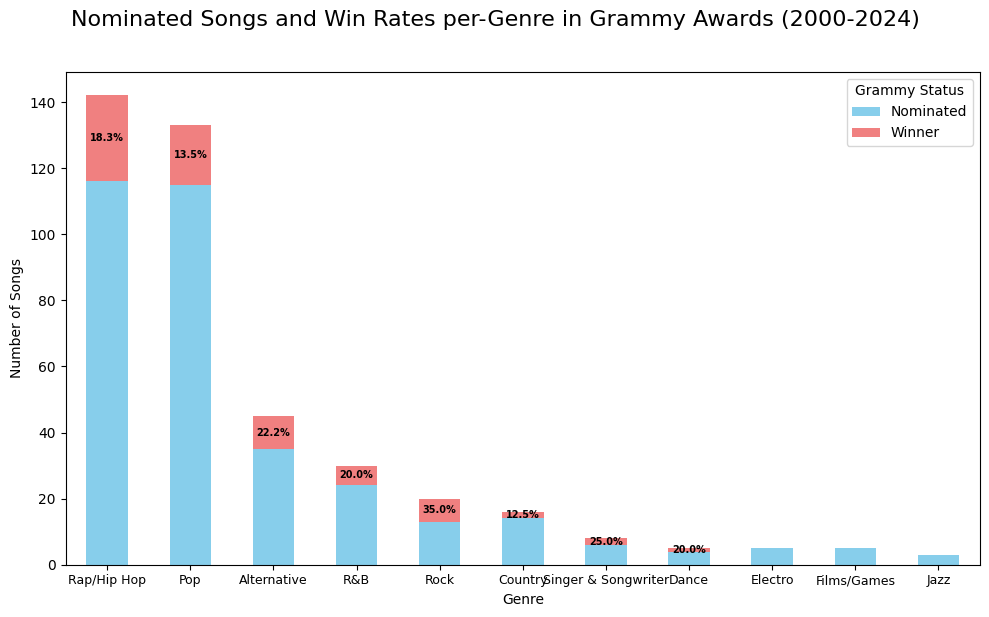

In [80]:
df_plot = merged_sg[merged_sg['Win'].isin([0, 1])].copy()

genre_win = df_plot.groupby(['Genre', 'Win']).size().unstack(fill_value=0)

# Count total songs & winning percentage per genre
genre_win['Total'] = genre_win.sum(axis=1)


genre_win['Win Rate (%)'] = (genre_win[1] / genre_win['Total']) * 100


top_genres = genre_win.sort_values('Total', ascending=False).head(11)

# Plot stacked bar chart
ax = top_genres[[0, 1]].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color={0: 'skyblue', 1: 'lightcoral'}
)

# Add a percentage label
for idx, (total, win, rate) in enumerate(zip(top_genres['Total'], top_genres[1], top_genres['Win Rate (%)'])):
    if win > 0:
        ax.text(
            idx, total - (win / 2),
            f"{rate:.1f}%",
            ha='center', va='center', color='black', fontweight='bold', fontsize=7
        )

plt.suptitle("Nominated Songs and Win Rates per-Genre in Grammy Awards (2000-2024)", fontsize=16, y=1.02)
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=0, ha='center', fontsize=9)
plt.legend(title="Grammy Status", labels=["Nominated", "Winner"])
plt.tight_layout()
plt.show()

chi-suqre antara genre dan 'Win Label'

In [81]:
# Subset hanya top 5 genre
top_genres_chi = genre_win.sort_values('Total', ascending=False).head(5)
top_genres_index = top_genres_chi.index
df_subset = df_plot[df_plot['Genre'].isin(top_genres_index)]

In [82]:
# Tabel kontingensi :lihat frekuensi satu kolom berdasarkan kolom lain (lihat frekuensi setiap genre untuk tiap group di tabel 'Win Label')
#lihat di kode kita hanya pake 5 subset soalnya kalo pake 11 juga banyak frekuensi genre yang bernilai 0 di nominated, dan ini takutnya bikin chi-square bias
contingency = pd.crosstab(df_subset['Genre'], df_subset['Win'])
print(contingency)

Win          0.0  1.0
Genre                
Alternative   35   10
Pop          115   18
R&B           24    6
Rap/Hip Hop  116   26
Rock          13    7


In [83]:
from scipy.stats import chi2_contingency

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")

Chi-square: 6.31, p-value: 0.1768


Genre (Make 'Others') (Not Gonna Use This)

In [84]:
# # Count the number of songs per genre based on Win status
# genre_win = merged_sg.groupby(['Genre', 'Win']).size().unstack(fill_value=0)

# # Calculate total and winning percentage
# genre_win['Total'] = genre_win.sum(axis=1)
# genre_win['Win Rate (%)'] = (genre_win[1] / genre_win['Total']) * 100

# # List of main genres you want to display
# main_genres = ['Rap/Hip Hop', 'Pop', 'Alternative', 'R&B', 'Rock']

# # Separate other genres as 'Others'
# others_df = genre_win[~genre_win.index.isin(main_genres)]
# others_row = others_df[[0, 1]].sum()
# others_row['Total'] = others_row.sum()
# others_row['Win Rate (%)'] = (others_row.iloc[1] / others_row['Total']) * 100

# # Re-merge main data + Others
# genre_win_grouped = pd.concat([
#     genre_win.loc[main_genres],
#     pd.DataFrame([others_row], index=['Others'])
# ])

# # Stacked bar chart plot
# ax = genre_win_grouped[[0, 1]].plot(
#     kind='bar',
#     stacked=True,
#     figsize=(6, 6),
#     color={0: 'mediumaquamarine', 1: 'lightgray'}
# )

# # Add the winning percentage above the grey section
# for idx, (total, win, rate) in enumerate(zip(
#     genre_win_grouped['Total'],
#     genre_win_grouped[1],
#     genre_win_grouped['Win Rate (%)']
# )):
#     if win > 0:
#         ax.text(
#             idx, total - (win / 2),
#             f"{rate:.1f}%",
#             ha='center', va='center', color='black', fontweight='bold', fontsize=8
#         )

# # Styling
# plt.title("Number of Songs per Genre by Grammy Status (Grouped Others, with Win %)")
# plt.xlabel("Genre")
# plt.ylabel("Number of Songs")
# plt.xticks(rotation=0, ha='center')
# plt.legend(title="Grammy Status", labels=["Nominated", "Winner"])
# plt.tight_layout()
# plt.show()

2. Grammys Songs (But Divided By Category)

Tempo & Loudness Per-Category Through Years By Box Plot (Not Gonna Use This)

In [85]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Filter lagu sesuai 3 kategori + tahun
# selected_categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

# df_plot = merged_sg[
#     (merged_sg['Category'].isin(selected_categories)) &
#     (merged_sg['Year'].between(2000, 2024)) &
#     (merged_sg['Win'].isin([0, 1]))
# ].copy()

# # Buat label Winner vs Nominated
# df_plot['Win Label'] = df_plot['Win'].map({0: 'Nominated', 1: 'Winner'})

# # Loop per kategori Grammy
# for category in selected_categories:
#     df_cat = df_plot[df_plot['Category'] == category]

#     for feature in ['Tempo', 'Loudness']:
#         plt.figure(figsize=(12, 5))
#         sns.boxplot(data=df_cat, x='Year', y=feature, hue='Win Label', palette='pastel')
#         plt.title(f"{feature} Distribution (2000–2024)\nCategory: {category}")
#         plt.xticks(rotation=45)
#         plt.xlabel("Year")
#         plt.ylabel(feature)
#         plt.legend(title='Grammy Status')
#         plt.tight_layout()
#         plt.show()

Time-Series of Tempo Generaly

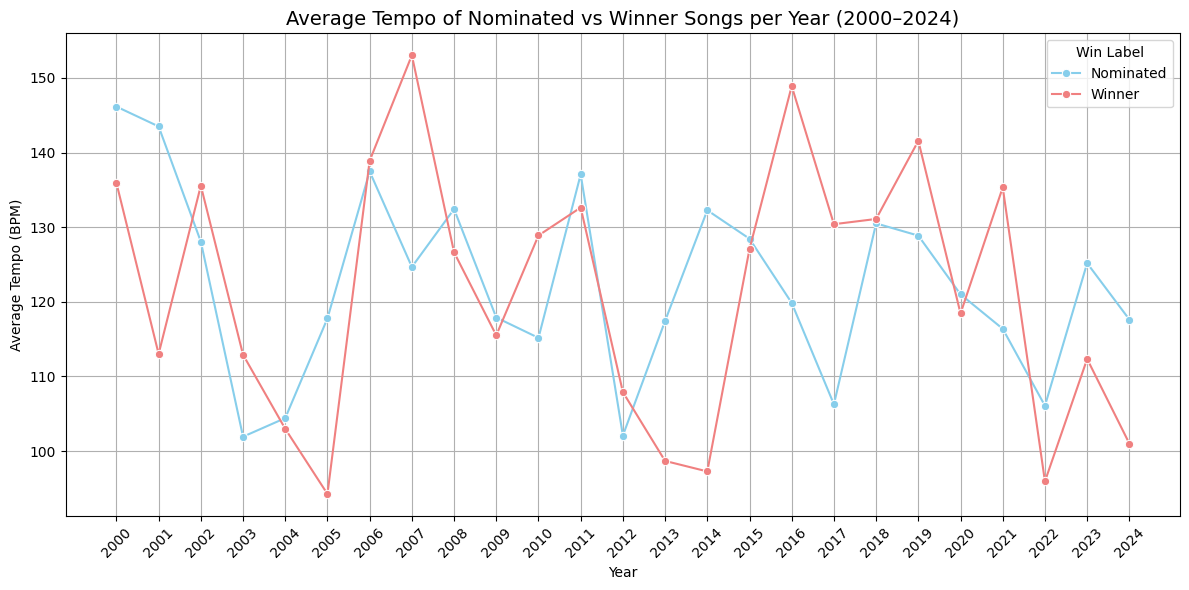

In [86]:
# Filter data yang valid
df_tempo = merged_sg[
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

# Tambahkan label
df_tempo['Win Label'] = df_tempo['Win'].map({0: 'Nominated', 1: 'Winner'})

# Hitung rata-rata tempo per tahun untuk masing-masing kategori
tempo_trend = df_tempo.groupby(['Year', 'Win Label'])['Tempo'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=tempo_trend, x='Year', y='Tempo', hue='Win Label', marker='o', palette={'Nominated': 'skyblue', 'Winner': 'lightcoral'})

plt.title("Average Tempo of Nominated vs Winner Songs per Year (2000–2024)",
fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Tempo (BPM)")
plt.xticks(range(2000, 2025), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Tempo Per-Category Through Years By Line Plot

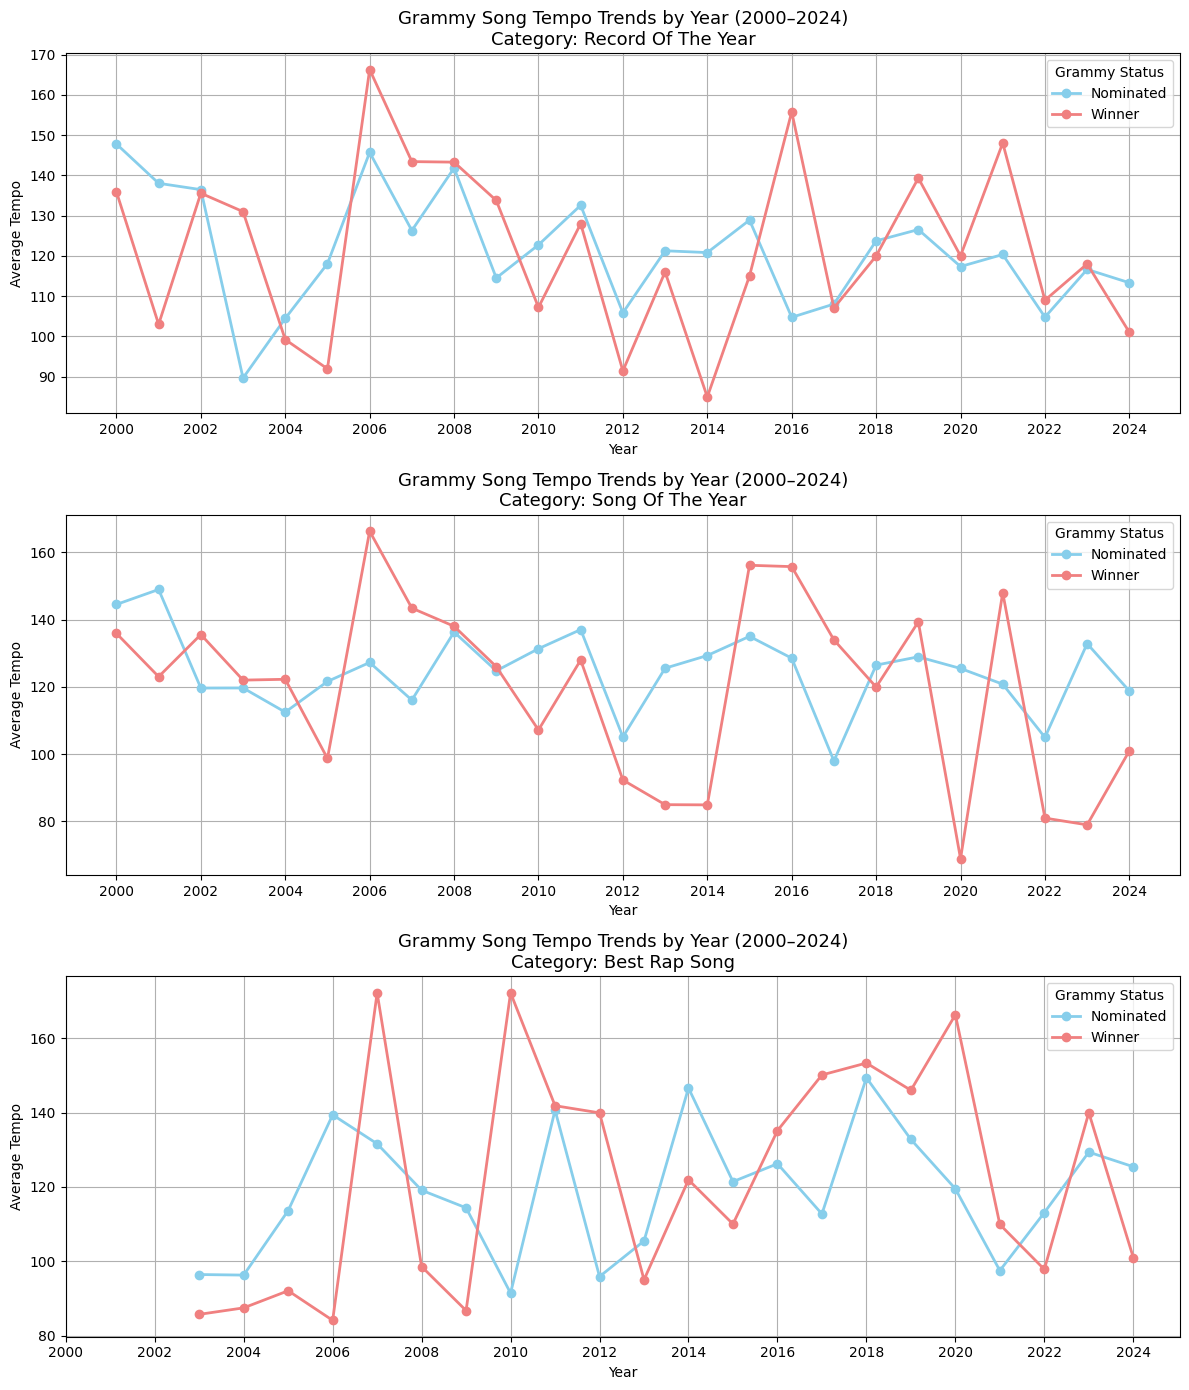

In [87]:
years_range = range(2000, 2025)

# Grammy categories list
categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

# Data filter (Win 0 and 1 only)
df_plot = merged_sg[
    (merged_sg['Category'].isin(categories)) &
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2025))
].copy()


# Change Win value to string label
df_plot['Win Label'] = df_plot['Win'].map({0: 'Nominated', 1: 'Winner'})

# Create a plot for each category
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=False)

for ax, category in zip(axes, categories):
    subset = df_plot[df_plot['Category'] == category]

    # Calculate the average time per year for each status
    tempo_by_year = subset.groupby(['Year', 'Win Label'])['Tempo'].mean().unstack().reindex(years_range)

    # Plot line chart
    tempo_by_year.plot(
        marker='o',
        linewidth=2,
        ax=ax,
        color={'Nominated': 'skyblue', 'Winner': 'lightcoral'}

    )

    ax.set_title(f"Grammy Song Tempo Trends by Year (2000–2024)\nCategory: {category}", fontsize=13)
    ax.set_ylabel("Average Tempo")
    ax.legend(title="Grammy Status")
    ax.grid(True)
    ax.set_xticks(range(2000, 2025, 2))  # every 2 years to keep it neat

# Add an X label below the last plot.
plt.xlabel("Year")
plt.tight_layout()
plt.show()

t-test per category for tempo

In [88]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

for category in categories:
    print(f"\nCategory: {category}")

    subset = df_plot[df_plot['Category'] == category]
    tempo_win = subset[subset['Win Label'] == 'Winner']['Tempo'].dropna()
    tempo_nom = subset[subset['Win Label'] == 'Nominated']['Tempo'].dropna()

    # Check data size
    if len(tempo_win) < 3 or len(tempo_nom) < 3:
        print("Too few data points for statistical testing.")
        continue

    # Normality check
    p_norm_win = shapiro(tempo_win).pvalue
    p_norm_nom = shapiro(tempo_nom).pvalue

    normal_win = p_norm_win > 0.05
    normal_nom = p_norm_nom > 0.05

    # Variance homogeneity check
    p_var = levene(tempo_win, tempo_nom).pvalue
    equal_var = p_var > 0.05

    if normal_win and normal_nom:
        # Use t-test
        t_stat, p_val = ttest_ind(tempo_win, tempo_nom, equal_var=equal_var)
        test_type = "T-Test" if equal_var else "Welch’s T-Test"
    else:
        # Use Mann–Whitney U test
        t_stat, p_val = mannwhitneyu(tempo_win, tempo_nom, alternative='two-sided')
        test_type = "Mann–Whitney U"

    print(f"Test: {test_type}")
    print(f"p-normal (Winner): {p_norm_win:.4f}, p-normal (Nominated): {p_norm_nom:.4f}")
    print(f"p-variance (Levene): {p_var:.4f}")
    print(f"Statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("Significant difference")
    else:
        print("No significant difference")


Category: Record Of The Year
Test: Mann–Whitney U
p-normal (Winner): 0.8947, p-normal (Nominated): 0.0000
p-variance (Levene): 0.0504
Statistic: 1607.000, p-value: 0.6743
No significant difference

Category: Song Of The Year
Test: Mann–Whitney U
p-normal (Winner): 0.3666, p-normal (Nominated): 0.0016
p-variance (Levene): 0.9239
Statistic: 1399.000, p-value: 0.5572
No significant difference

Category: Best Rap Song
Test: Mann–Whitney U
p-normal (Winner): 0.0365, p-normal (Nominated): 0.0001
p-variance (Levene): 0.7753
Statistic: 989.000, p-value: 0.6153
No significant difference


Time-Series of Loudness Generaly

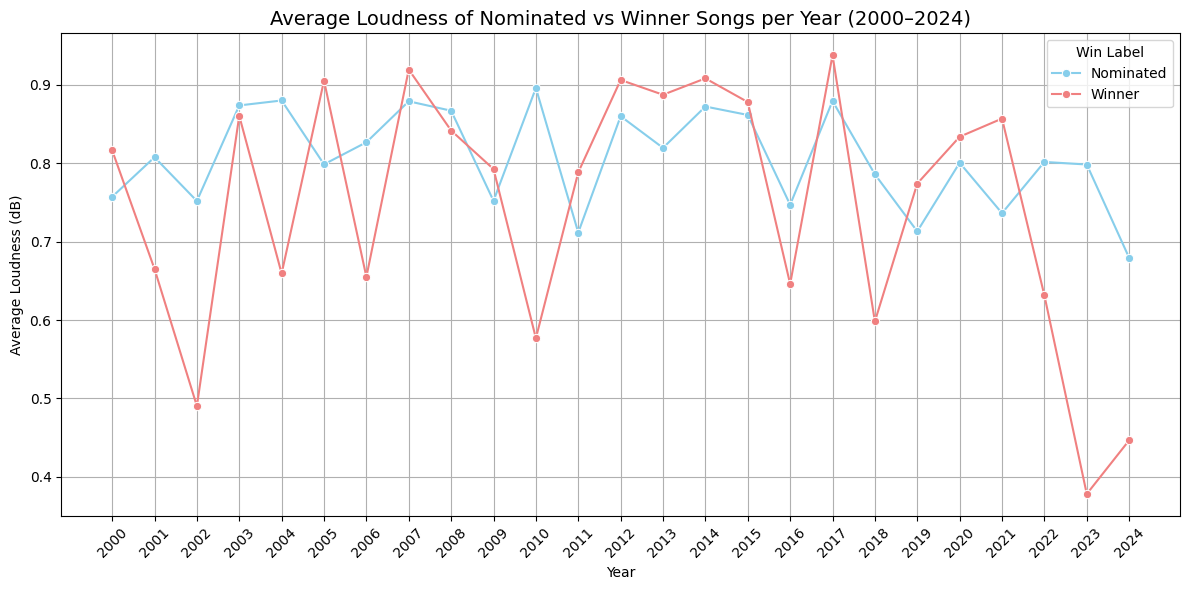

In [89]:
# Filter data yang valid
df_loudness = merged_sg[
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

# Tambahkan label
df_loudness['Win Label'] = df_loudness['Win'].map({0: 'Nominated', 1: 'Winner'})

# Hitung rata-rata loudness per tahun untuk masing-masing kategori
loudness_trend = df_loudness.groupby(['Year', 'Win Label'])['Loudness'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=loudness_trend, x='Year', y='Loudness', hue='Win Label', marker='o',
             palette={'Nominated': 'skyblue', 'Winner': 'lightcoral'})

plt.title("Average Loudness of Nominated vs Winner Songs per Year (2000–2024)",
          fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Loudness (dB)")
plt.xticks(range(2000, 2025), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Loudness Per-Category Through Years By Line Plot

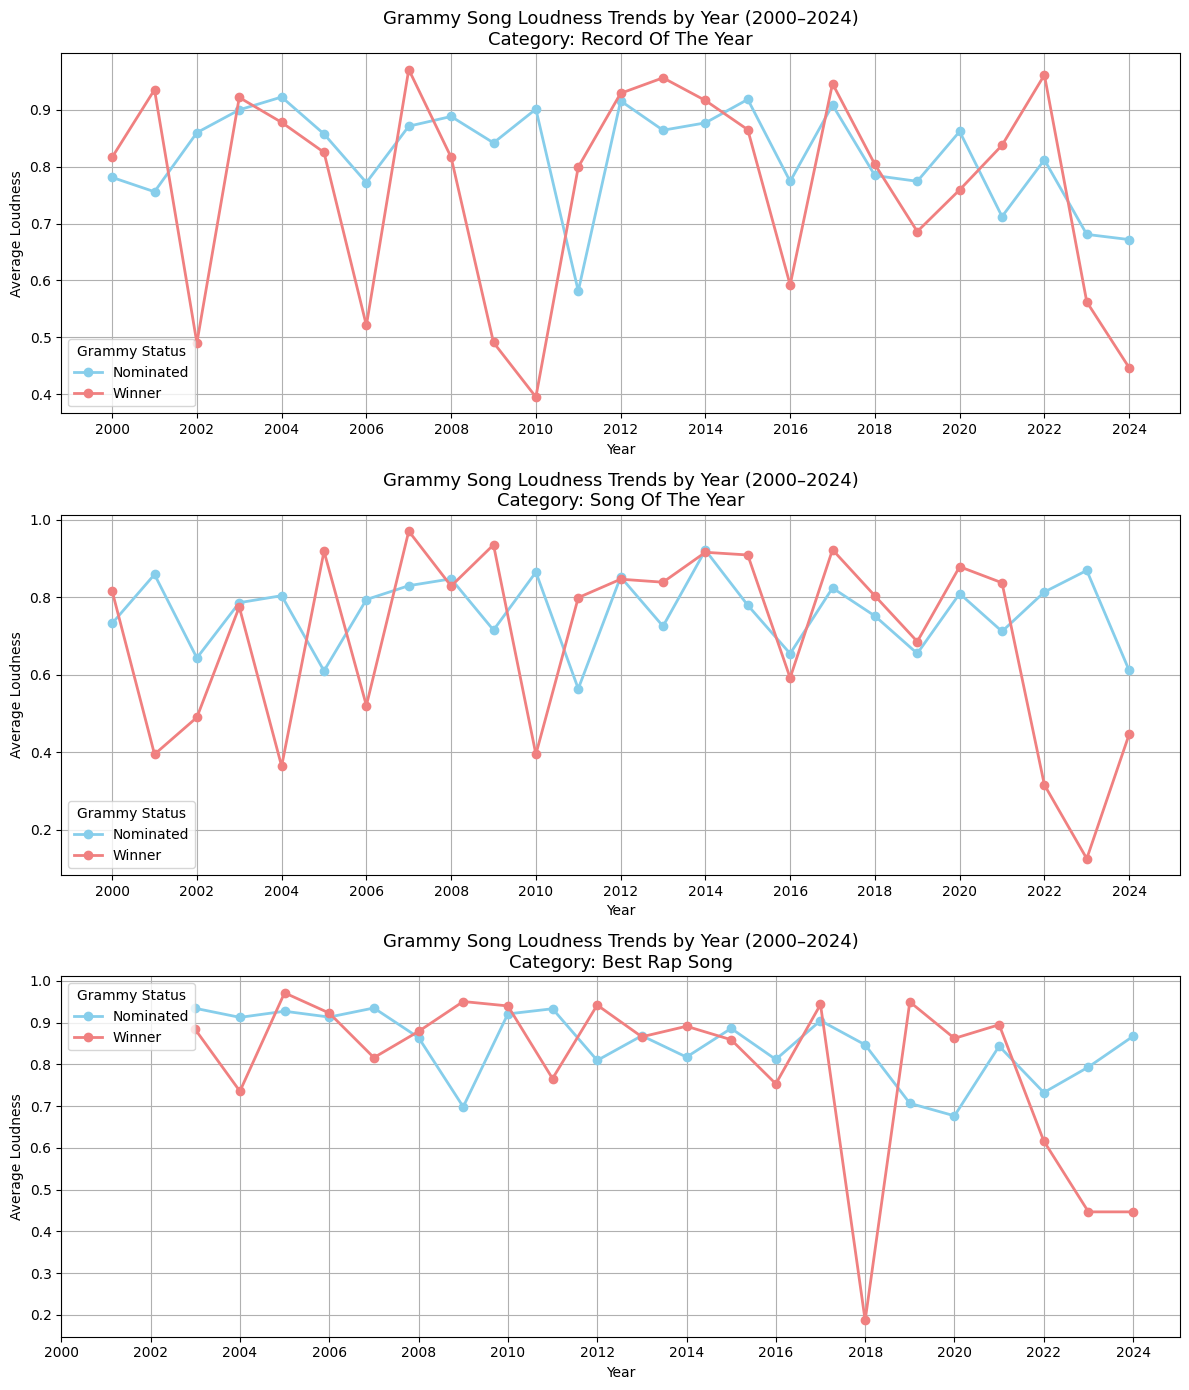

In [90]:
# Grammy categories list
categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

# Data filter (Win 0 and 1 only)
df_plot = merged_sg[
    (merged_sg['Category'].isin(categories)) &
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

# Change Win value to string label
df_plot['Win Label'] = df_plot['Win'].map({0: 'Nominated', 1: 'Winner'})

# Create a plot for each category
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=False)

for ax, category in zip(axes, categories):
    subset = df_plot[df_plot['Category'] == category]

    # Calculate the average time per year for each status
    tempo_by_year = subset.groupby(['Year', 'Win Label'])['Loudness'].mean().unstack()

    # Plot line chart
    tempo_by_year.plot(
        marker='o',
        linewidth=2,
        ax=ax,
        color={'Nominated': 'skyblue', 'Winner': 'lightcoral'}
    )

    ax.set_title(f"Grammy Song Loudness Trends by Year (2000–2024)\nCategory: {category}", fontsize=13)
    ax.set_ylabel("Average Loudness")
    ax.legend(title="Grammy Status")
    ax.grid(True)
    ax.set_xticks(range(2000, 2025, 2))  # every 2 years to keep it neat


# Add an X label below the last plot.
plt.xlabel("Year")
plt.tight_layout()
plt.show()

t-test loudness per category

In [91]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']


for category in categories:
    print(f"\nCategory: {category}")

    subset = df_plot[df_plot['Category'] == category]
    loud_win = subset[subset['Win Label'] == 'Winner']['Loudness'].dropna()
    loud_nom = subset[subset['Win Label'] == 'Nominated']['Loudness'].dropna()

    # Cek jumlah data
    if len(loud_win) < 3 or len(loud_nom) < 3:
        print("Jumlah data terlalu sedikit untuk uji statistik.")
        continue

    # Cek normalitas
    p_norm_win = shapiro(loud_win).pvalue
    p_norm_nom = shapiro(loud_nom).pvalue

    normal_win = p_norm_win > 0.05
    normal_nom = p_norm_nom > 0.05

    # Cek varians (kalau datanya normal)
    p_var = levene(loud_win, loud_nom).pvalue
    equal_var = p_var > 0.05

    if normal_win and normal_nom:
        # Gunakan t-test (standar atau Welch)
        t_stat, p_val = ttest_ind(loud_win, loud_nom, equal_var=equal_var)
        test_type = "T-Test" if equal_var else "Welch’s T-Test"
    else:
        # Gunakan Mann–Whitney U test
        t_stat, p_val = mannwhitneyu(loud_win, loud_nom, alternative='two-sided')
        test_type = "Mann–Whitney U"

    print(f"Test: {test_type}")
    print(f"p-normal (Winner): {p_norm_win:.4f}, p-normal (Nominated): {p_norm_nom:.4f}")
    print(f"p-variance (Levene): {p_var:.4f}")
    print(f"Statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("Perbedaan signifikan")
    else:
        print("Tidak ada perbedaan signifikan")


Category: Record Of The Year
Test: Mann–Whitney U
p-normal (Winner): 0.0047, p-normal (Nominated): 0.0000
p-variance (Levene): 0.4709
Statistic: 1228.000, p-value: 0.1553
Tidak ada perbedaan signifikan

Category: Song Of The Year
Test: Mann–Whitney U
p-normal (Winner): 0.0054, p-normal (Nominated): 0.0000
p-variance (Levene): 0.1436
Statistic: 1309.000, p-value: 0.2916
Tidak ada perbedaan signifikan

Category: Best Rap Song
Test: Mann–Whitney U
p-normal (Winner): 0.0001, p-normal (Nominated): 0.0000
p-variance (Levene): 0.2416
Statistic: 781.000, p-value: 0.2670
Tidak ada perbedaan signifikan


In [92]:
from scipy.stats import ttest_ind

for category in categories:
    sub = df_plot[df_plot['Category'] == category]
    win = sub[sub['Win Label'] == 'Winner']['Loudness'].dropna()
    nom = sub[sub['Win Label'] == 'Nominated']['Loudness'].dropna()

    t, p = ttest_ind(win, nom)
    print(f"{category} — t: {t:.3f}, p: {p:.4f}")

Record Of The Year — t: -1.217, p: 0.2255
Song Of The Year — t: -1.499, p: 0.1362
Best Rap Song — t: -1.386, p: 0.1686


In [93]:
df_plot['Win Label'].value_counts()

Win Label
Nominated    341
Winner        72
Name: count, dtype: int64

Genre Per-Category Through Years By Line Plot

Win Label            Nominated  Winner
Genre                                 
Alternative                 18       5
Country                      2       1
Dance                        3       1
Electro                      3       0
Films/Games                  2       0
Jazz                         3       0
Pop                         51       9
R&B                         13       2
Rap/Hip Hop                 22       2
Rock                         5       4
Singer & Songwriter          3       1
Win Label            Nominated  Winner  Total
Genre                                        
Alternative                 18       5     23
Country                      2       1      3
Dance                        3       1      4
Electro                      3       0      3
Films/Games                  2       0      2
Jazz                         3       0      3
Pop                         51       9     60
R&B                         13       2     15
Rap/Hip Hop                 22   

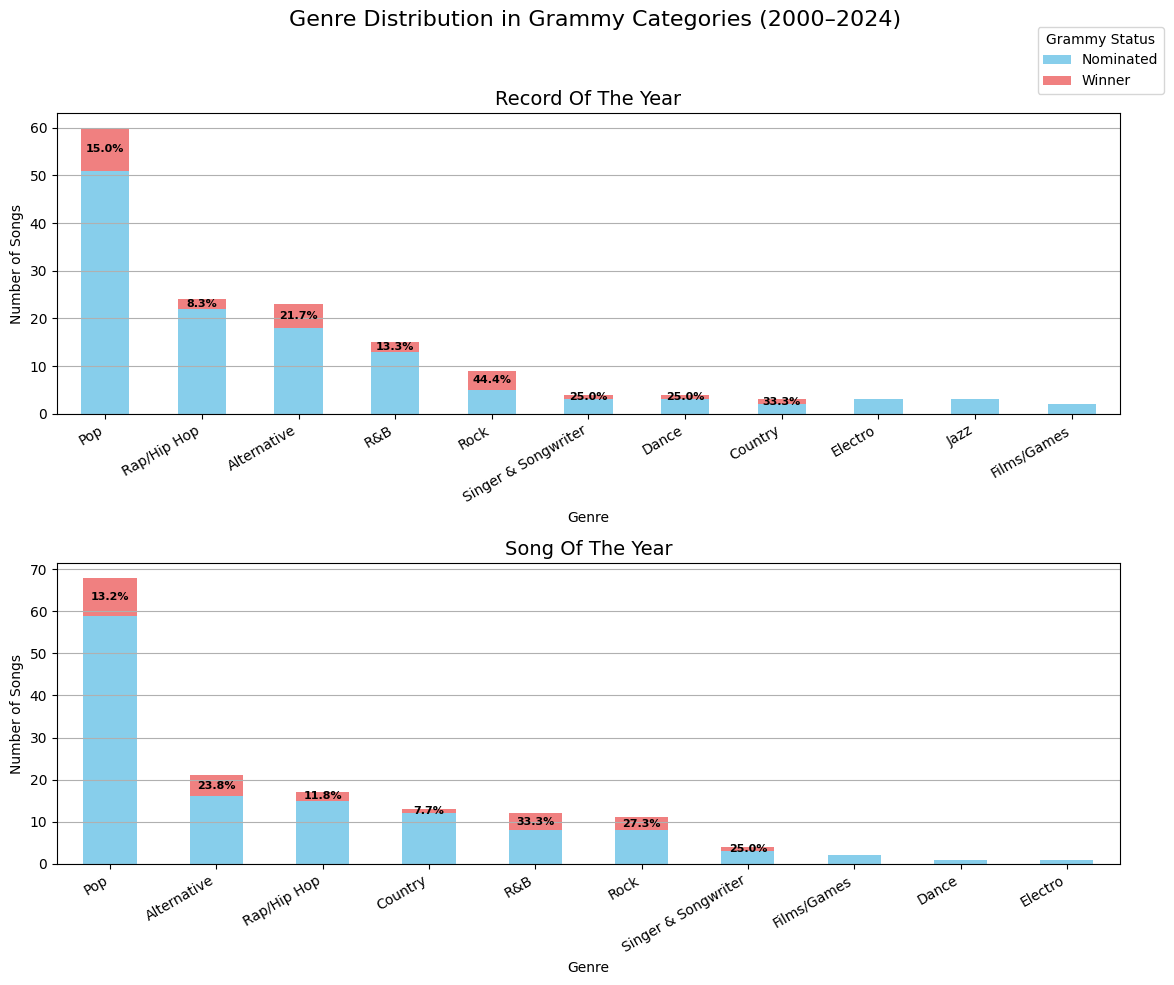

In [94]:
import matplotlib.pyplot as plt

categories = ['Record Of The Year', 'Song Of The Year']

# 2 baris, 1 kolom
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=False)

for ax, category in zip(axes, categories):
    df_plot = merged_sg[
        (merged_sg['Category'] == category) &
        (merged_sg['Win'].isin([0, 1])) &
        (merged_sg['Year'].between(2000, 2024))
    ].copy()

    df_plot['Win Label'] = df_plot['Win'].map({0: 'Nominated', 1: 'Winner'})

    genre_win = df_plot.groupby(['Genre', 'Win Label']).size().unstack(fill_value=0)
    print(genre_win)


    genre_win['Total'] = genre_win.sum(axis=1)
    print(genre_win)

    genre_win['Win Rate (%)'] = (genre_win.get('Winner', 0) / genre_win['Total']) * 100
    print(genre_win)

    top_genres = genre_win.sort_values('Total', ascending=False).head(11)

    top_genres[['Nominated', 'Winner']].plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color={'Nominated': 'skyblue', 'Winner': 'lightcoral'},
        legend=False
    )

    for idx, (total, win, rate) in enumerate(zip(top_genres['Total'], top_genres.get('Winner', 0), top_genres['Win Rate (%)'])):
        if win > 0:
            ax.text(
                idx, total - (win / 2),
                f"{rate:.1f}%",
                ha='center', va='center', color='black', fontweight='bold', fontsize=8
            )

    ax.set_title(f"{category}", fontsize=14)
    ax.set_xlabel("Genre")
    ax.set_ylabel("Number of Songs")
    ax.set_xticks(range(len(top_genres)))
    ax.set_xticklabels(top_genres.index, rotation=30, ha='right')
    ax.grid(True, axis='y')

# Judul utama dan legend
fig.suptitle("Genre Distribution in Grammy Categories (2000–2024)", fontsize=16)
fig.legend(["Nominated", "Winner"], title="Grammy Status", loc="upper right", bbox_to_anchor=(0.98, 0.97))
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

In [96]:
#Uji Chi-Square: Genre vs Win Label per Kategori
from scipy.stats import chi2_contingency
import pandas as pd

categories = ['Record Of The Year', 'Song Of The Year']

for category in categories:
    print(f"\nCategory: {category}")

    df_plot = merged_sg[
        (merged_sg['Category'] == category) &
        (merged_sg['Win'].isin([0, 1])) &
        (merged_sg['Year'].between(2000, 2024))
    ].copy()

    df_plot['Win Label'] = df_plot['Win'].map({0: 'Nominated', 1: 'Winner'})

    # Ambil 10 genre teratas (supaya tabel tidak terlalu sparse)
    top_genres = df_plot['Genre'].value_counts().head(5).index
    df_subset = df_plot[df_plot['Genre'].isin(top_genres)]

    # Tabel kontingensi
    contingency = pd.crosstab(df_subset['Genre'], df_subset['Win Label'])

    # Cek apakah ada sel terlalu kecil
    low_freq_cells = (contingency < 5).sum().sum()
    if low_freq_cells > 0:
        print(f"Terdapat {low_freq_cells} sel dengan frekuensi < 5, perhaps hasil mungkin kurang stabil.")

    # Uji chi-square
    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"Chi-square: {chi2:.2f}")
    print(f"p-value   : {p:.4f}")
    print(f"Degrees of freedom: {dof}")

    if p < 0.05:
        print("Terdapat hubungan signifikan antara genre dan status kemenangan.")
    else:
        print("Tidak ada hubungan signifikan antara genre dan status kemenangan.")


Category: Record Of The Year
Terdapat 3 sel dengan frekuensi < 5, perhaps hasil mungkin kurang stabil.
Chi-square: 6.82
p-value   : 0.1455
Degrees of freedom: 4
Tidak ada hubungan signifikan antara genre dan status kemenangan.

Category: Song Of The Year
Terdapat 3 sel dengan frekuensi < 5, perhaps hasil mungkin kurang stabil.
Chi-square: 4.91
p-value   : 0.2968
Degrees of freedom: 4
Tidak ada hubungan signifikan antara genre dan status kemenangan.


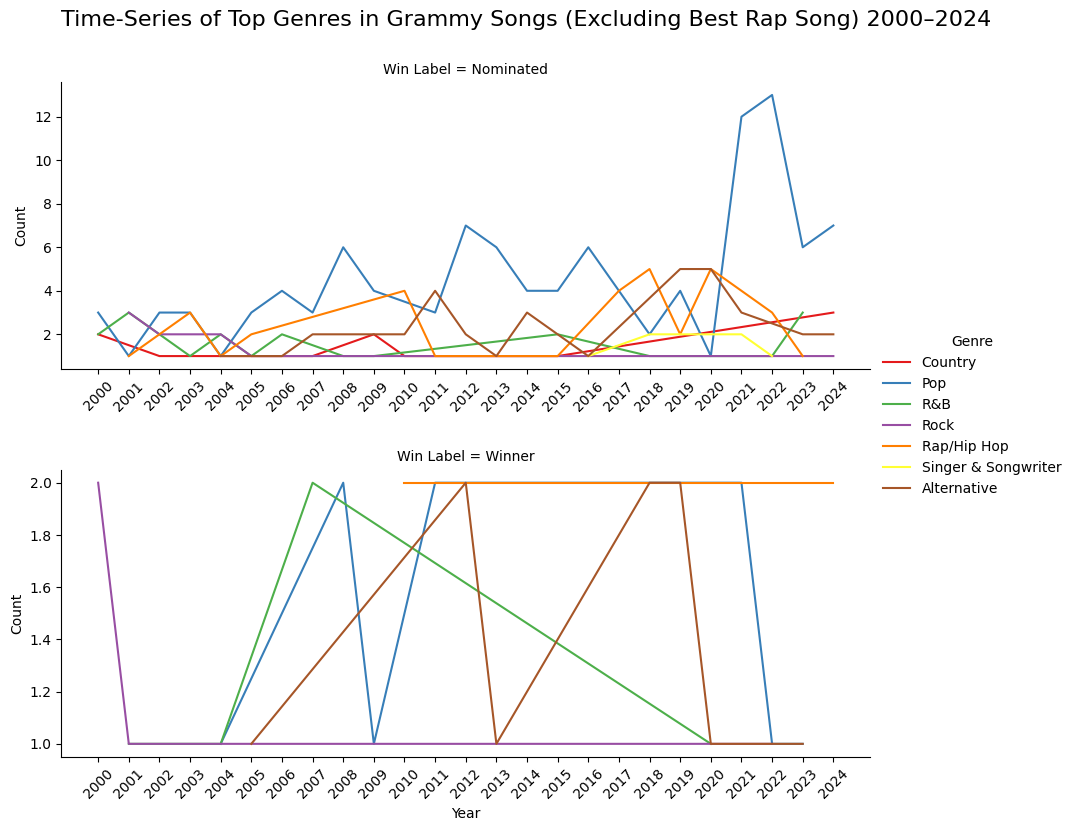

In [97]:
#Time Series Genre General
# Filter semua Grammy songs (kecuali Best Rap Song)
df_line_all = merged_sg[
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024)) &
    (merged_sg['Category'] != 'Best Rap Song')
].copy()

df_line_all['Win Label'] = df_line_all['Win'].map({0: 'Nominated', 1: 'Winner'})

# Ambil top 11 genre paling sering muncul
top_genres_all = df_line_all['Genre'].value_counts().head(7).index.tolist()
df_line_all = df_line_all[df_line_all['Genre'].isin(top_genres_all)]

# Grouping per tahun, genre, dan status menang
genre_year_all = df_line_all.groupby(['Year', 'Genre', 'Win Label']).size().reset_index(name='Count')

# Plot relplot time series
g = sns.relplot(
    data=genre_year_all,
    x='Year', y='Count',
    hue='Genre', kind='line',
    row='Win Label',
    palette='Set1',
    height=4.5, aspect=2,
    facet_kws={'sharey': False}
)

# Perbaiki tampilan x-axis
for ax in g.axes.flat:
    ax.set_xticks(range(2000, 2025))
    ax.set_xticklabels(range(2000, 2025), rotation=45)
    ax.tick_params(labelbottom=True)

# Judul dan layout
g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
g.fig.suptitle("Time-Series of Top Genres in Grammy Songs (Excluding Best Rap Song) 2000–2024", fontsize=16)

plt.show()

In [98]:
# # Filter data
# df_line = merged_sg[
#     (merged_sg['Category'] == 'Record Of The Year') &
#     (merged_sg['Win'].isin([0, 1])) &
#     (merged_sg['Year'].between(2000, 2024))
# ].copy()

# df_line['Win Label'] = df_line['Win'].map({0: 'Nominated', 1: 'Winner'})

# # Top genres
# top_genres = df_line['Genre'].value_counts().head(7).index.tolist()
# df_line = df_line[df_line['Genre'].isin(top_genres)]

# # Grouping
# genre_year = df_line.groupby(['Year', 'Genre', 'Win Label']).size().reset_index(name='Count')

# # Relplot
# g = sns.relplot(
#     data=genre_year,
#     x='Year', y='Count',
#     hue='Genre', kind='line',
#     row='Win Label',
#     palette='Set1',   # atau coba 'tab10', 'Dark2', Set1, dst
#     height=4.5, aspect=2,
#     facet_kws={'sharey': False}
# )


# # Force x-axis labels to appear on all subplots
# for ax in g.axes.flat:
#     ax.set_xticks(range(2000, 2025))
#     ax.set_xticklabels(range(2000, 2025), rotation=45)
#     ax.tick_params(labelbottom=True)  # << THIS fixes the problem

# # Title & layout
# g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
# g.fig.suptitle("Time-Series of Top Genres in 'Record Of The Year' Category (2000–2024)", fontsize=16)

# plt.show()

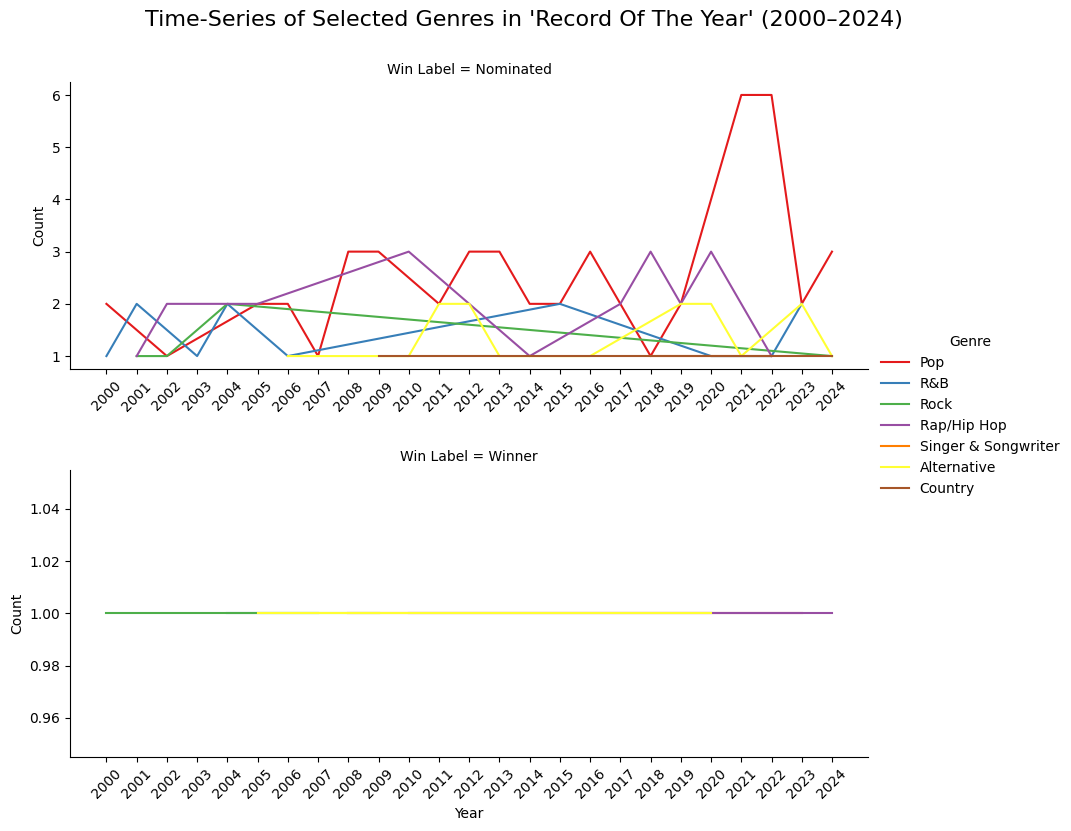

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk kategori Record Of The Year dan tahun 2000–2024
df_line = merged_sg[
    (merged_sg['Category'] == 'Record Of The Year') &
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

# Tambahkan label menang/kalah
df_line['Win Label'] = df_line['Win'].map({0: 'Nominated', 1: 'Winner'})

# Gunakan hanya 7 genre pilihan
top_genres = ['Pop', 'Alternative', 'Rap/Hip Hop', 'Country', 'R&B', 'Rock', 'Singer & Songwriter']
df_line = df_line[df_line['Genre'].isin(top_genres)]

# Hitung jumlah per genre, per tahun, per status menang
genre_year = df_line.groupby(['Year', 'Genre', 'Win Label']).size().reset_index(name='Count')

# Buat relplot (time series line plot)
g = sns.relplot(
    data=genre_year,
    x='Year', y='Count',
    hue='Genre', kind='line',
    row='Win Label',
    palette='Set1',
    height=4.5, aspect=2,
    facet_kws={'sharey': False}
)

# Tampilkan semua label tahun di x-axis
for ax in g.axes.flat:
    ax.set_xticks(range(2000, 2025))
    ax.set_xticklabels(range(2000, 2025), rotation=45)
    ax.tick_params(labelbottom=True)

# Judul dan layout
g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
g.fig.suptitle("Time-Series of Selected Genres in 'Record Of The Year' (2000–2024)", fontsize=16)

plt.show()

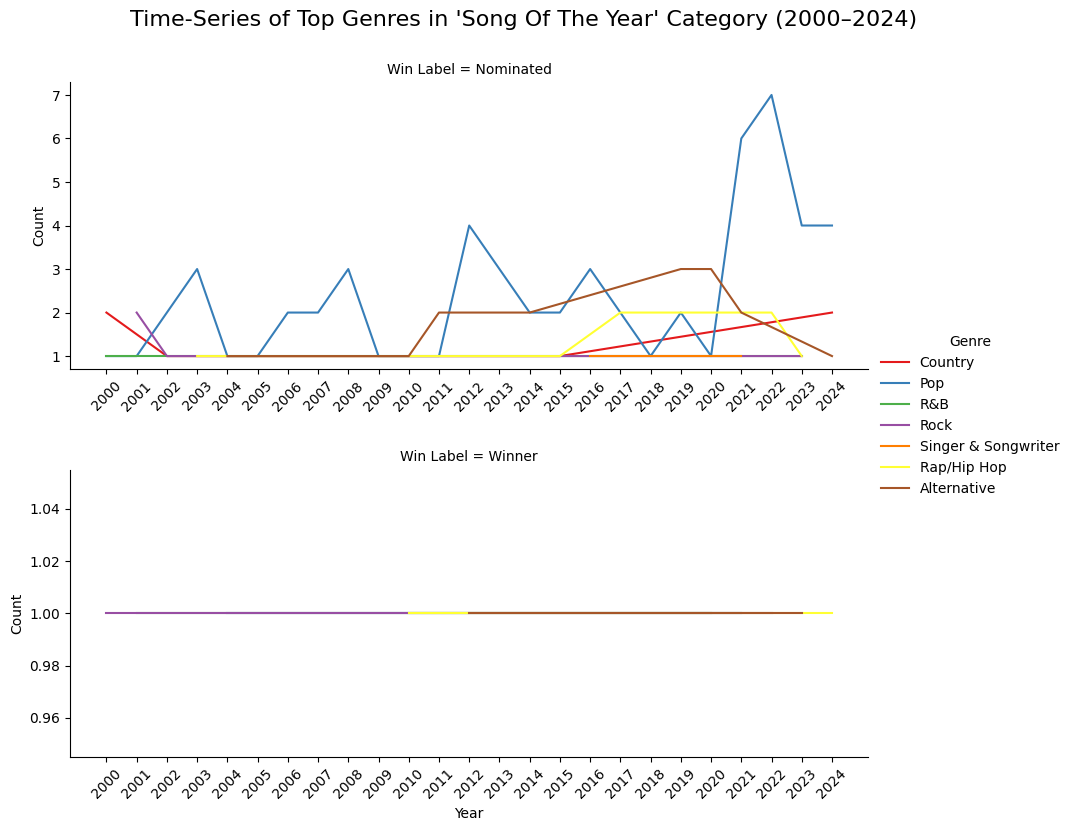

In [100]:
# Filter data
df_line = merged_sg[
    (merged_sg['Category'] == 'Song Of The Year') &
    (merged_sg['Win'].isin([0, 1])) &
    (merged_sg['Year'].between(2000, 2024))
].copy()

df_line['Win Label'] = df_line['Win'].map({0: 'Nominated', 1: 'Winner'})

# Top genres
top_genres = ['Pop', 'R&B', 'Rock', 'Rap/Hip Hop', 'Singer & Songwriter', 'Alternative', 'Country']
df_line = df_line[df_line['Genre'].isin(top_genres)]

# Grouping
genre_year = df_line.groupby(['Year', 'Genre', 'Win Label']).size().reset_index(name='Count')

# Relplot
g = sns.relplot(
    data=genre_year,
    x='Year', y='Count',
    hue='Genre', kind='line',
    row='Win Label',
    palette='Set1',   # atau coba 'tab10', 'Dark2', Set1, dst
    height=4.5, aspect=2,
    facet_kws={'sharey': False}
)


# Force x-axis labels to appear on all subplots
for ax in g.axes.flat:
    ax.set_xticks(range(2000, 2025))
    ax.set_xticklabels(range(2000, 2025), rotation=45)
    ax.tick_params(labelbottom=True)  # << THIS fixes the problem

# Title & layout
g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
g.fig.suptitle("Time-Series of Top Genres in 'Song Of The Year' Category (2000–2024)", fontsize=16)

plt.show()

 3. Grammys Songs (Tempo Loudness Based on Release Date on General)

In [101]:
print(merged_sg.columns)

Index(['Song ID', 'Title', 'Cleaned Title', 'Artist', 'Main Artist', 'Feat',
       'Song Writers/Credits', 'Producer', 'Label', 'Album', 'Duration',
       'Spotify Featured Artists', 'Spotify Found', 'Release Date',
       'Genius Album', 'Genius Found', 'Lyrics', 'Genre', 'Tempo', 'Loudness',
       'Cleaned Main Artist', 'ArtistID', 'Win', 'Category', 'Year'],
      dtype='object')


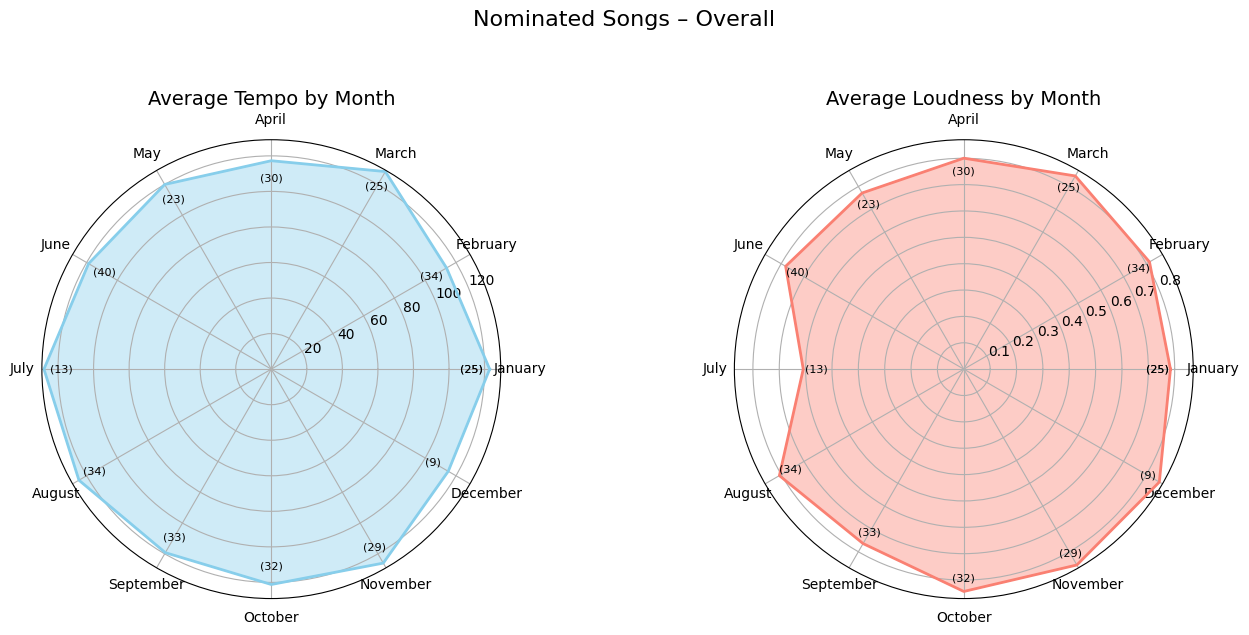

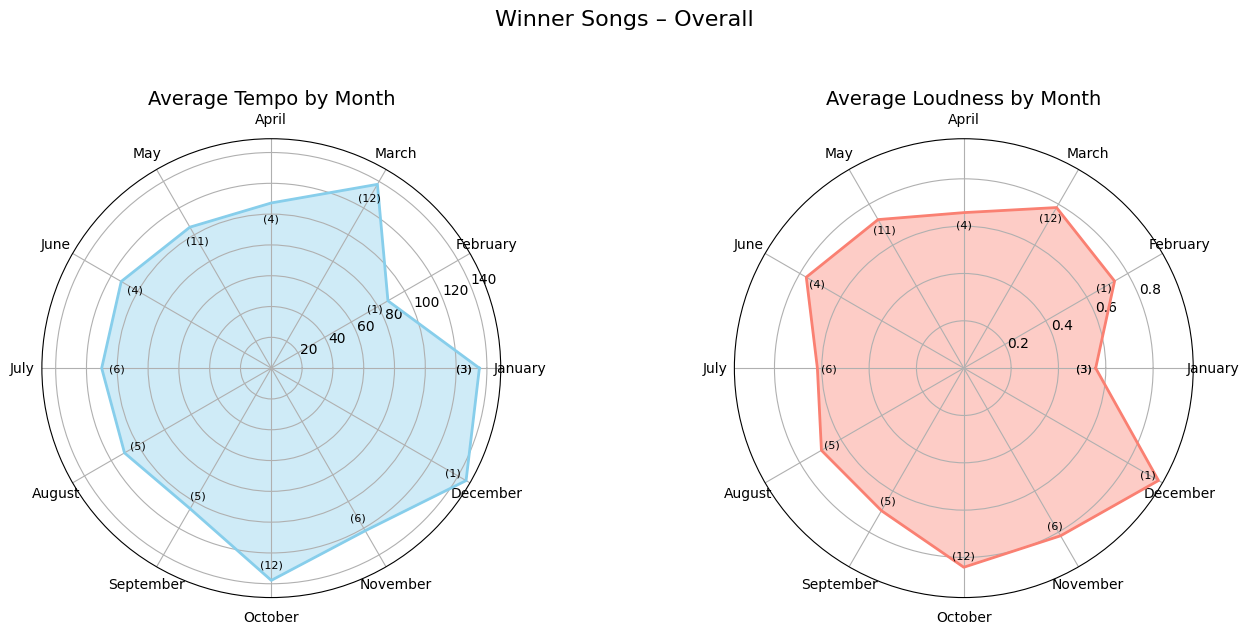

In [102]:
# Konversi tanggal dan ambil nama serta nomor bulan
merged_sg['Release Date'] = pd.to_datetime(merged_sg['Release Date'], errors='coerce')
merged_sg['Month'] = merged_sg['Release Date'].dt.month_name()
merged_sg['Month_Num'] = merged_sg['Release Date'].dt.month

# Mapping label
merged_sg['Win Label'] = merged_sg['Win'].map({0: 'Nominated', 1: 'Winner'})

# Urutan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Loop untuk masing-masing Win Label
for label in ['Nominated', 'Winner']:
    df_sub = merged_sg[merged_sg['Win Label'] == label]

    # Hitung rata-rata tempo & loudness per bulan
    avg_stats = df_sub.groupby('Month').agg({'Tempo': 'mean', 'Loudness': 'mean'}).reindex(month_order)
    count_stats = df_sub.groupby('Month').size().reindex(month_order, fill_value=0)

    # Buat angle untuk radar chart
    angles = np.linspace(0, 2 * np.pi, len(avg_stats), endpoint=False).tolist()
    angles += angles[:1]

    tempo_values = avg_stats['Tempo'].fillna(0).tolist()
    loudness_values = avg_stats['Loudness'].fillna(0).tolist()
    tempo_values += tempo_values[:1]
    loudness_values += loudness_values[:1]

    count_values = count_stats.tolist()
    count_values += count_values[:1]

    # Radar chart
    fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))

    # --- Tempo Plot ---
    ax[0].plot(angles, tempo_values, color='skyblue', linewidth=2)
    ax[0].fill(angles, tempo_values, color='skyblue', alpha=0.4)
    ax[0].set_title('Average Tempo by Month', size=14, pad=25)
    ax[0].set_xticks(angles[:-1])
    ax[0].set_xticklabels(month_order)

    # Tambahkan label jumlah lagu
    for angle, value, count in zip(angles, tempo_values, count_values):
        if count > 0:
            ax[0].text(angle, value - 10, f'({count})', ha='center', va='center', fontsize=8)

    # --- Loudness Plot ---
    ax[1].plot(angles, loudness_values, color='salmon', linewidth=2)
    ax[1].fill(angles, loudness_values, color='salmon', alpha=0.4)
    ax[1].set_title('Average Loudness by Month', size=14, pad=25)
    ax[1].set_xticks(angles[:-1])
    ax[1].set_xticklabels(month_order)

    for angle, value, count in zip(angles, loudness_values, count_values):
        if count > 0:
            ax[1].text(angle, value - 0.05, f'({count})', ha='center', va='center', fontsize=8)

    plt.suptitle(f"{label} Songs – Overall", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

two-way anova (maunya pake two-way tapi datanya ga normal)

In [103]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Filter data yang valid ---
df_anova = merged_sg.copy()
df_anova = df_anova[df_anova['Win'].isin([0, 1])]
df_anova = df_anova[df_anova['Release Date'].notna()]
df_anova['Month'] = df_anova['Release Date'].dt.month_name()
df_anova['Win_Label'] = df_anova['Win'].map({0: 'Nominated', 1: 'Winner'})

# Hapus baris yang loudness-nya NaN
df_anova = df_anova[df_anova['Loudness'].notna()]

# Cek asumsi: jumlah data minimum
group_counts = df_anova.groupby(['Month', 'Win_Label']).size()
if (group_counts < 3).any():
    print("Beberapa kombinasi Month × Win_Label punya kurang dari 3 data. ANOVA bisa tidak valid.")
else:
    print("Jumlah data cukup untuk semua grup.")

#Cek normalitas:
months = df_anova['Month'].unique()
labels = df_anova['Win_Label'].unique()
for m in months:
    for l in labels:
        vals = df_anova[(df_anova['Month'] == m) & (df_anova['Win_Label'] == l)]['Loudness']
        if len(vals) >= 3:
            p = shapiro(vals).pvalue
            print(f"{m[:3]} | {l:9}: p = {p:.4f} → {'Normal' if p > 0.05 else 'Not normal'}")
        else:
            print(f"{m[:3]} | {l:9}: (n={len(vals)}) Skipped")

# Cek homogenitas varians
groups = [group['Loudness'].values for _, group in df_anova.groupby(['Month', 'Win_Label'])]
stat, p_levene = levene(*groups)
print(f"Levene p = {p_levene:.4f} → {'Varians homogen' if p_levene > 0.05 else 'Varians tidak homogen'}")

#Two-Way ANOVA
model = ols('Loudness ~ C(Month) + C(Win_Label) + C(Month):C(Win_Label)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Beberapa kombinasi Month × Win_Label punya kurang dari 3 data. ANOVA bisa tidak valid.
Mar | Winner   : p = 0.0145 → Not normal
Mar | Nominated: p = 0.0521 → Normal
Oct | Winner   : p = 0.0160 → Not normal
Oct | Nominated: p = 0.0014 → Not normal
Jul | Winner   : p = 0.4040 → Normal
Jul | Nominated: p = 0.0703 → Normal
Jan | Winner   : p = 0.9774 → Normal
Jan | Nominated: p = 0.0001 → Not normal
Sep | Winner   : p = 0.3204 → Normal
Sep | Nominated: p = 0.0019 → Not normal
May | Winner   : p = 0.0518 → Normal
May | Nominated: p = 0.0004 → Not normal
Aug | Winner   : p = 0.0224 → Not normal
Aug | Nominated: p = 0.0000 → Not normal
Apr | Winner   : p = 0.0781 → Normal
Apr | Nominated: p = 0.0001 → Not normal
Nov | Winner   : p = 0.2884 → Normal
Nov | Nominated: p = 0.0030 → Not normal
Feb | Winner   : (n=1) Skipped
Feb | Nominated: p = 0.0002 → Not normal
Jun | Winner   : p = 0.0381 → Not normal
Jun | Nominated: p = 0.0000 → Not normal
Dec | Winner   : (n=1) Skipped
Dec | Nominated: p = 0

So instead of two-way anova, i just want to do one way annova per each data (nominateed or winner)
question:
is nominated song's lodness has significant different compare to each month?
is winner song'loudness

In [104]:
from scipy.stats import kruskal

# WINNER saja
df_win = df_plot[(df_plot['Win Label'] == 'Winner') & (df_plot['Loudness'].notna())]
groups_win = [group['Loudness'].values for _, group in df_win.groupby('Release Date') if len(group) >= 3]

if len(groups_win) >= 2:
    h_stat_win, p_win = kruskal(*groups_win)
    print(f"Winner, Kruskal-Wallis p-value = {p_win:.4f}")
else:
    print("Winner: terlalu sedikit grup dengan cukup data untuk uji statistik.")

# NOMINATED saja
df_nom = df_plot[(df_plot['Win Label'] == 'Nominated') & (merged_sg['Loudness'].notna())]
groups_nom = [group['Loudness'].values for _, group in df_nom.groupby('Release Date') if len(group) >= 3]

if len(groups_nom) >= 2:
    h_stat_nom, p_nom = kruskal(*groups_nom)
    print(f"📊 Nominated → Kruskal-Wallis p-value = {p_nom:.4f}")
else:
    print("Nominated: terlalu sedikit grup dengan cukup data untuk uji statistik.")


Winner: terlalu sedikit grup dengan cukup data untuk uji statistik.
Nominated: terlalu sedikit grup dengan cukup data untuk uji statistik.


<ipython-input-104-0f4ff71529d5>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nom = df_plot[(df_plot['Win Label'] == 'Nominated') & (merged_sg['Loudness'].notna())]


In [105]:
print(avg_stats.round(2))

            Tempo  Loudness
Month                      
January    135.12      0.56
February    87.45      0.74
March      137.80      0.78
April      107.26      0.66
May        105.70      0.72
June       112.52      0.77
July       110.13      0.62
August     110.05      0.69
September  105.40      0.70
October    137.81      0.84
November   121.94      0.82
December   146.03      0.95


In [106]:
merged_sg['Release Date'] = pd.to_datetime(merged_sg['Release Date'], errors='coerce')

merged_sg.head(10)

Song ID                         Title                 Cleaned Title  \
0      S0  I Don't Want To Miss A Thing  I Don't Want To Miss A Thing   
1      S1               The First Night               The First Night   
2      S2                         Crush                         Crush   
3      S3                        My Way                        My Way   
4      S4               The Boy Is Mine               The Boy Is Mine   
5      S5               Time After Time               Time After Time   
6      S6                       I'll Be                       I'll Be   
7      S7                   Daydreamin'                   Daydreamin'   
8      S8                     Too Close                     Too Close   
9      S9          You're Still The One          You're Still The One   

            Artist     Main Artist    Feat  \
0        Aerosmith       Aerosmith     NaN   
1           Monica          Monica     NaN   
2   Jennifer Paige  Jennifer Paige     NaN   
3            Usher           Usher     NaN   
4  Brandy & Monica          Brandy  Monica   
5             Inoj            Inoj     NaN   
6     Edwin McCain    Edwin McCain     NaN   
7      Tatyana Ali     Tatyana Ali     NaN   
8             Next            Next     NaN   
9     Shania Twain    Shania Twain     NaN   

                                Song Writers/Credits  \
0                                         D.E.Warren   
1    J.Dupri Mauldin, T.Savage, M.McLeod, P.J.Sawyer   
2         A.Goldmark, M.Mueller, B.Cosgrove, K.Clark   
3       J.Dupri Mauldin, M.L.Seal, Jr., U.Raymond IV   
4  R.Jerkins, B.R.Norwood, L.A.Daniels, F.Jerkins...   
5                                 C.Lauper, R. Hyman   
6                                           E.McCain   
7  R.Jerkins, L.A.Daniels, F.Jerkins III, P.Panke...   
8  K.Gist, D.Lighty, RL, R.Brown, R.A.Ford, D.Mil...   
9                                 S.Twain, R.J.Lange   

                      Producer               Label  \
0                   M.Serletic            Columbia   
1                      J.Dupri              Arista   
2       A.Goldmark, J.Bralower      edel/Hollywood   
3                      J.Dupri       LaFace/Arista   
4  R.Jerkins, D.Austin, Brandy            Atlantic   
5                    C.M.Roane  So So Def/Columbia   
6                   M.Serletic       Lava/Atlantic   
7                    R.Jerkins   MJJ/Work/550-Work   
8             KayGee, D.Lighty              Arista   
9                    R.J.Lange   Mercury Nashville   

                                           Album  Duration  \
0                I Don't Want To Miss A Thing EP   299.723   
1                                The Boy Is Mine   235.573   
2                                 Jennifer Paige   200.293   
3                                         My Way   214.853   
4                        the boy is mine (Remix)   213.384   
5                                Time After Time   254.026   
6                                Misguided Roses   266.533   
7                                   Kiss The Sky   300.133   
8                                     Rated Next   259.440   
9  Come On Over (Diamond Edition / Super Deluxe)   212.224   

  Spotify Featured Artists  Spotify Found Release Date Genius Album  \
0                      NaN              1   1998-08-18          NaN   
1                      NaN              1   1998-07-07          NaN   
2                      NaN              1   1998-06-16          NaN   
3                      NaN              1   1997-09-16          NaN   
4            Brandy,Monica              1   1998-05-19          NaN   
5                      NaN              1   1999-08-03          NaN   
6                      NaN              1          NaT          NaN   
7    Lord Tariq,Peter Gunz              1   1998-07-21          NaN   
8                      NaN              1   1997-09-30          NaN   
9                      NaN              1   1998-01-27          NaN   

   Genius Foun

In [107]:
merged_sg[['Title', 'Release Date']].head(10)

Title Release Date
0  I Don't Want To Miss A Thing   1998-08-18
1               The First Night   1998-07-07
2                         Crush   1998-06-16
3                        My Way   1997-09-16
4               The Boy Is Mine   1998-05-19
5               Time After Time   1999-08-03
6                       I'll Be          NaT
7                   Daydreamin'   1998-07-21
8                     Too Close   1997-09-30
9          You're Still The One   1998-01-27

4. Grammys Songs (Tempo Loudness Based on Release Date per Category)

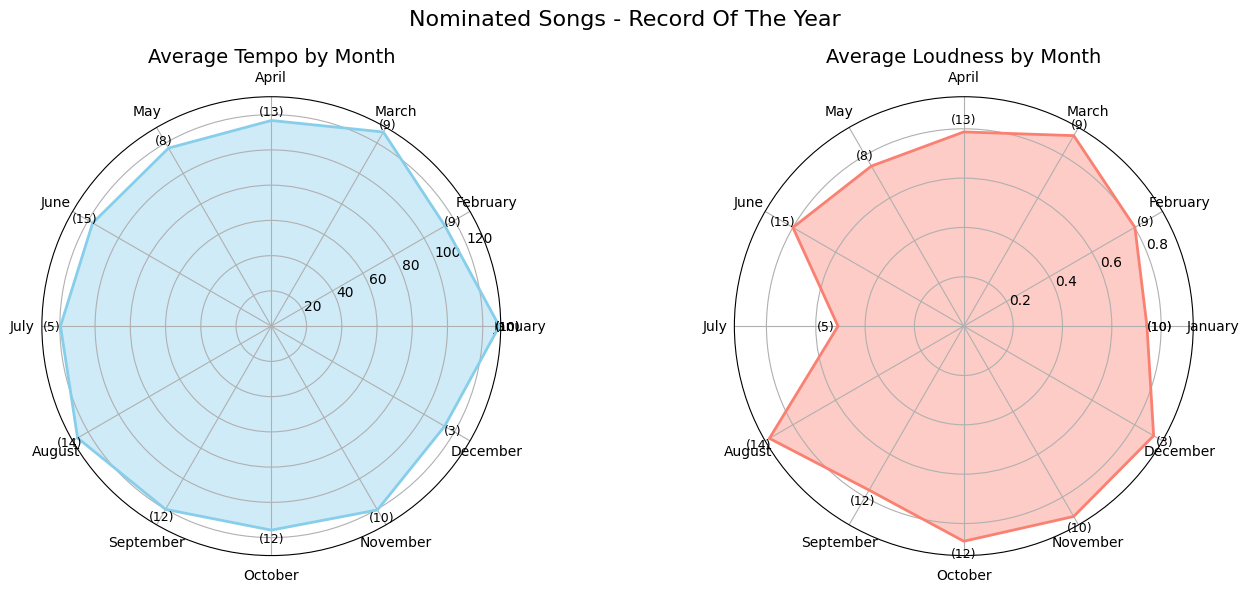

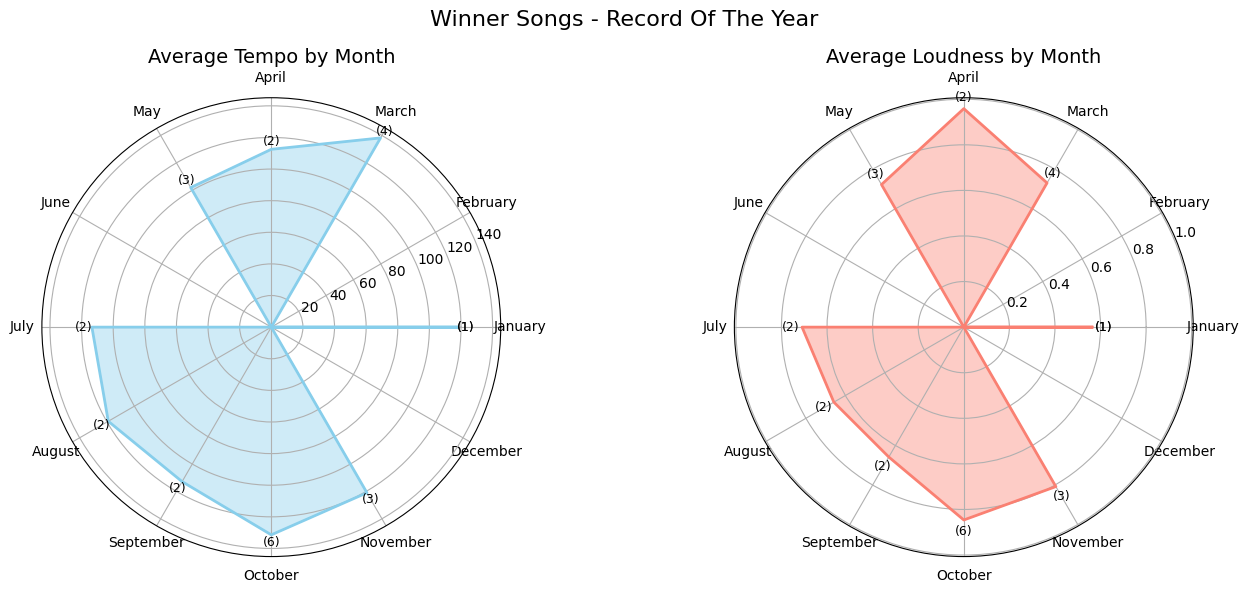

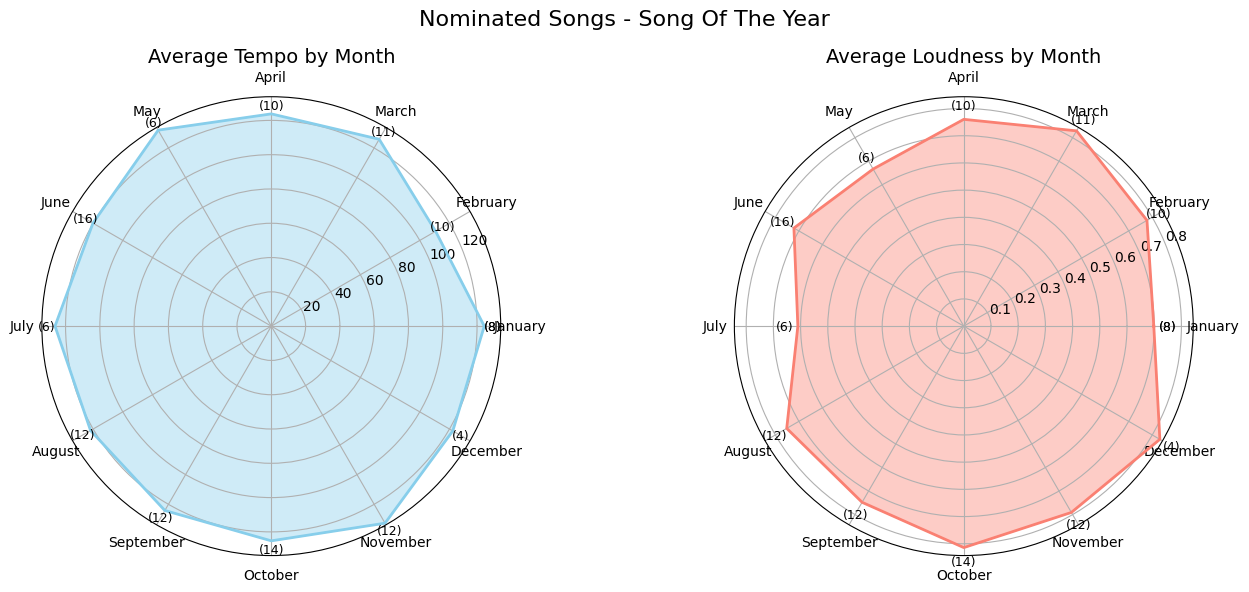

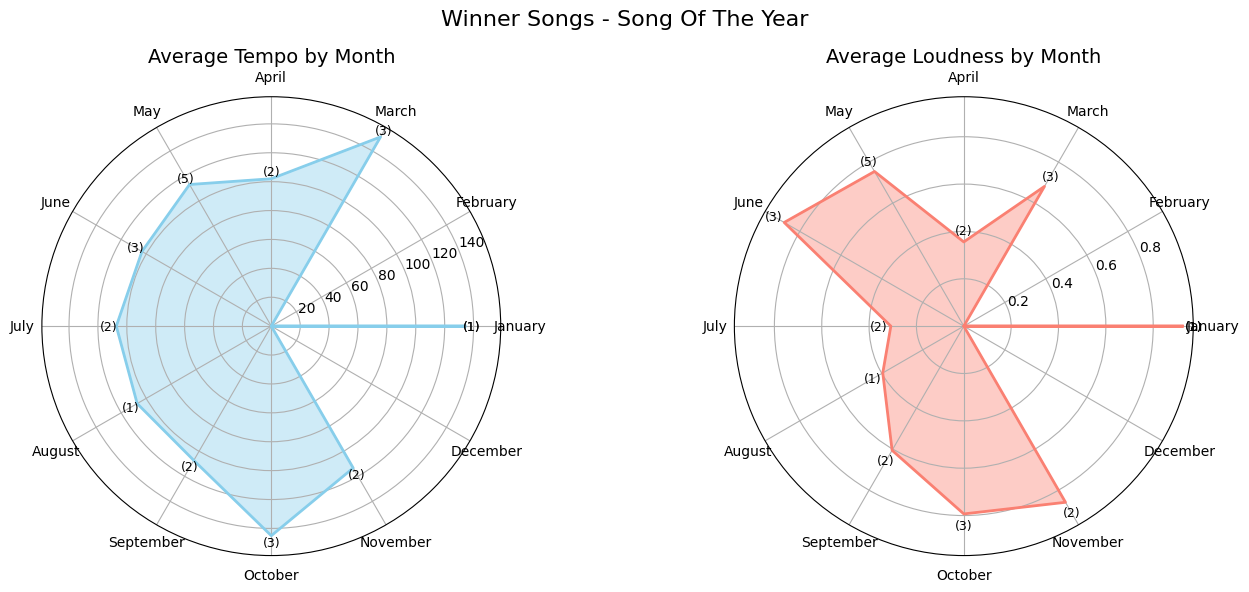

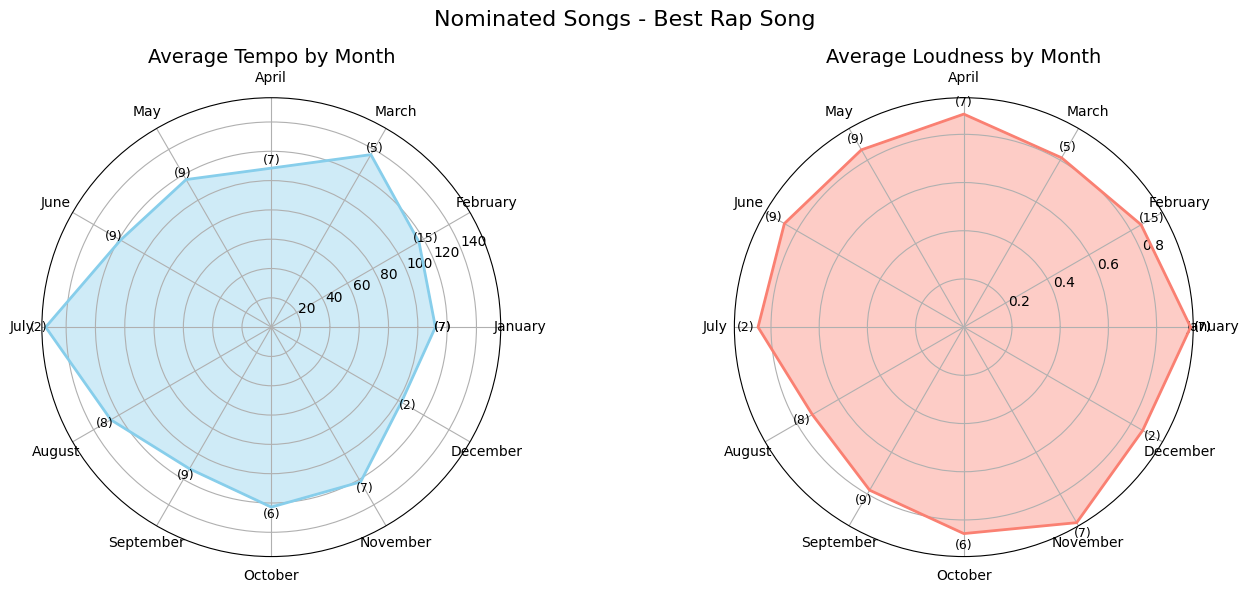

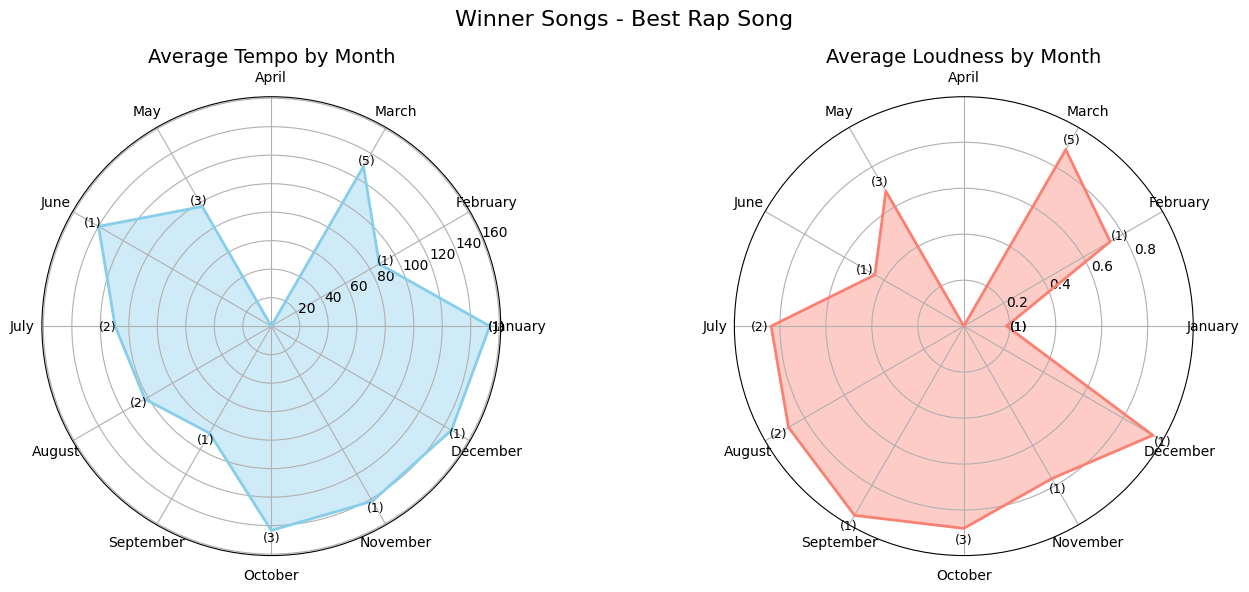

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pastikan tanggal valid & ekstrak bulan
merged_sg['Release Date'] = pd.to_datetime(merged_sg['Release Date'], errors='coerce')
merged_sg['Month'] = merged_sg['Release Date'].dt.month_name()
merged_sg['Month_Num'] = merged_sg['Release Date'].dt.month
merged_sg['Win Label'] = merged_sg['Win'].map({0: 'Nominated', 1: 'Winner'})

# Urutan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Kategori Grammy
target_categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

# Loop setiap kategori
for category in target_categories:
    df_cat = merged_sg[merged_sg['Category'] == category].copy()

    for status in ['Nominated', 'Winner']:
        df_status = df_cat[df_cat['Win Label'] == status]

        # Hitung statistik
        avg_stats = df_status.groupby('Month')[['Tempo', 'Loudness']].mean().reindex(month_order)
        count_stats = df_status.groupby('Month').size().reindex(month_order).fillna(0).astype(int)

        # Polar coordinates
        angles = np.linspace(0, 2 * np.pi, len(month_order), endpoint=False).tolist()
        angles += angles[:1]

        tempo_values = avg_stats['Tempo'].fillna(0).tolist()
        loudness_values = avg_stats['Loudness'].fillna(0).tolist()
        tempo_values += tempo_values[:1]
        loudness_values += loudness_values[:1]
        count_labels = count_stats.tolist() + [count_stats.tolist()[0]]

        # Plotting
        fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))
        fig.suptitle(f"{status} Songs - {category}", fontsize=16)

        # Tempo plot
        ax[0].plot(angles, tempo_values, color='skyblue', linewidth=2)
        ax[0].fill(angles, tempo_values, color='skyblue', alpha=0.4)
        ax[0].set_title('Average Tempo by Month', size=14, pad=25)
        ax[0].set_xticks(angles[:-1])
        ax[0].set_xticklabels(month_order)

        for angle, val, count in zip(angles, tempo_values, count_labels):
            if count > 0:
                ax[0].text(angle, val + 5, f'({count})', ha='center', va='center', fontsize=9)

        # Loudness plot
        ax[1].plot(angles, loudness_values, color='salmon', linewidth=2)
        ax[1].fill(angles, loudness_values, color='salmon', alpha=0.4)
        ax[1].set_title('Average Loudness by Month', size=14, pad=25)
        ax[1].set_xticks(angles[:-1])
        ax[1].set_xticklabels(month_order)

        for angle, val, count in zip(angles, loudness_values, count_labels):
            if count > 0:
                ax[1].text(angle, val + 0.05, f'({count})', ha='center', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

In [109]:
# Filter untuk winner di kategori Record Of The Year
winner_roty = merged_sg[
    (merged_sg['Category'] == 'Record Of The Year') &
    (merged_sg['Win'] == 1)
]

# Tampilkan kolom Title dan Release Date
print(winner_roty[['Title', 'Release Date']].sort_values(by='Release Date'))

                              Title Release Date
92                 Here We Go Again   1998-03-23
785                   Beautiful Day   2000-10-09
11584                       Walk On   2000-10-30
1371                 Don't Know Why   2002-07-01
1475                         Clocks   2002-08-26
2045     Boulevard Of Broken Dreams   2004-09-21
2534         Not Ready To Make Nice   2006-03-24
2870                          Rehab   2006-10-23
11580        Please Read The Letter   2007-10-23
3449                   Use Somebody   2008-09-19
3815                   Need You Now   2009-08-11
4465            Rolling In The Deep   2010-11-29
4970   Somebody That I Used To Know   2011-07-05
5429                      Get Lucky   2013-04-19
5807                   Stay With Me   2014-05-26
6042                   Uptown Funk!   2014-11-10
6409                          Hello   2015-10-23
6797                      24K Magic   2016-10-07
7562                This Is America   2018-05-06
8090                

In [110]:
# Hitung jumlah lagu pemenang per bulan
winner_roty_count = winner_roty.groupby('Month')['Title'].count()
print(winner_roty_count)

Month
April        2
August       2
January      1
July         2
March        4
May          3
November     3
October      6
September    2
Name: Title, dtype: int64


5. Artist Data & Grammys Song

In [111]:
#Normalisasi sebelum merge biar gak ada masalah


grammys_df['ArtistID'] = grammys_df['ArtistID'].astype(str).str.strip().str.upper()
artists_df['ArtistID'] = artists_df['ArtistID'].astype(str).str.strip().str.upper()

#Merging SongID and Artist ID from Songs Data and Grammys Data
merged_ga = pd.merge(grammys_df, artists_df[['ArtistID', 'Birth Date','Gender', 'US State']], on='ArtistID', how='left')

merged_ga.shape

(413, 15)

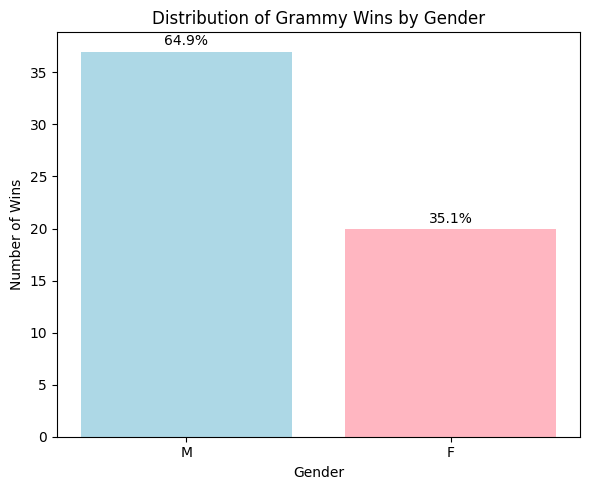

In [112]:
#In general, who win often, Female or Male?
# Filter pemenang Grammy
winners = merged_ga[merged_ga['Win'] == 1]

# Hitung jumlah berdasarkan gender
gender_win_counts = winners['Gender'].value_counts()

# Total untuk persentase
total = gender_win_counts.sum()

# Urutkan sesuai urutan preferensi warna
gender_order = ['M', 'F', 'Other']  #
colors = {'M': 'lightblue', 'F': 'lightpink', 'Other': 'lightgrey'}

# Filter data sesuai gender yang muncul
gender_labels = [g for g in gender_order if g in gender_win_counts.index]
counts = [gender_win_counts[g] for g in gender_labels]
bar_colors = [colors[g] for g in gender_labels]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(gender_labels, counts, color=bar_colors)
plt.title("Distribution of Grammy Wins by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Wins")

# Tambahkan persentase
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
    bar.get_x() + bar.get_width() / 2,
    height * 1.01,  # tambahkan 1% dari tinggi batang
    f"{percent:.1f}%",
    ha='center',
    va='bottom',
    fontsize=10
    )

plt.tight_layout()
plt.show()

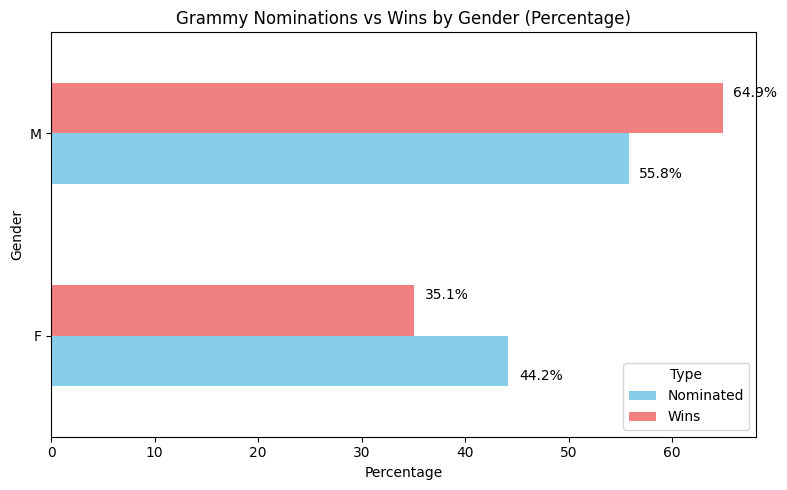

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter hanya 'M' dan 'F'
filtered_df = merged_ga[merged_ga['Gender'].isin(['M', 'F'])]

# Hitung jumlah untuk nominations dan wins
nominee_counts = filtered_df['Gender'].value_counts()
winner_counts = filtered_df[filtered_df['Win'] == 1]['Gender'].value_counts()

# Hitung total untuk persentase
total_nominees = nominee_counts.sum()
total_winners = winner_counts.sum()

# Siapkan DataFrame
data = []
for gender in ['F', 'M']:  # urutan ditentukan di sini
    nom_pct = nominee_counts.get(gender, 0) / total_nominees * 100
    win_pct = winner_counts.get(gender, 0) / total_winners * 100
    data.append((gender, 'Nominated', nom_pct))
    data.append((gender, 'Wins', win_pct))

df_plot = pd.DataFrame(data, columns=['Gender', 'Type', 'Percentage'])

# Pivot
df_pivot = df_plot.pivot(index='Gender', columns='Type', values='Percentage').reindex(['F', 'M'])

# Plot horizontal bar chart
ax = df_pivot.plot(kind='barh', figsize=(8, 5), color={'Nominated': 'skyblue', 'Wins': 'lightcoral'})

plt.title("Grammy Nominations vs Wins by Gender (Percentage)")
plt.xlabel("Percentage")
plt.ylabel("Gender")
plt.legend(title='Type')

# Tambahkan label di bar
for i, (index, row) in enumerate(df_pivot.iterrows()):
    for j, (col_name, value) in enumerate(row.items()):
        ax.text(value + 1, i - 0.2 + j * 0.4, f"{value:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

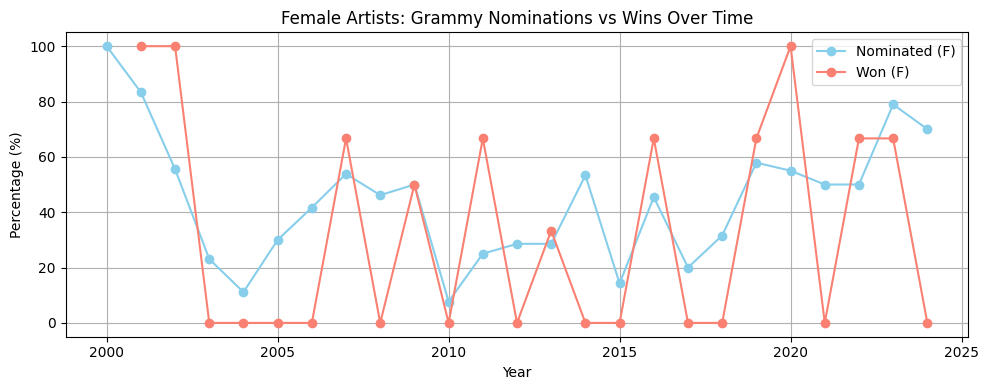

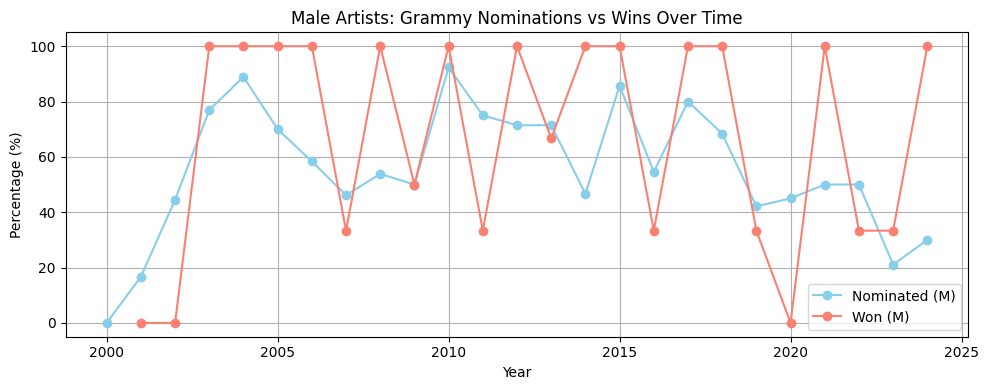

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter hanya M dan F
filtered_df = merged_ga[merged_ga['Gender'].isin(['M', 'F'])]

# ---------- Nominations ----------
nominations = filtered_df.groupby(['Year', 'Gender']).size().reset_index(name='Count')
nominations_total = nominations.groupby('Year')['Count'].transform('sum')
nominations['Percentage'] = nominations['Count'] / nominations_total * 100
nom_pivot = nominations.pivot(index='Year', columns='Gender', values='Percentage').fillna(0)

# ---------- Winners ----------
winners_df = filtered_df[filtered_df['Win'] == 1]
winners = winners_df.groupby(['Year', 'Gender']).size().reset_index(name='Count')
winners_total = winners.groupby('Year')['Count'].transform('sum')
winners['Percentage'] = winners['Count'] / winners_total * 100
win_pivot = winners.pivot(index='Year', columns='Gender', values='Percentage').fillna(0)

# ---------- Plot Female ----------
plt.figure(figsize=(10, 4))
plt.plot(nom_pivot.index, nom_pivot['F'], label='Nominated (F)', color='skyblue', marker='o')
plt.plot(win_pivot.index, win_pivot['F'], label='Won (F)', color='salmon', marker='o')
plt.title("Female Artists: Grammy Nominations vs Wins Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot Male ----------
plt.figure(figsize=(10, 4))
plt.plot(nom_pivot.index, nom_pivot['M'], label='Nominated (M)', color='skyblue', marker='o')
plt.plot(win_pivot.index, win_pivot['M'], label='Won (M)', color='salmon', marker='o')
plt.title("Male Artists: Grammy Nominations vs Wins Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

chi square gender

In [115]:
import pandas as pd
from scipy.stats import chi2_contingency

# Buat tabel kontingensi dari seluruh merged_ga
contingency = pd.crosstab(merged_ga['Gender'], merged_ga['Win'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")

Win       0   1
Gender         
F       136  20
M       160  37
Chi-square = 1.87, p-value = 0.1720


6. Who has won more times out of their total nominations? (The percentage of male win over male nominated and female win over female nominated)

        Nominated  Winners  Win Rate (%)
Gender                                  
F             156       20     12.820513
M             197       37     18.781726


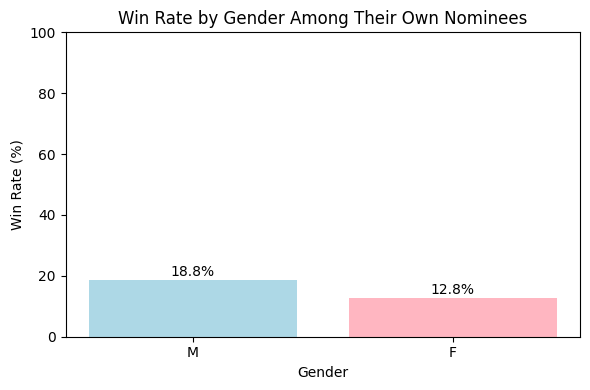

(353, 15)

In [116]:
# Ambil hanya baris yang ada gender-nya (biar aman)
df_gendered = merged_ga[merged_ga['Gender'].isin(['M', 'F'])]

# Hitung total nominasi per gender, ini ga difilter Win == 0 karena yag Win == 1 itu termasuk sebagai nominasi, jadi win song itu masuk ke nominated song, makanya dipake groupby 'Gender' aja.
total_nominated = df_gendered.groupby('Gender').size()

# Hitung total menang per gender (Win == 1)
total_winners = df_gendered[df_gendered['Win'] == 1].groupby('Gender').size()

# Gabung dan hitung persentase
gender_summary = pd.DataFrame({
    'Nominated': total_nominated,
    'Winners': total_winners
}).fillna(0)  # isi 0 kalau ada yang kosong

# Hitung win rate
gender_summary['Win Rate (%)'] = (gender_summary['Winners'] / gender_summary['Nominated']) * 100
print(gender_summary)

# Susun data dan warna
labels = ['M', 'F']
values = gender_summary.loc[labels, 'Win Rate (%)'].values
colors = ['#ADD8E6', '#FFB6C1']  # lightblue, lightpink

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Tambahkan label persentase di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Win Rate by Gender Among Their Own Nominees')
plt.xlabel('Gender')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

df_gendered.shape

7. Who win the most? Female or Male for each Grammys Categories

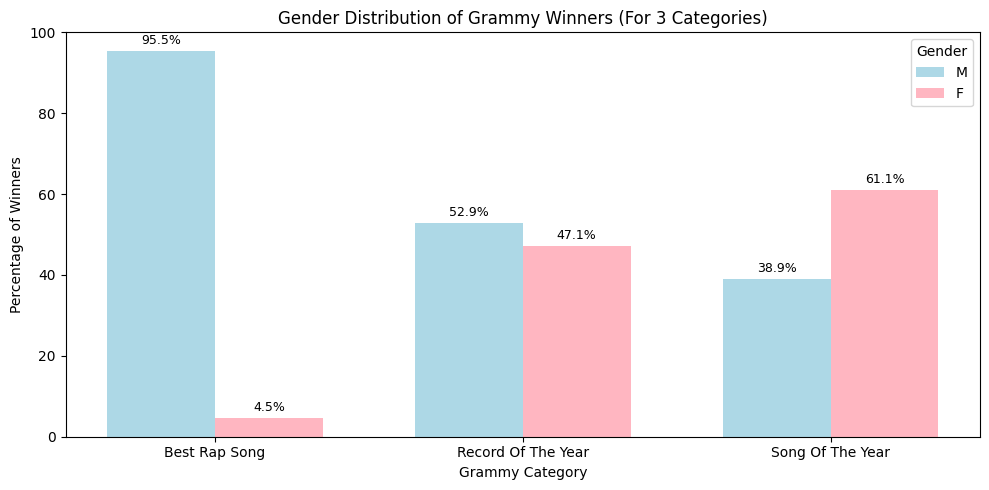

In [117]:
# Filter: hanya pemenang dan kategori utama
target_categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

winners_only = merged_ga[
    (merged_ga['Win'] == 1) &
    (merged_ga['Category'].isin(target_categories)) &
    (merged_ga['Gender'].isin(['M', 'F']))
]

# Hitung jumlah pemenang per kategori dan gender
gender_win_counts = winners_only.groupby(['Category', 'Gender']).size().reset_index(name='Count')

# Hitung total pemenang per kategori
category_totals = gender_win_counts.groupby('Category')['Count'].transform('sum')

# Hitung persentase masing-masing gender per kategori
gender_win_counts['Percentage'] = (gender_win_counts['Count'] / category_totals) * 100

# Urutkan gender & kategori
gender_win_counts['Gender'] = pd.Categorical(gender_win_counts['Gender'], categories=['M', 'F'], ordered=True)
gender_win_counts = gender_win_counts.sort_values(['Category', 'Gender'])

# Warna dan posisi
color_map = {'M': '#ADD8E6', 'F': '#FFB6C1'}
colors = gender_win_counts['Gender'].map(color_map)

categories = gender_win_counts['Category'].unique()
x = np.arange(len(categories))  # posisi untuk setiap kategori
width = 0.35  # lebar setiap bar

# Pisahkan nilai M dan F
male_percent = gender_win_counts[gender_win_counts['Gender'] == 'M']['Percentage'].values
female_percent = gender_win_counts[gender_win_counts['Gender'] == 'F']['Percentage'].values

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - width/2, male_percent, width, color='#ADD8E6', label='M')
bars2 = plt.bar(x + width/2, female_percent, width, color='#FFB6C1', label='F')

# Label di atas batang
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Axis dan legend
plt.xticks(x, categories, rotation=0)
plt.xlabel('Grammy Category')
plt.ylabel('Percentage of Winners')
plt.title('Gender Distribution of Grammy Winners (For 3 Categories)')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

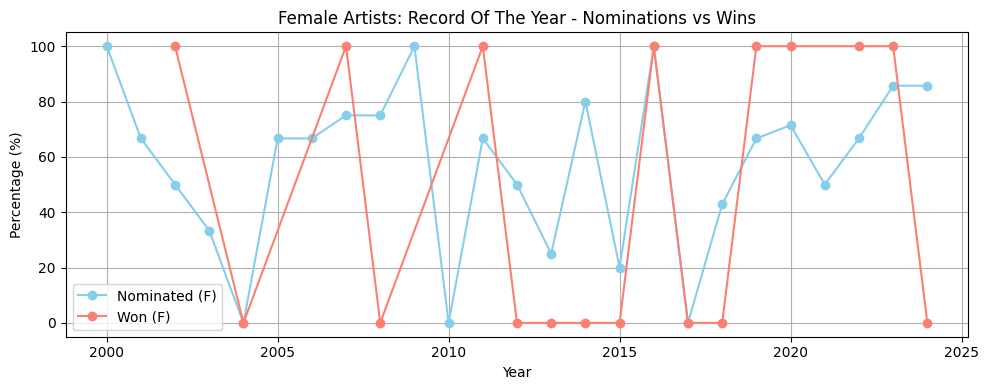

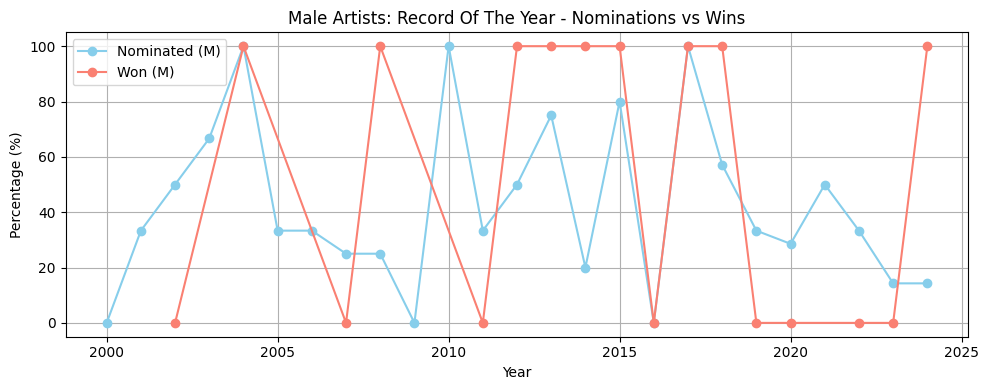

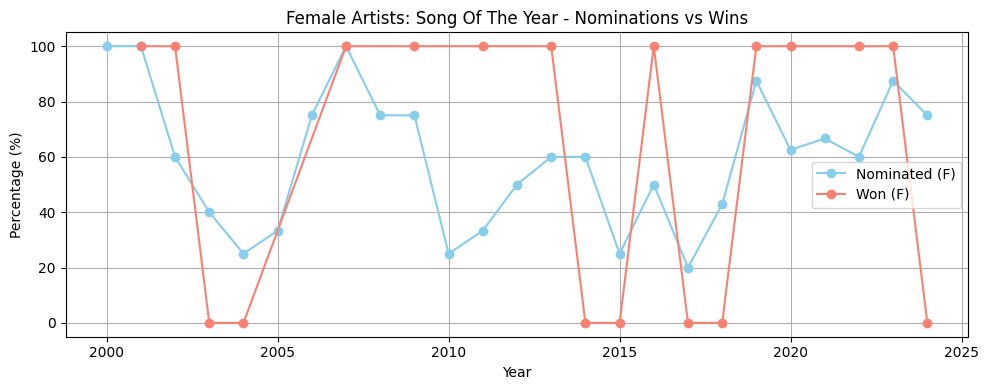

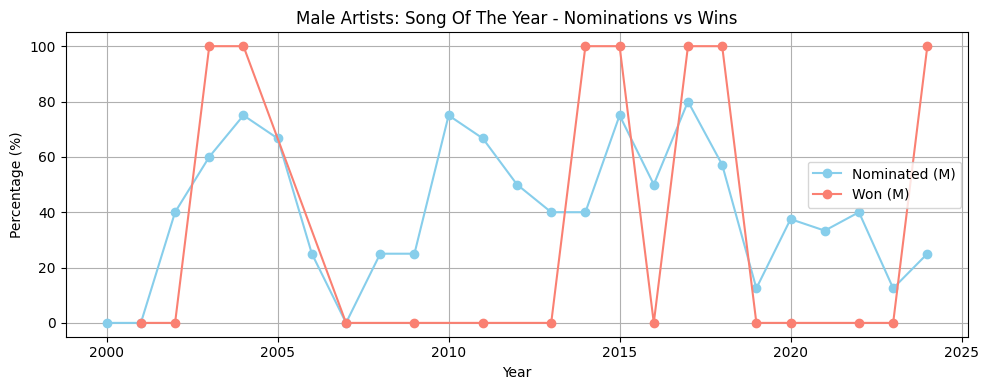

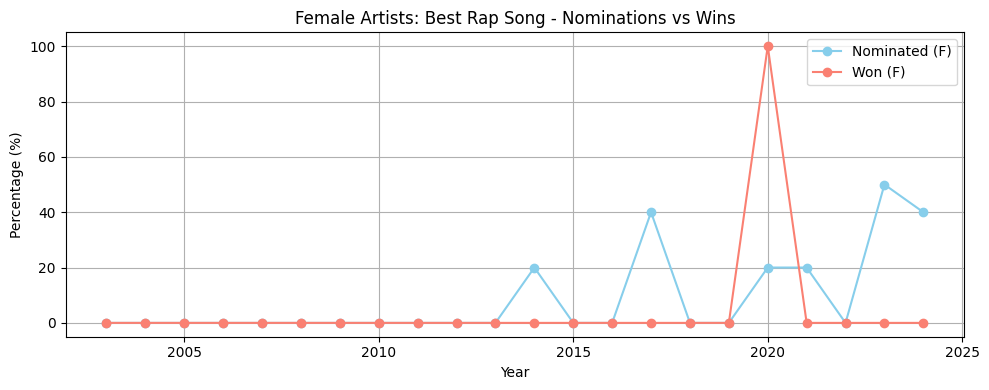

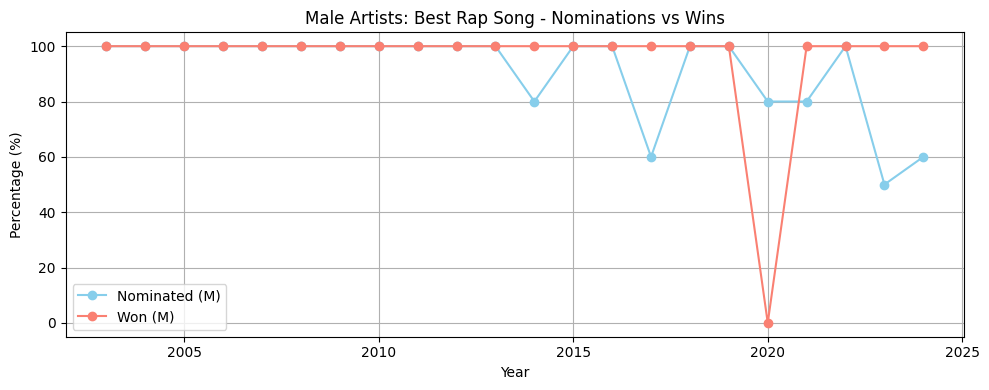

In [118]:
#Gender Distribution of Grammy Winners (For 3 Categories)

# Filter gender hanya M dan F
filtered_df = merged_ga[merged_ga['Gender'].isin(['M', 'F'])]

# Ambil daftar kategori unik
categories = filtered_df['Category'].dropna().unique()



# Loop untuk setiap kategori
for cat in categories:
    df_cat = filtered_df[filtered_df['Category'] == cat]



    # Nominations
    nominations = df_cat.groupby(['Year', 'Gender']).size().reset_index(name='Count')
    nominations_total = nominations.groupby('Year')['Count'].transform('sum')
    nominations['Percentage'] = nominations['Count'] / nominations_total * 100
    nom_pivot = nominations.pivot(index='Year', columns='Gender', values='Percentage').fillna(0)

    #  Winners
    winners_df = df_cat[df_cat['Win'] == 1]
    winners = winners_df.groupby(['Year', 'Gender']).size().reset_index(name='Count')
    winners_total = winners.groupby('Year')['Count'].transform('sum')
    winners['Percentage'] = winners['Count'] / winners_total * 100
    win_pivot = winners.pivot(index='Year', columns='Gender', values='Percentage').fillna(0)

    # Plot Female
    plt.figure(figsize=(10, 4))
    plt.plot(nom_pivot.index, nom_pivot.get('F', pd.Series(0, index=nom_pivot.index)), label='Nominated (F)', color='skyblue', marker='o')
    plt.plot(win_pivot.index, win_pivot.get('F', pd.Series(0, index=win_pivot.index)), label='Won (F)', color='salmon', marker='o')
    plt.title(f"Female Artists: {cat} - Nominations vs Wins")
    plt.xlabel("Year")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---------- Plot Male ----------
    plt.figure(figsize=(10, 4))
    plt.plot(nom_pivot.index, nom_pivot.get('M', pd.Series(0, index=nom_pivot.index)), label='Nominated (M)', color='skyblue', marker='o')
    plt.plot(win_pivot.index, win_pivot.get('M', pd.Series(0, index=win_pivot.index)), label='Won (M)', color='salmon', marker='o')
    plt.title(f"Male Artists: {cat} - Nominations vs Wins")
    plt.xlabel("Year")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

8. Win Rate Gender untuk setiap Category Grammy

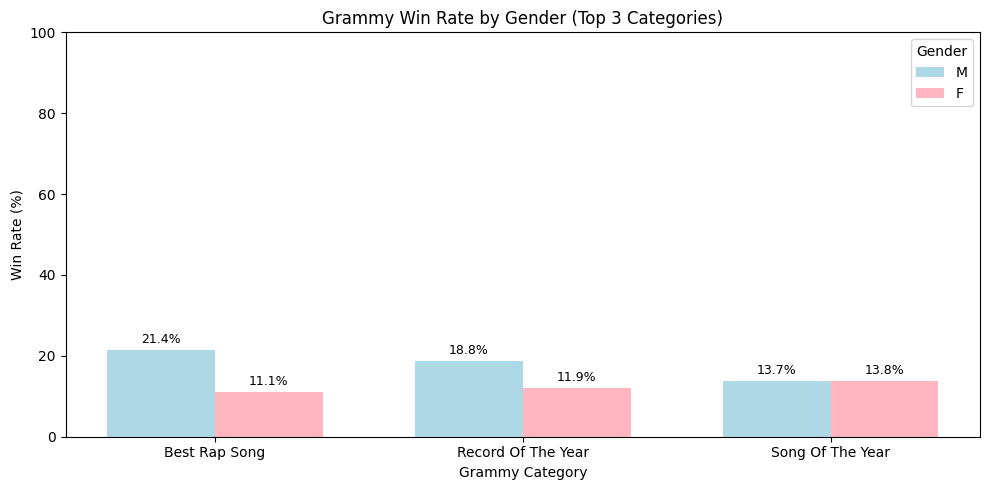

In [119]:
# Pilih kategori utama
target_categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

# Filter data relevan
df_filtered = merged_ga[
    (merged_ga['Category'].isin(target_categories)) &
    (merged_ga['Gender'].isin(['M', 'F']))
]

# Hitung nominasi dan kemenangan
nominated = df_filtered.groupby(['Category', 'Gender']).size().rename('Nominated')

winners = df_filtered[df_filtered['Win'] == 1].groupby(['Category', 'Gender']).size().rename('Winners')

# Gabungkan & hitung win rate
summary = pd.concat([nominated, winners], axis=1).fillna(0)

summary['Win Rate (%)'] = (summary['Winners'] / summary['Nominated']) * 100
summary = summary.reset_index()

# Urutan kategori & gender
category_order = ['Best Rap Song', 'Record Of The Year', 'Song Of The Year']
summary['Category'] = pd.Categorical(summary['Category'], categories=category_order, ordered=True)
summary['Gender'] = pd.Categorical(summary['Gender'], categories=['M', 'F'], ordered=True)
summary = summary.sort_values(['Category', 'Gender'])

# Ambil data
categories = summary['Category'].unique()
x = np.arange(len(categories))  # posisi x
width = 0.35  # lebar bar

# Pisahkan nilai per gender
male_vals = summary[summary['Gender'] == 'M']['Win Rate (%)'].values
female_vals = summary[summary['Gender'] == 'F']['Win Rate (%)'].values

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - width/2, male_vals, width, color='#ADD8E6', label='M')
bars2 = plt.bar(x + width/2, female_vals, width, color='#FFB6C1', label='F')

# Tambahkan label
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                height + 1,
                f'{height:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Axis & legend
plt.xticks(x, categories)
plt.xlabel('Grammy Category')
plt.ylabel('Win Rate (%)')
plt.title('Grammy Win Rate by Gender (Top 3 Categories)')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

9. What are the age categories that dominate the grammy nominations ? the grammy wins ?

In [120]:
# --- Persentase Nominasi per Kategori Usia ---
nomination_counts = merged_ga['Age Category'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(nomination_counts.index, nomination_counts.values, color='skyblue')
plt.title('Percentage of Grammy Nominations by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Nominations')

# Tambahkan label di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# --- Persentase Kemenangan per Kategori Usia ---
winners = merged_ga[merged_ga['Win'] == 1]
win_counts = winners['Age Category'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(win_counts.index, win_counts.values, color='lightgreen')
plt.title('c')
plt.title('Percentage of Grammy Winners by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Wins')

# Tambahkan label di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}%", ha='center')

plt.tight_layout()
plt.show()

KeyError: 'Age Category'

chi square age

In [121]:
# Hitung total per kategori usia
age_counts = merged_ga['Age Category'].value_counts()
# Pilih hanya kategori yang punya total >= 5
valid_ages = age_counts[age_counts >= 5].index

# Filter dataframe ke kategori usia yang cukup data
filtered = merged_ga[merged_ga['Age Category'].isin(valid_ages)]

# Buat ulang tabel kontingensi
contingency = pd.crosstab(filtered['Age Category'], filtered['Win'])

# Jalankan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency)
print(contingency)
print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")

KeyError: 'Age Category'

BENERIN AGE

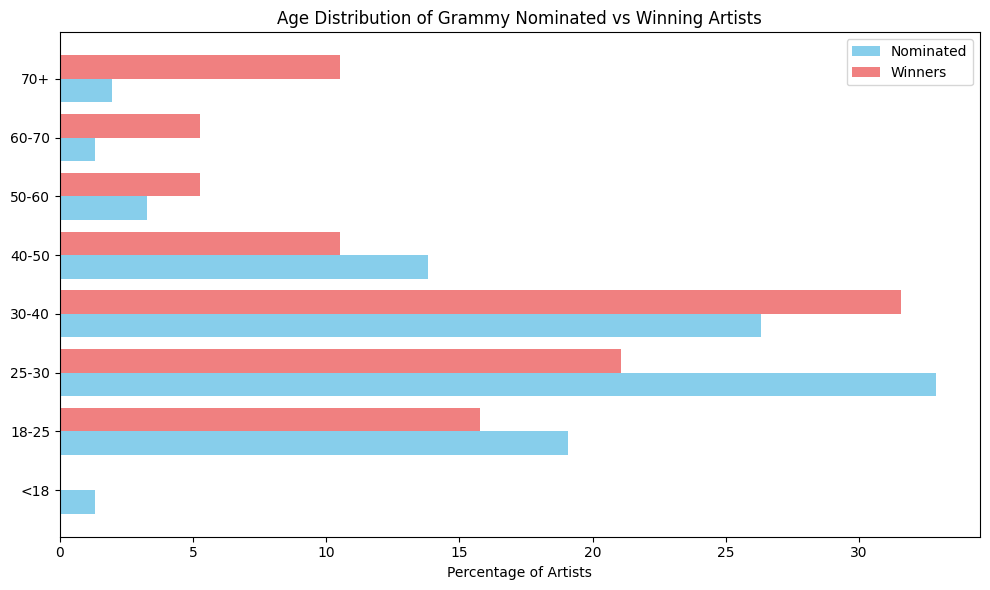

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Merge Grammy data with artist info
grammy_df = pd.merge(
    grammys_df,
    artists_df[['ArtistID', 'Birth Date']],
    on='ArtistID',
    how='left'
)

# Step 2: Convert Birth Date to datetime
grammy_df['Birth Date'] = pd.to_datetime(grammy_df['Birth Date'], errors='coerce')

# Step 3: Hitung umur saat Grammy
grammy_df = grammy_df.dropna(subset=['Birth Date', 'Year'])
grammy_df['Age'] = grammy_df['Year'] - grammy_df['Birth Date'].dt.year

# Step 4: Buat Age Category
age_bins = [0, 18, 25, 30, 40, 50, 60, 70, 100]
age_labels = ['<18', '18-25', '25-30', '30-40', '40-50', '50-60', '60-70', '70+']
grammy_df['Age Category'] = pd.cut(grammy_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 5: Remove duplicates (per ArtistID per year)
grammy_df_unique = grammy_df.drop_duplicates(subset=['ArtistID'])

# Step 6: Pisahkan nominated dan winners
nominated_df = grammy_df_unique
winners_df = grammy_df_unique[grammy_df_unique['Win'] == 1]

# Step 7: Hitung distribusi per Age Category
nom_counts = nominated_df['Age Category'].value_counts(normalize=True).sort_index() * 100
win_counts = winners_df['Age Category'].value_counts(normalize=True).sort_index() * 100

# Step 8: Plot side-by-side horizontal bar chart
import numpy as np

age_labels = ['<18', '18-25', '25-30', '30-40', '40-50', '50-60', '60-70', '70+']
y = np.arange(len(age_labels))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.barh(y - bar_width/2, nom_counts.reindex(age_labels).fillna(0), height=bar_width, label='Nominated', color='skyblue')
plt.barh(y + bar_width/2, win_counts.reindex(age_labels).fillna(0), height=bar_width, label='Winners', color='lightcoral')

plt.yticks(y, age_labels)
plt.xlabel('Percentage of Artists')
plt.title('Age Distribution of Grammy Nominated vs Winning Artists')
plt.legend()
plt.tight_layout()
plt.show()

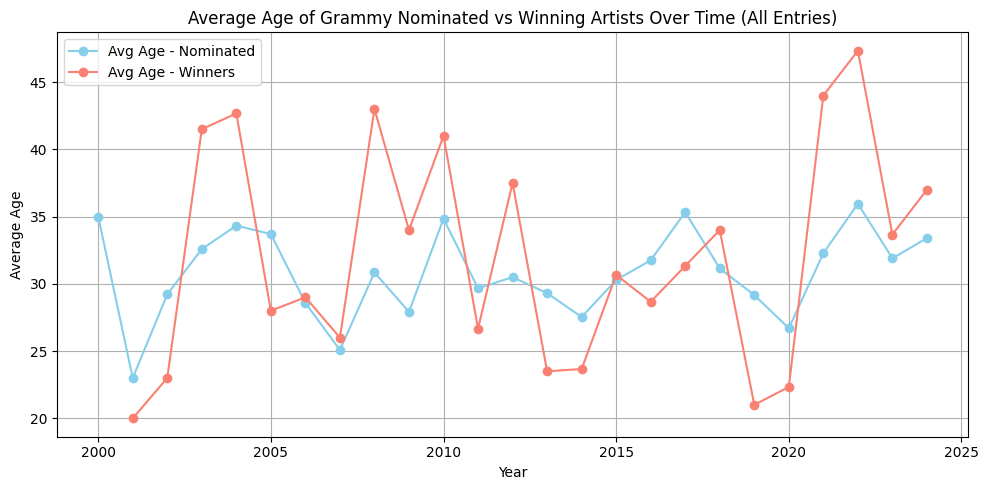

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Merge Grammy data with artist birth date
grammy_df = pd.merge(
    grammys_df,
    artists_df[['ArtistID', 'Birth Date']],
    on='ArtistID',
    how='left'
)

# Step 2: Format Birth Date
grammy_df['Birth Date'] = pd.to_datetime(grammy_df['Birth Date'], errors='coerce')
grammy_df = grammy_df.dropna(subset=['Birth Date', 'Year'])

# Step 3: Hitung usia saat Grammy
grammy_df['Age'] = grammy_df['Year'] - grammy_df['Birth Date'].dt.year

# Step 4: Rata-rata usia nominee per tahun (semua entri, tanpa hapus duplikat)
avg_nominee_age = grammy_df.groupby('Year')['Age'].mean().reset_index(name='Avg_Nominee_Age')

# Step 5: Rata-rata usia pemenang per tahun
avg_winner_age = grammy_df[grammy_df['Win'] == 1].groupby('Year')['Age'].mean().reset_index(name='Avg_Winner_Age')

# Step 6: Gabungkan & urutkan
age_trend_df = pd.merge(avg_nominee_age, avg_winner_age, on='Year', how='outer').sort_values('Year')

# Step 7: Interpolasi agar garis tidak putus
age_trend_df[['Avg_Nominee_Age', 'Avg_Winner_Age']] = age_trend_df[['Avg_Nominee_Age', 'Avg_Winner_Age']].interpolate()

# Step 8: Plot grafik
plt.figure(figsize=(10, 5))
plt.plot(age_trend_df['Year'], age_trend_df['Avg_Nominee_Age'], label='Avg Age - Nominated', color='skyblue', marker='o')
plt.plot(age_trend_df['Year'], age_trend_df['Avg_Winner_Age'], label='Avg Age - Winners', color='salmon', marker='o')

plt.title("Average Age of Grammy Nominated vs Winning Artists Over Time (All Entries)")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
grammy_df.count()

Grammy                   352
Year                     352
Category                 352
Main Artist              352
Artist                   352
Cleaned Song or Album    352
Song or Album            352
Win                      352
Cleaned Main Artist      352
Wiki URL                 350
ArtistID                 352
Song ID                  352
Birth Date               352
Age                      352
dtype: int64

10. Look at the “new artist” category. Is there anything to deduce here for the age? Are new artists more likely to be young or old?

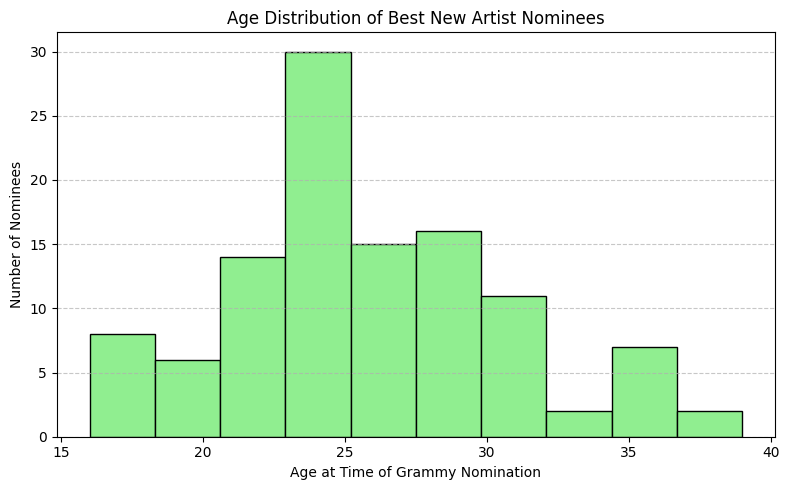

In [81]:
#Normalisasi sebelum merge biar gak ada masalah
grammys_5_df['ArtistID'] = grammys_5_df['ArtistID'].astype(str).str.strip().str.upper()

artists_df['ArtistID'] = artists_df['ArtistID'].astype(str).str.strip().str.upper()

#Merging SongID and Artist ID from Songs Data and Grammys Data
merged_ga_5 = pd.merge(grammys_5_df, artists_df[['ArtistID', 'Birth Date','Gender', 'US State']], on='ArtistID', how='left')


# --- Step 1: Filter hanya kategori Best New Artist dan data umur valid ---
df_new_artist = merged_ga_5[
    (merged_ga_5['Category'].str.lower() == 'best new artist') &
    (merged_ga_5['Birth Date'].notna())
].copy()

# --- Step 2: Hitung umur saat Grammy (dari Birth Date dan Year) ---
df_new_artist['Birth Date'] = pd.to_datetime(df_new_artist['Birth Date'], errors='coerce')

df_new_artist['Age at Grammy'] = df_new_artist['Year'] - df_new_artist['Birth Date'].dt.year

# --- Step 3: Visualisasi sebaran usia ---
plt.figure(figsize=(8, 5))
plt.hist(df_new_artist['Age at Grammy'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Age Distribution of Best New Artist Nominees")
plt.xlabel("Age at Time of Grammy Nomination")
plt.ylabel("Number of Nominees")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Step 4: Lihat statistik ringkas (optional) ---
# print(df_new_artist['Age at Grammy'].describe())


11. Who dominate 'Best New Artist', man or women?

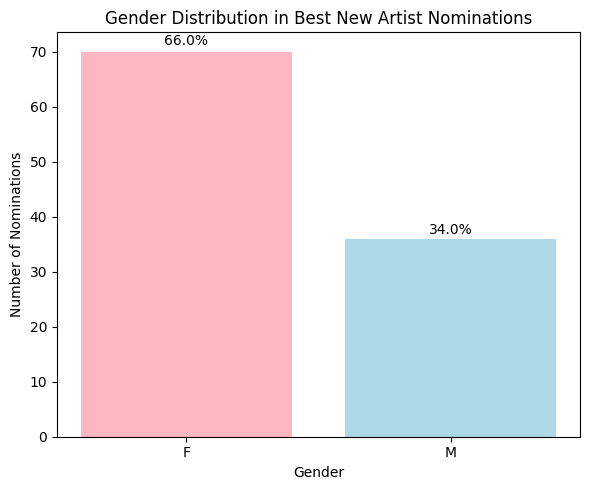

In [82]:
# Step 1: Filter hanya kategori Best New Artist dan gender valid
df_new_artist = merged_ga_5[
    (merged_ga_5['Category'].str.lower() == 'best new artist') &
    (merged_ga_5['Gender'].isin(['M', 'F']))
].copy()

# Step 2: Hitung jumlah nominasi per gender
gender_counts = df_new_artist['Gender'].value_counts().sort_index()
total = gender_counts.sum()

# Step 3: Buat warna biar konsisten
colors = {'M': 'lightblue', 'F': 'lightpink'}
bar_colors = [colors[g] for g in gender_counts.index]

# Step 4: Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(gender_counts.index, gender_counts.values, color=bar_colors)

plt.title("Gender Distribution in Best New Artist Nominations")
plt.xlabel("Gender")
plt.ylabel("Number of Nominations")

# Tambahkan persentase di atas batang
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Chi-Square Goodness-of-Fit Test
: to check whether the distribution of a variable conforms to a certain expected distribution

Examples:

Is the number of Genders in the Best New Artist nominations balanced?

Does the frequency of a particular color, type, or category conform to expectations?

In [83]:
#tapi kayanya ga berguna
from scipy.stats import chisquare

# Ambil jumlah aktual
observed = gender_counts.values

# Hitung expected value: asumsi proporsi sama
expected = [sum(observed) / 2] * 2

# Jalankan uji chi-square
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")

Chi-square = 10.91, p-value = 0.0010


12. Who dominate the Winner of "Best New Artist", men or women?

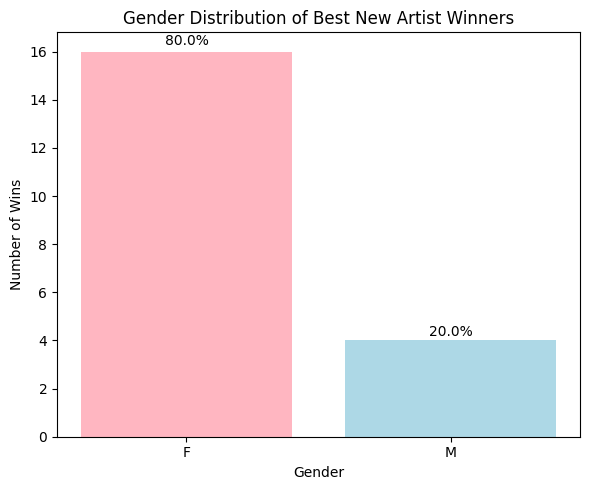

In [84]:
# Step 1: Filter hanya kategori Best New Artist, gender valid, dan pemenang
df_new_artist_winners = merged_ga_5[
    (merged_ga_5['Category'].str.lower() == 'best new artist') &
    (merged_ga_5['Gender'].isin(['M', 'F'])) &
    (merged_ga_5['Win'] == 1)
].copy()

# Step 2: Hitung jumlah pemenang per gender
gender_win_counts = df_new_artist_winners['Gender'].value_counts().sort_index()
total = gender_win_counts.sum()

# Step 3: Warna
colors = {'M': 'lightblue', 'F': 'lightpink'}
bar_colors = [colors[g] for g in gender_win_counts.index]

# Step 4: Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(gender_win_counts.index, gender_win_counts.values, color=bar_colors)

plt.title("Gender Distribution of Best New Artist Winners")
plt.xlabel("Gender")
plt.ylabel("Number of Wins")

# Tambahkan persentase
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

13. Throughout the years, are we nominating younger and younger artists for this category ? or not at all ? (5 category)

<ipython-input-85-86a33b3fb584>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Age at Grammy'] = df_age['Year'] - df_age['Birth Date'].dt.year
<ipython-input-85-86a33b3fb584>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Win Label'] = df_age['Win'].map({0: 'Nominated', 1: 'Winner'})


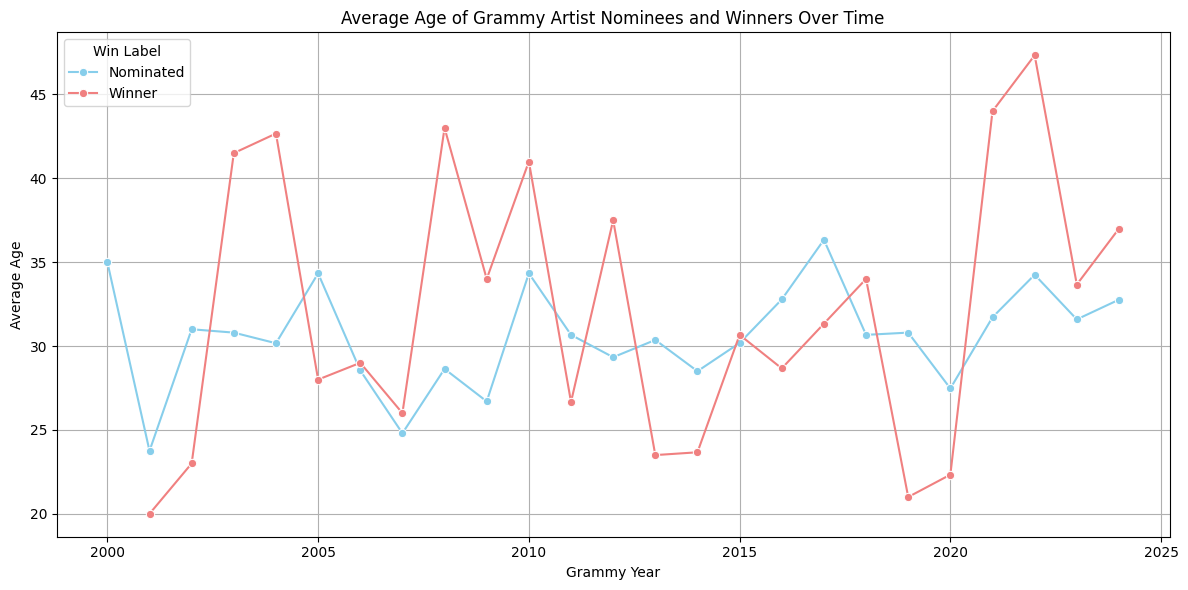

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Siapkan data ---
df_age = merged_ga.copy()
df_age['Birth Date'] = pd.to_datetime(df_age['Birth Date'], errors='coerce')
df_age = df_age.dropna(subset=['Birth Date', 'Year'])

# Hitung umur saat Grammy
df_age['Age at Grammy'] = df_age['Year'] - df_age['Birth Date'].dt.year

# Buat label winner/nominated
df_age['Win Label'] = df_age['Win'].map({0: 'Nominated', 1: 'Winner'})

# --- Step 2: Hitung rata-rata umur per tahun dan label menang ---
age_trend = df_age.groupby(['Year', 'Win Label'])['Age at Grammy'].mean().reset_index()

# --- Step 3: Plot line plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_trend, x='Year', y='Age at Grammy', hue='Win Label', marker='o', palette={'Winner': 'lightcoral', 'Nominated': 'skyblue'})

plt.title('Average Age of Grammy Artist Nominees and Winners Over Time')
plt.xlabel('Grammy Year')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


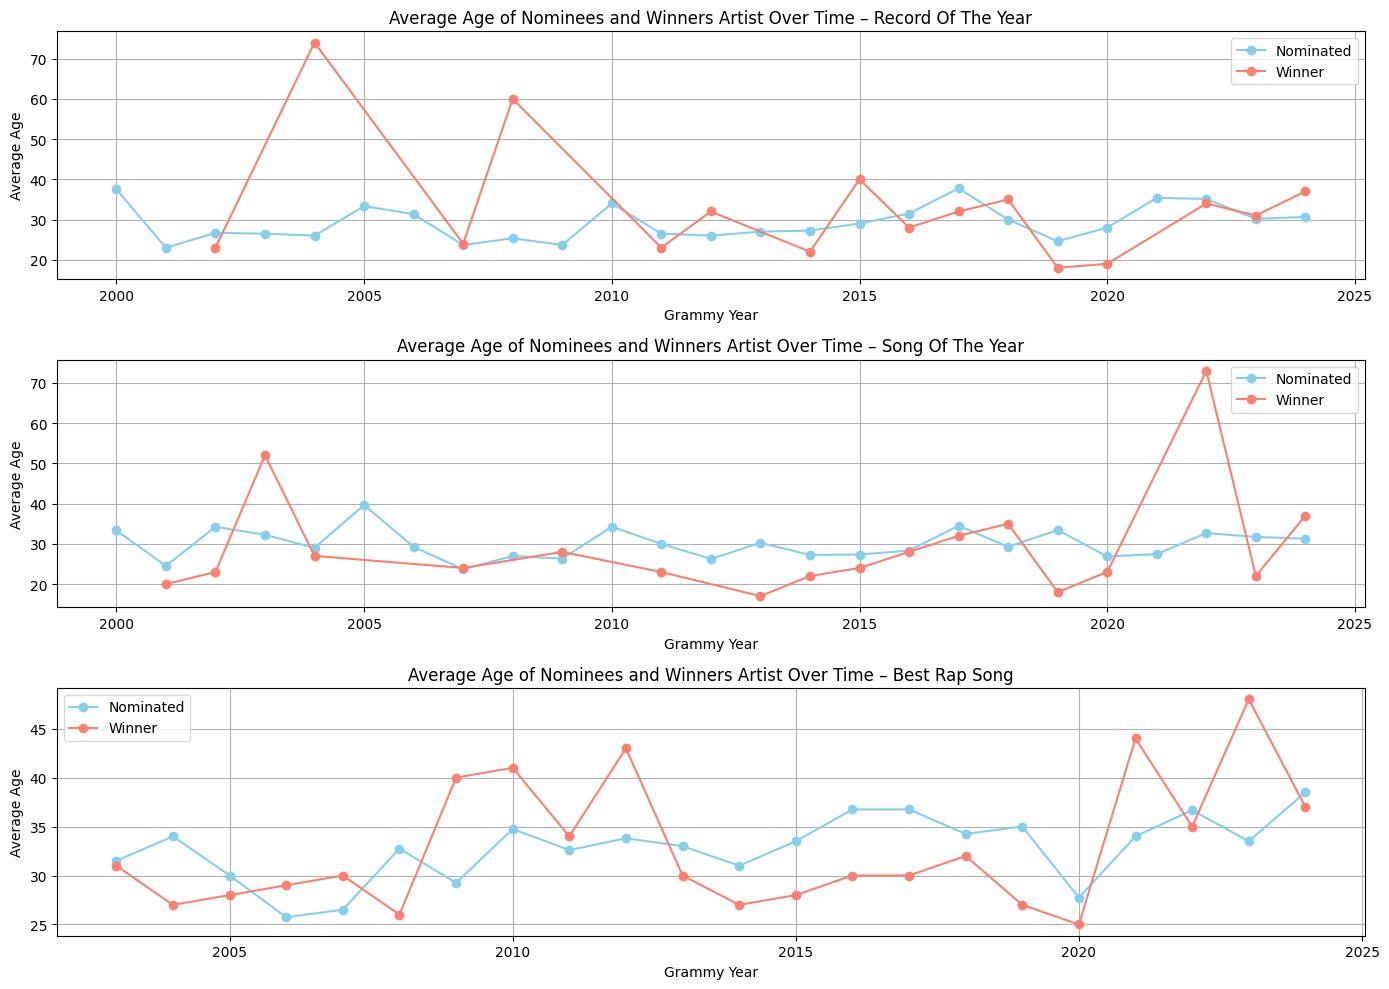

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Pilih kategori yang mau dianalisis ---
target_categories = ['Record Of The Year', 'Song Of The Year', 'Best Rap Song']

# --- Step 2: Filter data & hitung umur saat Grammy ---
df_category = merged_ga[
    (merged_ga['Category'].isin(target_categories)) &
    (merged_ga['Birth Date'].notna())
].copy()

df_category['Birth Date'] = pd.to_datetime(df_category['Birth Date'], errors='coerce')
df_category = df_category[df_category['Birth Date'].notna()]
df_category['Age at Grammy'] = df_category['Year'] - df_category['Birth Date'].dt.year
df_category['Win Label'] = df_category['Win'].map({0: 'Nominated', 1: 'Winner'})

# --- Step 3: Hitung rata-rata umur per kategori, tahun, dan status menang ---
age_trend = df_category.groupby(['Year', 'Category', 'Win Label'])['Age at Grammy'].mean().reset_index()

# --- Step 4: Buat plot per kategori ---
plt.figure(figsize=(14, 10))

# Manual color map untuk label
color_map = {'Winner': 'salmon', 'Nominated': 'skyblue'}

for i, category in enumerate(target_categories):
    plt.subplot(3, 1, i + 1)
    subset = age_trend[age_trend['Category'] == category]

    for label, group in subset.groupby('Win Label'):
        plt.plot(
            group['Year'], group['Age at Grammy'],
            marker='o',
            label=label,
            color=color_map.get(label, 'gray')
        )

    plt.title(f"Average Age of Nominees and Winners Artist Over Time – {category}")
    plt.xlabel("Grammy Year")
    plt.ylabel("Average Age")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

SONG FEATURES HOT 100 BILBOARD

1. Merged 100 Hot Data and Song Data

In [87]:
#Normalisasi sebelum merge biar gak ada masalah
hot_df['Song ID'] = hot_df['Song ID'].astype(str).str.strip()
songs_df['Song ID'] = songs_df['Song ID'].astype(str).str.strip()
grammys_df['Song ID'] = songs_df['Song ID'].astype(str).str.strip()

#Merging SongID and Artist ID from Songs Data and Grammys Data
merged_sh = pd.merge(hot_df, songs_df[['Song ID','Genre', 'Tempo', 'Loudness']], on='Song ID', how='left')

merged_shg = pd.merge(merged_sh, grammys_df[['Song ID', 'Win', 'Category']], on='Song ID', how='left')

# merged_shg.head(500)

In [88]:
hot_df['Song ID'].isin(grammys_df['Song ID']).value_counts()

Song ID
False    130332
True       5468
Name: count, dtype: int64

In [89]:
merged_shg['Win'].isna().sum()

np.int64(130332)

2. What are the Tempo and Loudness tendencies of songs on the Billboard Hot 100?

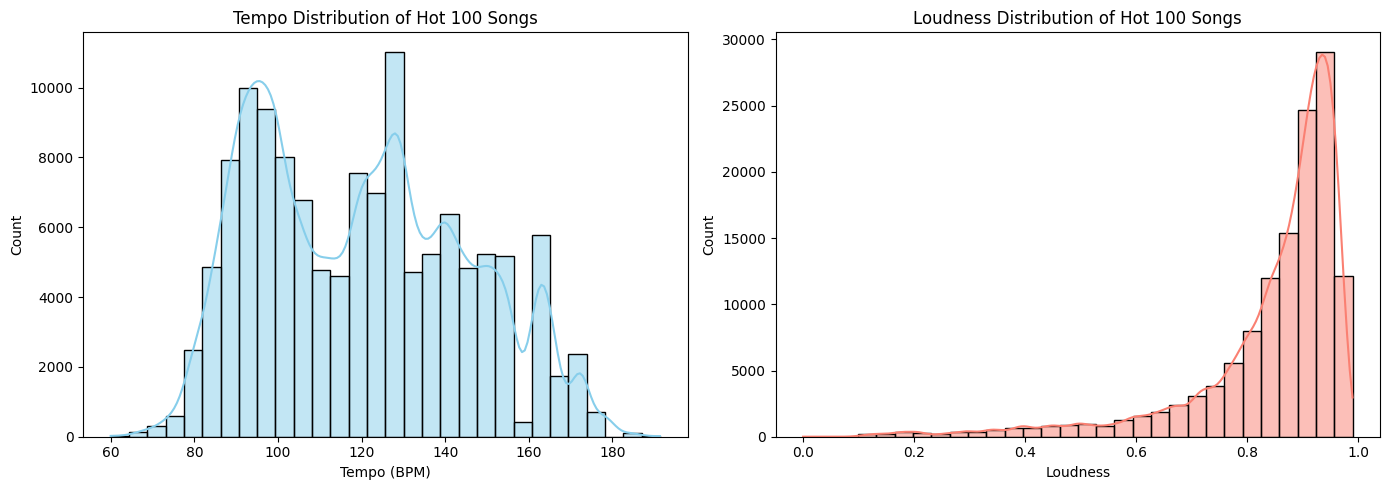

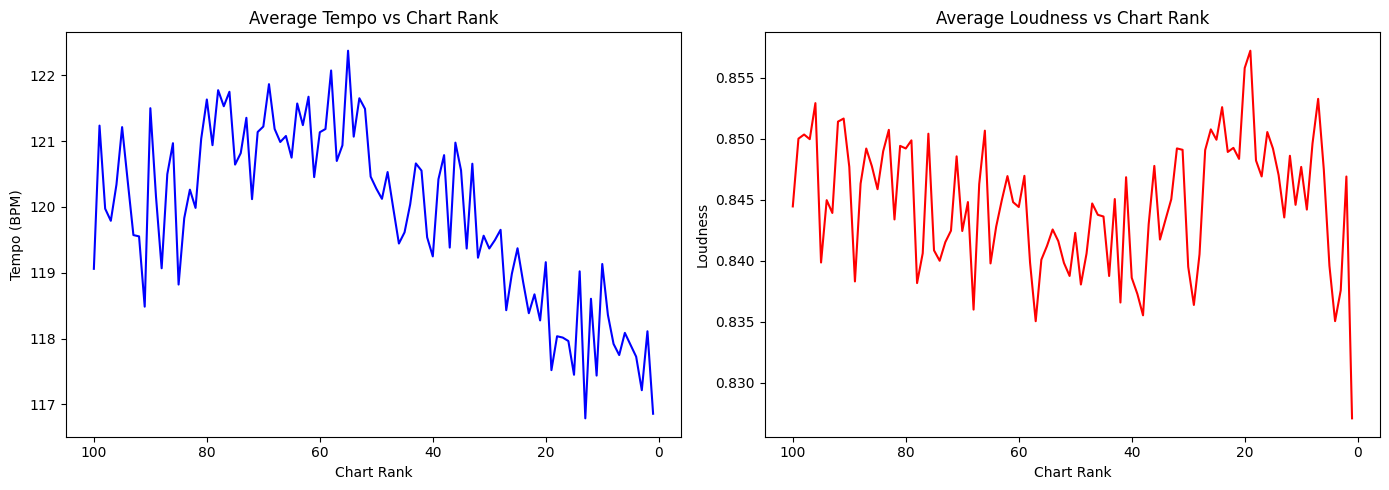

In [90]:
# 1. Histogram distribusi umum Tempo dan Loudness
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_shg['Tempo'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Tempo Distribution of Hot 100 Songs')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(merged_shg['Loudness'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Loudness Distribution of Hot 100 Songs')
plt.xlabel('Loudness')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Rata-rata Tempo & Loudness terhadap Rank
avg_stats = merged_shg.groupby('Rank')[['Tempo', 'Loudness']].mean().reset_index()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=avg_stats, x='Rank', y='Tempo', color='blue')
plt.title('Average Tempo vs Chart Rank')
plt.xlabel('Chart Rank')
plt.ylabel('Tempo (BPM)')
plt.gca().invert_xaxis()  # supaya Rank #1 di kiri

plt.subplot(1, 2, 2)
sns.lineplot(data=avg_stats, x='Rank', y='Loudness', color='red')
plt.title('Average Loudness vs Chart Rank')
plt.xlabel('Chart Rank')
plt.ylabel('Loudness')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

3. Per year: does the tempo/loudness change over time?

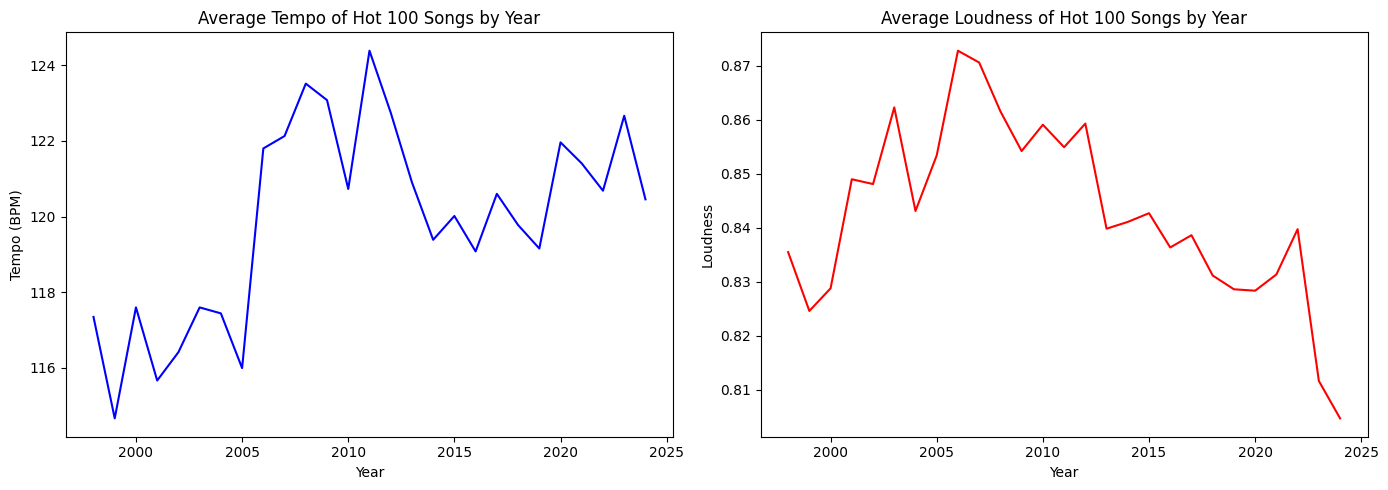

In [91]:
# Pastikan kolom charting week dalam format datetime
merged_shg['Charting Week'] = pd.to_datetime(merged_shg['Charting Week'], errors='coerce')

# Buat kolom tahun
merged_shg['Year'] = merged_shg['Charting Week'].dt.year

# Hitung rata-rata Tempo & Loudness per tahun
yearly_stats = merged_shg.groupby('Year')[['Tempo', 'Loudness']].mean().reset_index()

# Buat plot
plt.figure(figsize=(14, 5))

# --- Plot Tempo ---
plt.subplot(1, 2, 1)
sns.lineplot(data=yearly_stats, x='Year', y='Tempo', color='blue')
plt.title('Average Tempo of Hot 100 Songs by Year')
plt.xlabel('Year')
plt.ylabel('Tempo (BPM)')

# --- Plot Loudness ---
plt.subplot(1, 2, 2)
sns.lineplot(data=yearly_stats, x='Year', y='Loudness', color='red')
plt.title('Average Loudness of Hot 100 Songs by Year')
plt.xlabel('Year')
plt.ylabel('Loudness')

plt.tight_layout()
plt.show()

4. The genre that appears most frequently on the Billboard Hot 100

<ipython-input-92-145049014287>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')


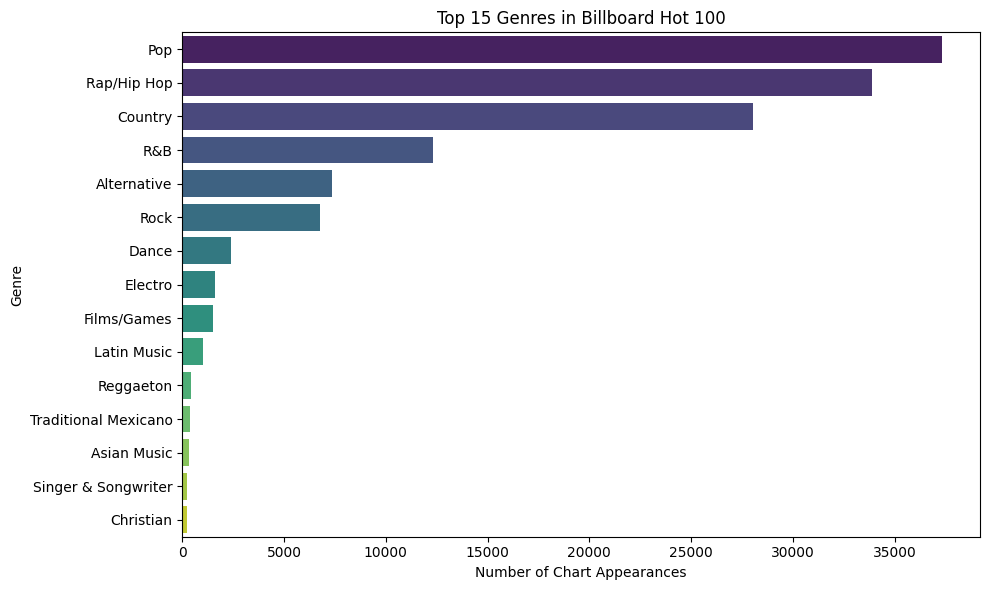

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah lagu per genre
genre_counts = merged_shg['Genre'].value_counts().head(15)  # ambil top 15 genre teratas

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 15 Genres in Billboard Hot 100')
plt.xlabel('Number of Chart Appearances')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

5. Do certain genres tend to appear in higher chart positions (better Rank)?

<ipython-input-93-4c1e6a838f58>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rank.values, y=genre_rank.index, palette='coolwarm_r')


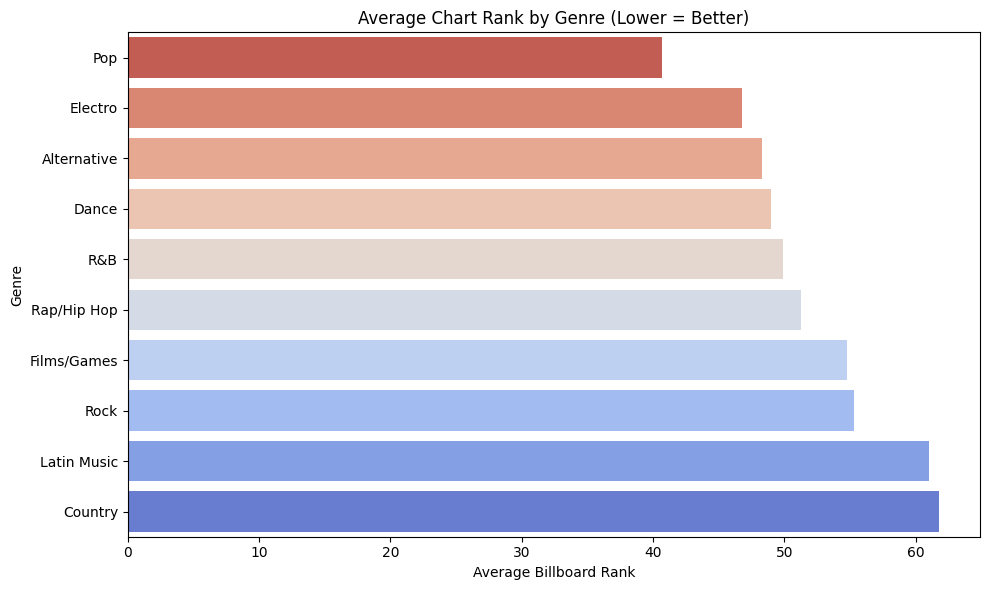

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter: hanya genre yang muncul cukup sering (biar gak terlalu noise)
genre_counts = merged_shg['Genre'].value_counts()
popular_genres = genre_counts[genre_counts > 1000].index  # threshold: genre muncul > 1000 kali

# Ambil rata-rata posisi chart untuk genre-genre populer
genre_rank = (
    merged_shg[merged_shg['Genre'].isin(popular_genres)]
    .groupby('Genre')['Rank']
    .mean()
    .sort_values()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_rank.values, y=genre_rank.index, palette='coolwarm_r')
plt.title('Average Chart Rank by Genre (Lower = Better)')
plt.xlabel('Average Billboard Rank')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

6. How many unique artists of each gender appear on Billboard?

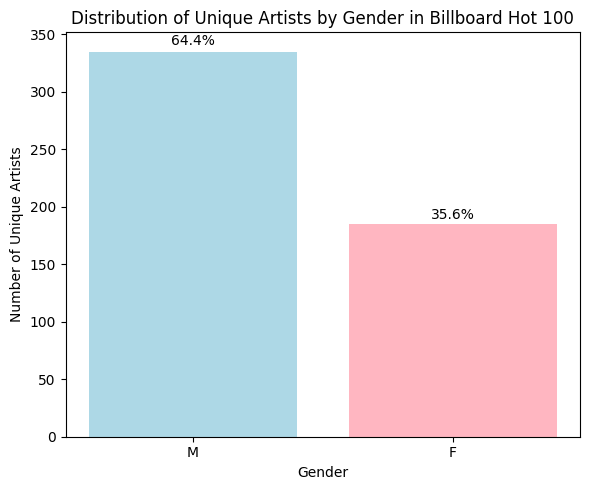

In [94]:
#Normalisasi sebelum merge biar gak ada masalah
hot_df['ArtistID'] = hot_df['ArtistID'].astype(str).str.strip()
artists_df['ArtistID'] = songs_df['ArtistID'].astype(str).str.strip()


# Ambil hanya ArtistID unik dari merged data
unique_artists_in_hot100 = hot_df[['ArtistID']].drop_duplicates()

# Ambil hanya baris unik per artist
artists_unique = artists_df[['ArtistID', 'Gender', 'US State']].drop_duplicates(subset='ArtistID')

#Merging SongID and Artist ID from Songs Data and Grammys Data
merged_ha = pd.merge(unique_artists_in_hot100, artists_unique[['ArtistID', 'Gender', 'US State']], on='ArtistID', how='left')

# Hitung jumlah artis per gender
gender_counts = merged_ha['Gender'].value_counts()
total = gender_counts.sum()

# Susun warna biar konsisten
colors = {
    'M': 'lightblue',
    'F': 'lightpink',
    'Other': 'lightgrey'
}

# Urutkan label (kalau tidak semua ada di data, filter dulu)
labels = [g for g in ['M', 'F', 'Other'] if g in gender_counts.index]
counts = [gender_counts[g] for g in labels]
bar_colors = [colors[g] for g in labels]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, counts, color=bar_colors)
plt.title("Distribution of Unique Artists by Gender in Billboard Hot 100")
plt.xlabel("Gender")
plt.ylabel("Number of Unique Artists")

# Tambahkan persentase
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


7. Number of artist appearances on Billboard Hot 100 by gender (sesuai charting jadi data hot100 nggak dihapus diplicatnya)

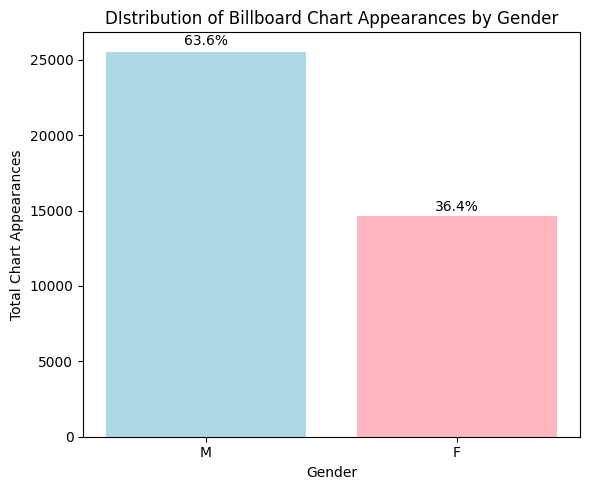

In [95]:
import matplotlib.pyplot as plt

# Normalisasi ArtistID sebelum merge
hot_df['ArtistID'] = hot_df['ArtistID'].astype(str).str.strip()
artists_df['ArtistID'] = songs_df['ArtistID'].astype(str).str.strip()

# Ambil info gender dari artist
artists_info = artists_df[['ArtistID', 'Gender', 'US State']].drop_duplicates(subset='ArtistID')

# Merge hot100 dan artist info (TANPA drop_duplicates → karena kita hitung semua kemunculan)
merged_all = pd.merge(hot_df, artists_info, on='ArtistID', how='left')

# Hitung jumlah kemunculan berdasarkan gender
gender_counts = merged_all['Gender'].value_counts()
total = gender_counts.sum()

# Atur warna
colors = {
    'M': 'lightblue',
    'F': 'lightpink',
    'Other': 'lightgrey'
}

# Urutkan label (pastikan hanya yang muncul di data)
labels = [g for g in ['M', 'F', 'Other'] if g in gender_counts.index]
counts = [gender_counts[g] for g in labels]
bar_colors = [colors[g] for g in labels]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, counts, color=bar_colors)
plt.title("DIstribution of Billboard Chart Appearances by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Chart Appearances")

# Tambahkan persentase di atas batang
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

8. Who stays longer on the chart by gender?

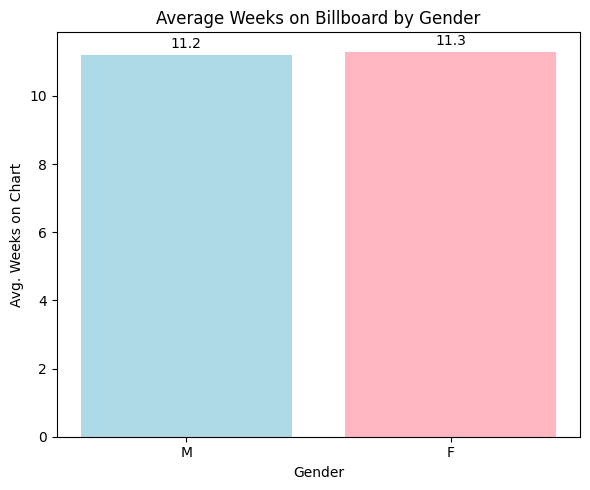

In [96]:
import matplotlib.pyplot as plt

# Normalisasi ArtistID
hot_df['ArtistID'] = hot_df['ArtistID'].astype(str).str.strip()
artists_df['ArtistID'] = songs_df['ArtistID'].astype(str).str.strip()

# Ambil info gender dari artist
artists_info = artists_df[['ArtistID', 'Gender']].drop_duplicates(subset='ArtistID')

# Merge billboard dengan artist
merged = pd.merge(hot_df, artists_info, on='ArtistID', how='left')

# Hitung rata-rata weeks on chart per gender
avg_weeks = merged.groupby('Gender')['Weeks on Chart'].mean().round(1)
total = avg_weeks.sum()

# Warna dan urutan
colors = {'M': 'lightblue', 'F': 'lightpink', 'Other': 'lightgrey'}
labels = [g for g in ['M', 'F', 'Other'] if g in avg_weeks.index]
values = [avg_weeks[g] for g in labels]
bar_colors = [colors[g] for g in labels]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=bar_colors)
plt.title("Average Weeks on Billboard by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Weeks on Chart")

# Label angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.01,
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

9. Peak performance: Who is more often in the top ranks?

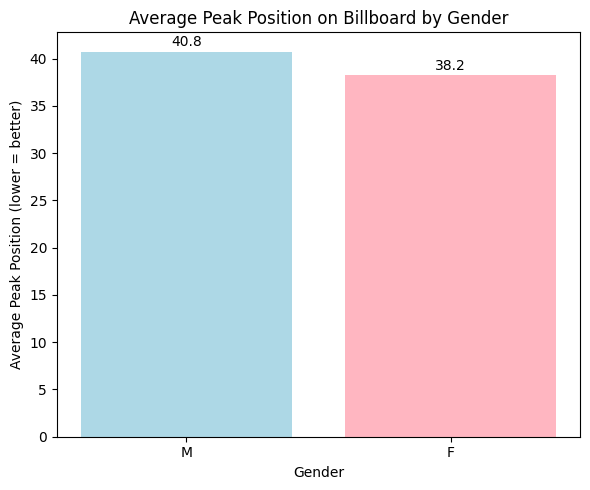

In [97]:
# Normalisasi ArtistID sebelum merge
hot_df['ArtistID'] = hot_df['ArtistID'].astype(str).str.strip()
artists_df['ArtistID'] = songs_df['ArtistID'].astype(str).str.strip()

# Ambil info gender dari artist
artists_info = artists_df[['ArtistID', 'Gender', 'US State']].drop_duplicates(subset='ArtistID')

# Merge hot100 dan artist info (TANPA drop_duplicates → karena kita hitung semua kemunculan)
merged_ha = pd.merge(hot_df, artists_info, on='ArtistID', how='left')

# Ambil hanya baris yang ada gender-nya
df_gendered = merged_ha[merged_ha['Gender'].isin(['M', 'F'])]

# Hitung rata-rata peak position per gender
peak_avg = df_gendered.groupby('Gender')['Peak Pos'].mean().loc[['M', 'F']]
colors = ['lightblue', 'lightpink']

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(peak_avg.index, peak_avg.values, color=colors)
plt.title("Average Peak Position on Billboard by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Peak Position (lower = better)")

# Tambahkan nilai di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.3,
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

10. Merge Hot100 data with ARtist Data

In [98]:
hot100_df = pd.read_csv("hot100_FINAL.csv")

#Normalisasi sebelum merge biar gak ada masalah
hot100_df['ArtistID'] = hot100_df['ArtistID'].astype(str).str.strip().str.upper()
artists_df['ArtistID'] = artists_df['ArtistID'].astype(str).str.strip().str.upper()

# Selalu jaga agar ArtistID unik di artists_df
artists_clean = artists_df.drop_duplicates(subset='ArtistID', keep='first')

#Merging SongID and Artist ID from Songs Data and Grammys Data
merged_ha = pd.merge(hot100_df, artists_clean[['ArtistID', 'Birth Date','Gender', 'US State']], on='ArtistID', how='left')

merged_ha.shape

(135800, 14)

11. Find similarly which age dominates billboard (keep the data as it is, i mean not changing the artis as unique artist)

<ipython-input-99-88e1e25971ce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_ha['Age'] = merged_ha['Year'] - merged_ha['Birth Date'].dt.year
<ipython-input-99-88e1e25971ce>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_ha['Age Group'] = pd.cut(merged_ha['Age'], bins=bins, labels=labels, right=False)


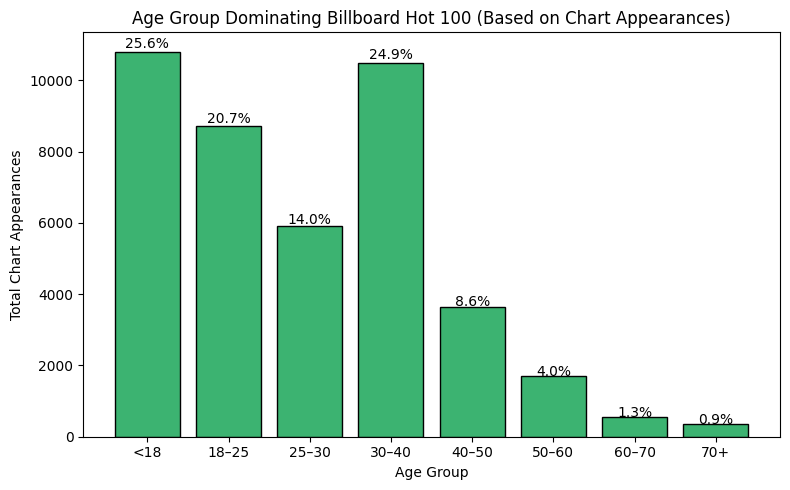

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Pastikan kolom tanggal dalam format datetime
merged_ha['Charting Week'] = pd.to_datetime(merged_ha['Charting Week'], errors='coerce')

# Step 2: Ambil tahun dari tanggal charting
merged_ha['Year'] = merged_ha['Charting Week'].dt.year

# Step 5: Hitung umur saat charting
merged_ha['Birth Date'] = pd.to_datetime(merged_ha['Birth Date'], errors='coerce')
merged_ha = merged_ha[merged_ha['Birth Date'].notna()]
merged_ha['Age'] = merged_ha['Year'] - merged_ha['Birth Date'].dt.year

# Step 6: Bikin kelompok umur
bins = [0, 18, 25, 30, 40, 50, 60, 70, 100]
labels = ['<18', '18–25', '25–30', '30–40', '40–50', '50–60', '60–70', '70+']
merged_ha['Age Group'] = pd.cut(merged_ha['Age'], bins=bins, labels=labels, right=False)

# Step 7: Hitung kemunculan per kelompok umur
age_counts = merged_ha['Age Group'].value_counts().sort_index()

# Step 8: Visualisasi
plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color='mediumseagreen', edgecolor='black')
plt.title("Age Group Dominating Billboard Hot 100 (Based on Chart Appearances)")
plt.xlabel("Age Group")
plt.ylabel("Total Chart Appearances")
plt.tight_layout()

# Tambah label persentase
total = age_counts.sum()
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1.01, f'{percent:.1f}%', ha='center')

plt.show()

In [100]:
import pandas as pd

GRAMMYS SONGS VS NON GRAMMY SONGS

In [101]:
#reupload cause i think i did something bad to the df T.T
grammys_df = pd.read_csv("grammys_data_FINAL.csv")
lyrics_df = pd.read_csv("lyrics_data_sentiment.csv")
artists_df = pd.read_csv("artists_data_FINAL.csv")
songs_df = pd.read_csv("songs_data_FINAL_am.csv")
hot_df = pd.read_csv("hot100_FINAL.csv")
grammys_5_df = pd.read_csv("grammys_5_cat.csv")

<ipython-input-102-5eaff8eeb45a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='Tempo', data=combined_df, palette=palette)
<ipython-input-102-5eaff8eeb45a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='Loudness', data=combined_df, palette=palette)


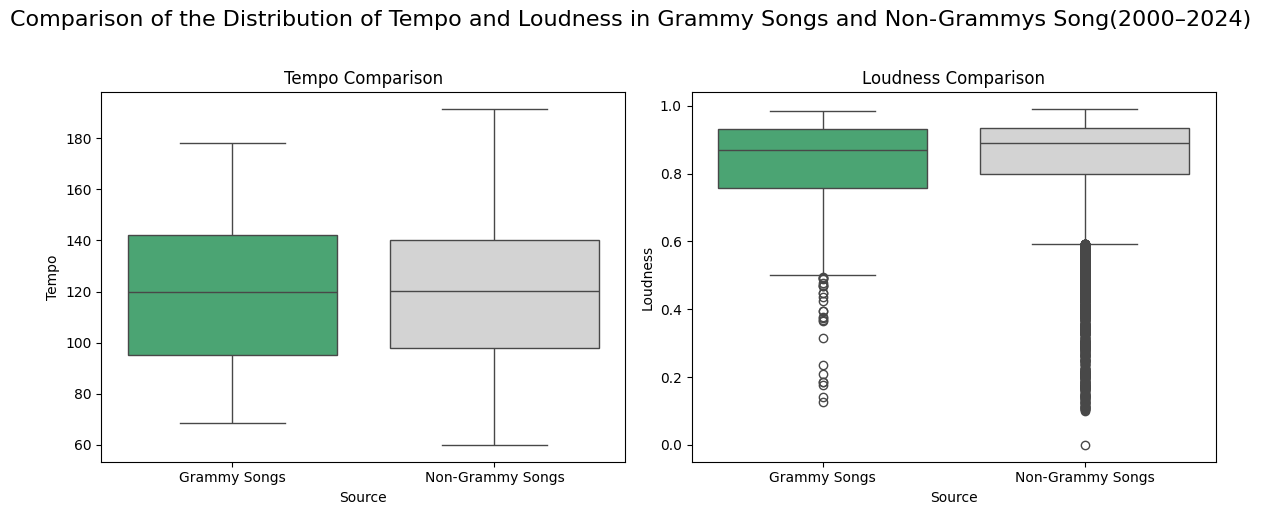

In [102]:
# Normalisasi
for df in [songs_df, grammys_df, hot_df]:
    df['Song ID'] = df['Song ID'].astype(str).str.strip()

# Lagu Grammy (unik)
grammy_songs = pd.merge(grammys_df[['Song ID', 'Year']], songs_df[['Song ID', 'Tempo', 'Loudness', 'ArtistID', 'Genre', 'Release Date']], on='Song ID', how='left')
grammy_songs['Source'] = 'Grammy Songs'

# Lagu Hot 100 (unik)
hot_songs = pd.merge(hot_df[['Song ID', 'Charting Week']], songs_df[['Song ID', 'Tempo', 'Loudness', 'ArtistID', 'Genre']], on='Song ID', how='left')
hot_songs['Source'] = 'Non-Grammy Songs'

# Parsing tanggal dari string (ambil bagian tanggal dari kalimat)
hot_songs['Charting Week'] = pd.to_datetime(hot_songs['Charting Week'], errors='coerce')

# Ambil tahunnya
hot_songs['Year_h'] = hot_songs['Charting Week'].dt.year

#Ganti Year_h jadi Year
hot_songs = hot_songs.rename(columns={'Year_h': 'Year'})

# Hilangkan duplikat agar per lagu unik
grammy_songs = grammy_songs.drop_duplicates(subset='Song ID')
hot_songs = hot_songs.drop_duplicates(subset='Song ID')

# Gabung dua sumber
combined_df = pd.concat([grammy_songs, hot_songs], ignore_index=True)

# Drop yang gak ada Tempo/Loudness
# combined_df = combined_df.dropna(subset=['', 'Tempo', 'Loudness'])

## Ubah Year ke integer
combined_df['Year'] = combined_df['Year'].astype(int)

# Visualisasi
plt.figure(figsize=(12, 5))

# Pilih warna custom
palette = {'Grammy Songs': 'mediumseagreen', 'Non-Grammy Songs': 'lightgrey'}

# Tempo
plt.subplot(1, 2, 1)
sns.boxplot(x='Source', y='Tempo', data=combined_df, palette=palette)
plt.title('Tempo Comparison')

# Loudness
plt.subplot(1, 2, 2)
sns.boxplot(x='Source', y='Loudness', data=combined_df, palette=palette)
plt.title('Loudness Comparison')

plt.suptitle('Comparison of the Distribution of Tempo and Loudness in Grammy Songs and Non-Grammys Song(2000–2024)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [103]:
print(len(grammy_songs))

317


In [104]:
combined_df['Year'].isna().sum()

np.int64(0)

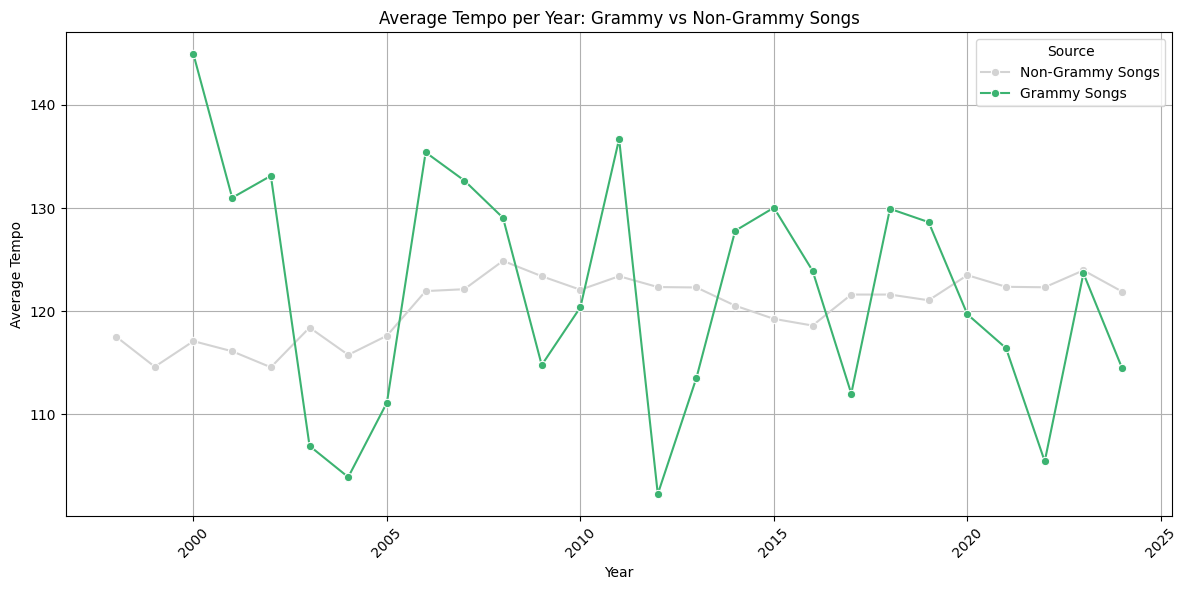

In [105]:
# Hitung rata-rata tempo per tahun per kategori
avg_tempo_by_year = combined_df.groupby(['Year', 'Source'])['Tempo'].mean().reset_index()

# Plot
palette = {'Grammy Songs': 'mediumseagreen', 'Non-Grammy Songs': 'lightgrey'}

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_tempo_by_year, x='Year', y='Tempo', hue='Source', marker='o', palette=palette)

plt.title('Average Tempo per Year: Grammy vs Non-Grammy Songs')
plt.xlabel('Year')
plt.ylabel('Average Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

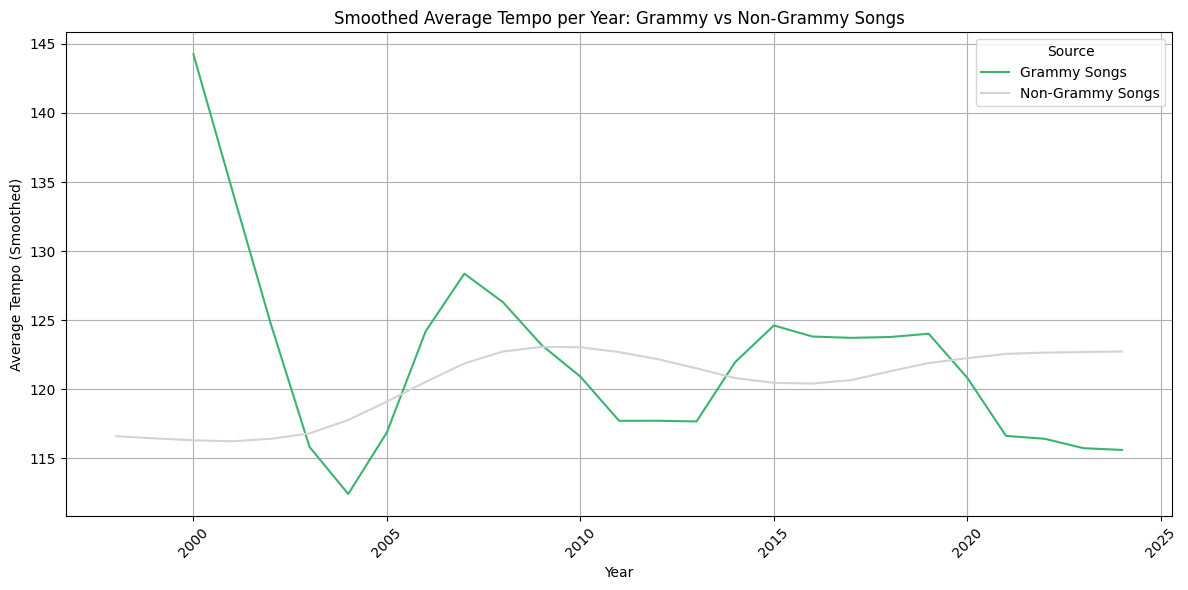

In [106]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Hasil smoothing
smoothed = []
for source in combined_df['Source'].unique():
    df_sub = avg_tempo_by_year[avg_tempo_by_year['Source'] == source]
    lowess_smoothed = lowess(df_sub['Tempo'], df_sub['Year'], frac=0.3)  # frac = seberapa halus
    smoothed.append(pd.DataFrame({
        'Year': lowess_smoothed[:, 0],
        'Tempo': lowess_smoothed[:, 1],
        'Source': source
    }))

smoothed_df = pd.concat(smoothed)

# Plot hasil smoothing
plt.figure(figsize=(12, 6))
sns.lineplot(data=smoothed_df, x='Year', y='Tempo', hue='Source', palette=palette)

plt.title('Smoothed Average Tempo per Year: Grammy vs Non-Grammy Songs')
plt.xlabel('Year')
plt.ylabel('Average Tempo (Smoothed)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

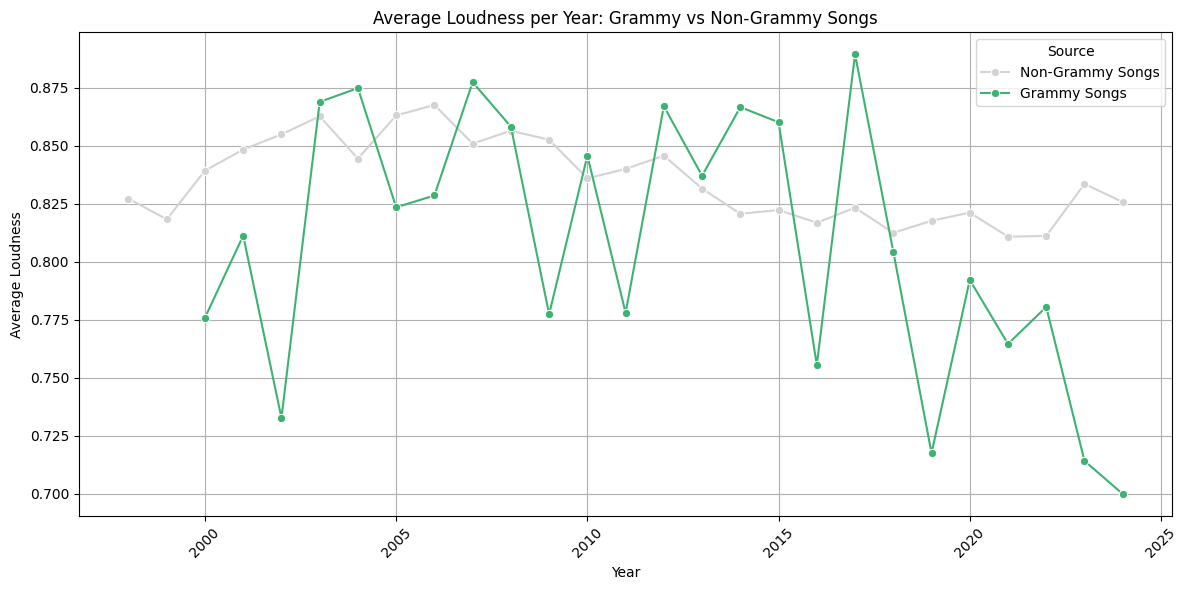

In [107]:
# Hitung rata-rata loudness per tahun per kategori
avg_loudness_by_year = combined_df.groupby(['Year', 'Source'])['Loudness'].mean().reset_index()

# Plot
palette = {'Grammy Songs': 'mediumseagreen', 'Non-Grammy Songs': 'lightgrey'}

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_loudness_by_year, x='Year', y='Loudness', hue='Source', marker='o', palette=palette)

plt.title('Average Loudness per Year: Grammy vs Non-Grammy Songs')
plt.xlabel('Year')
plt.ylabel('Average Loudness')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
avg_loudness_by_year['Source'].unique()

array(['Non-Grammy Songs', 'Grammy Songs'], dtype=object)

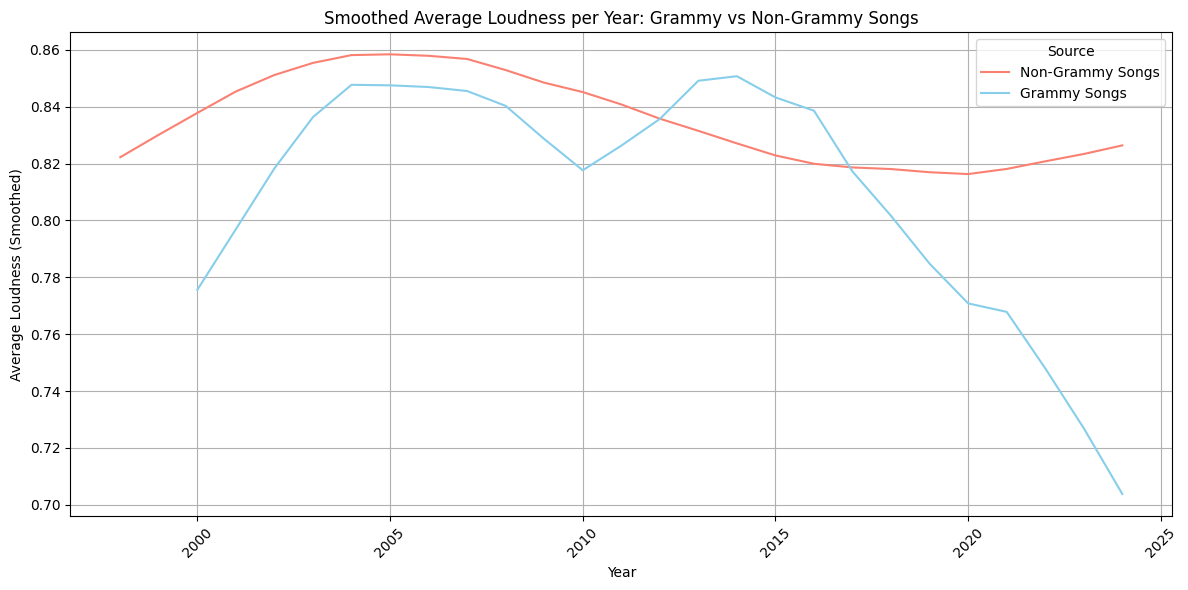

In [109]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Smoothing per kategori (Grammy / Non-Grammy)
smoothed = []
for source in avg_loudness_by_year['Source'].unique():
    df_sub = avg_loudness_by_year[avg_loudness_by_year['Source'] == source]
    lowess_smoothed = lowess(endog=df_sub['Loudness'], exog=df_sub['Year'], frac=0.3)

    smoothed.append(pd.DataFrame({
        'Year': lowess_smoothed[:, 0],
        'Loudness': lowess_smoothed[:, 1],
        'Source': source
    }))

# Gabung semua hasil smoothing
smoothed_df = pd.concat(smoothed)

# Plot
palette = {'Grammy Songs': 'skyblue', 'Non-Grammy Songs': 'salmon'}

plt.figure(figsize=(12, 6))
sns.lineplot(data=smoothed_df, x='Year', y='Loudness', hue='Source', palette=palette)

plt.title('Smoothed Average Loudness per Year: Grammy vs Non-Grammy Songs')
plt.xlabel('Year')
plt.ylabel('Average Loudness (Smoothed)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
combined_df.head(5)

Song ID  Year       Tempo  Loudness ArtistID        Genre Release Date  \
0  S133800  2024  101.000000  0.446684    A1382  Rap/Hip Hop   2024-05-04   
1  S133600  2024  129.659958  0.424210     A967          Pop   2024-04-19   
2  S133476  2024         NaN       NaN    A2223          Pop   2024-04-05   
3  S134012  2024  144.013611  0.209086    A1833  Alternative   2024-05-17   
4  S134372  2024   85.969513  0.836385    A1524      Electro   2024-05-10   

         Source Charting Week  
0  Grammy Songs           NaT  
1  Grammy Songs           NaT  
2  Grammy Songs           NaT  
3  Grammy Songs           NaT  
4  Grammy Songs           NaT

In [111]:
combined_df.head(5)

Song ID  Year       Tempo  Loudness ArtistID        Genre Release Date  \
0  S133800  2024  101.000000  0.446684    A1382  Rap/Hip Hop   2024-05-04   
1  S133600  2024  129.659958  0.424210     A967          Pop   2024-04-19   
2  S133476  2024         NaN       NaN    A2223          Pop   2024-04-05   
3  S134012  2024  144.013611  0.209086    A1833  Alternative   2024-05-17   
4  S134372  2024   85.969513  0.836385    A1524      Electro   2024-05-10   

         Source Charting Week  
0  Grammy Songs           NaT  
1  Grammy Songs           NaT  
2  Grammy Songs           NaT  
3  Grammy Songs           NaT  
4  Grammy Songs           NaT

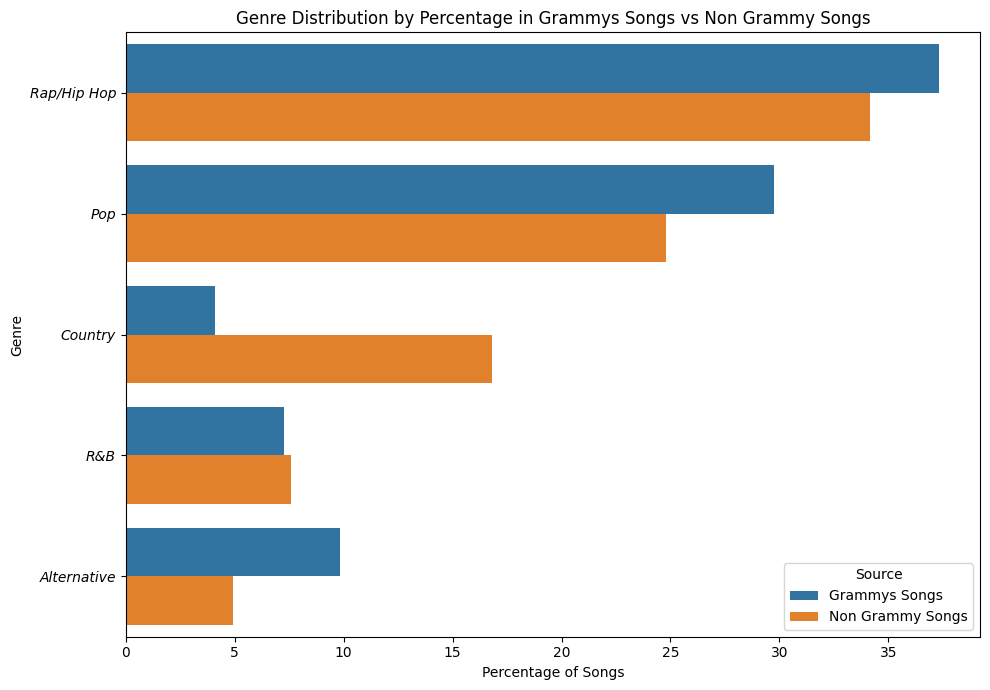

In [112]:
# Normalisasi ID
for df in [songs_df, grammys_df, hot_df]:
    df['Song ID'] = df['Song ID'].astype(str).str.strip()

# Tambahkan Genre ke Grammy dan Billboard
grammy_genre = pd.merge(grammys_df[['Song ID']], songs_df[['Song ID', 'Genre']], on='Song ID', how='left')
hot100_genre = pd.merge(hot_df[['Song ID']], songs_df[['Song ID', 'Genre']], on='Song ID', how='left')

# Tambahkan label sumber
grammy_genre['Source'] = 'Grammys Songs'
hot100_genre['Source'] = 'Non Grammy Songs'  # ← diperbarui dari 'Hot 100'

# Gabungkan data dari dua sumber
genre_df = pd.concat([grammy_genre, hot100_genre], ignore_index=True)

# Hilangkan duplikat agar per lagu dihitung sekali per sumber
genre_df = genre_df.drop_duplicates(subset=['Song ID', 'Source'])

# Hapus lagu yang tidak memiliki genre
genre_df = genre_df.dropna(subset=['Genre'])

# Hitung total lagu per sumber (Grammy / Billboard)
total_per_source = genre_df.groupby('Source').size().to_dict()

# Hitung jumlah genre per sumber
genre_counts = genre_df.groupby(['Genre', 'Source']).size().reset_index(name='Count')

# Hitung persentase tiap genre terhadap total lagu dalam masing-masing sumber
genre_counts['Percentage'] = genre_counts.apply(
    lambda row: row['Count'] / total_per_source[row['Source']] * 100, axis=1
)

# Ambil 5 genre teratas secara keseluruhan
top_genres = genre_counts.groupby('Genre')['Count'].sum().nlargest(5).index.tolist()
genre_counts_top = genre_counts[genre_counts['Genre'].isin(top_genres)]

# Urutkan genre berdasarkan rata-rata persentase (descending)
genre_order = genre_counts_top.groupby('Genre')['Percentage'].mean().sort_values(ascending=False).index.tolist()

# Plot bar horizontal
plt.figure(figsize=(10, 7))
sns.barplot(
    data=genre_counts_top,
    y='Genre', x='Percentage', hue='Source',
    order=genre_order
)
plt.title('Genre Distribution by Percentage in Grammys Songs vs Non Grammy Songs')
plt.xlabel('Percentage of Songs')
plt.ylabel('Genre')
plt.yticks(fontstyle='italic')
plt.tight_layout()
plt.show()

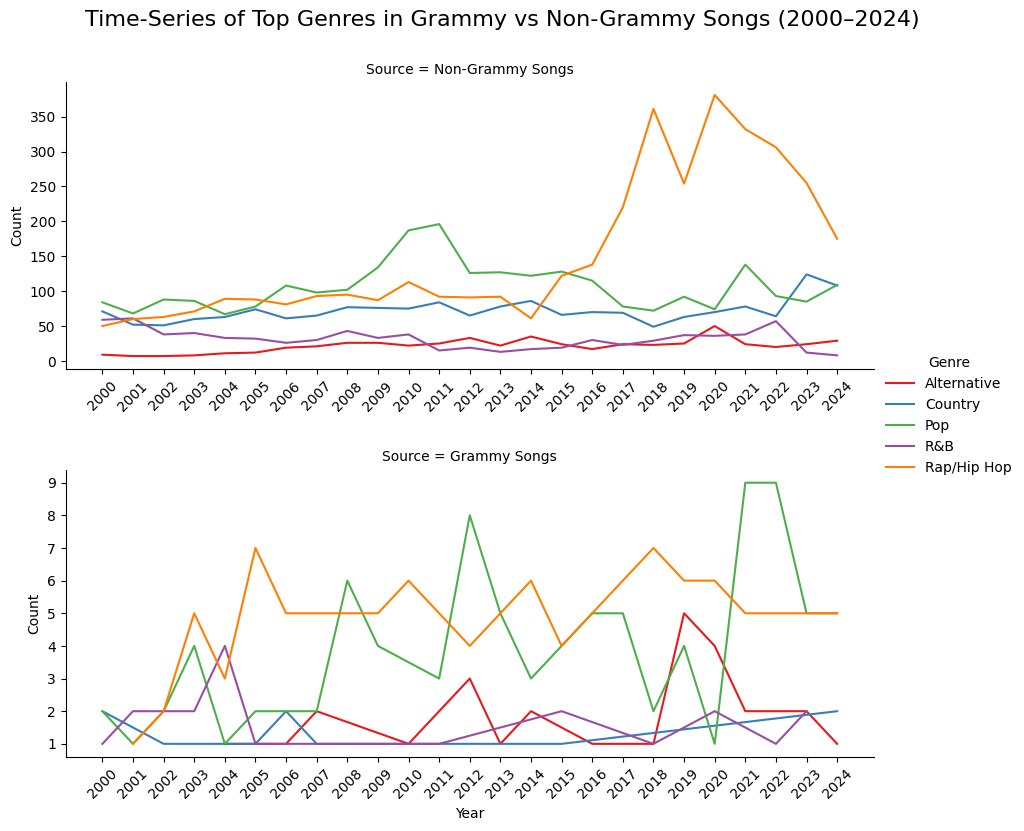

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hapus baris yang tidak memiliki genre
genre_df = combined_df.dropna(subset=['Genre'])

# Filter tahun 2000–2024
genre_df = genre_df[genre_df['Year'].between(2000, 2024)]

# Ambil 7 genre paling umum
top_genres = ['Rap/Hip Hop', 'Pop', 'Country', 'R&B', 'Alternative', ]
genre_df = genre_df[genre_df['Genre'].isin(top_genres)]

# Hitung jumlah lagu per Genre, Year, dan Source
genre_year = genre_df.groupby(['Year', 'Genre', 'Source']).size().reset_index(name='Count')

# Plot lineplot
g = sns.relplot(
    data=genre_year,
    x='Year', y='Count',
    hue='Genre', kind='line',
    row='Source',
    palette='Set1',
    height=4.5, aspect=2,
    facet_kws={'sharey': False}
)

# Tampilkan semua label tahun di x-axis
for ax in g.axes.flat:
    ax.set_xticks(range(2000, 2025))
    ax.set_xticklabels(range(2000, 2025), rotation=45)
    ax.tick_params(labelbottom=True)

# Judul
g.fig.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
g.fig.suptitle("Time-Series of Top Genres in Grammy vs Non-Grammy Songs (2000–2024)", fontsize=16)

plt.show()

<ipython-input-114-fb85d8d93f78>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = combined_df.groupby(['Age Category', 'Source']).size().reset_index(name='Count')
<ipython-input-114-fb85d8d93f78>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = combined_df.groupby(['Age Category', 'Source']).size().reset_index(name='Count')


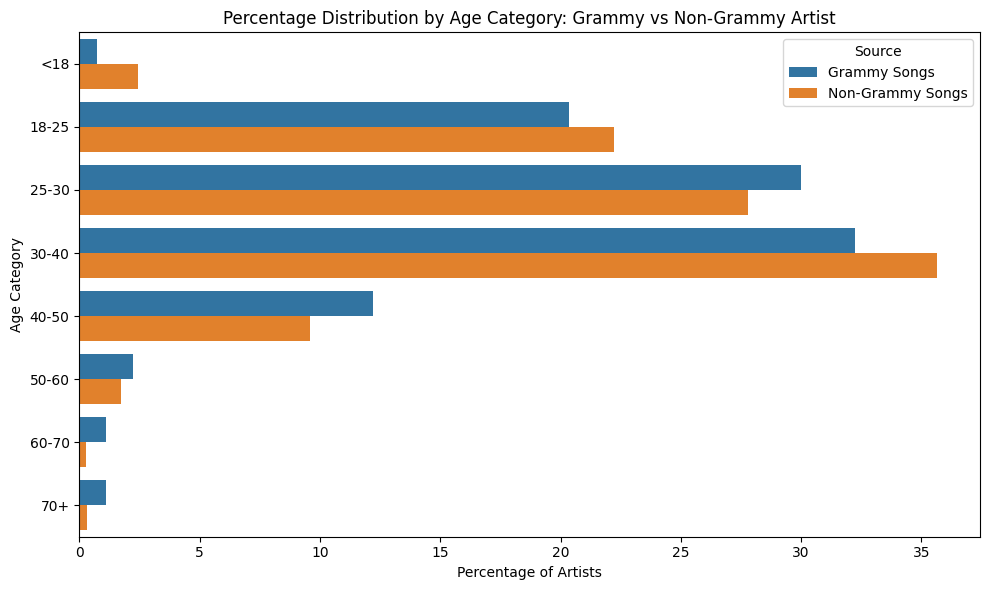

In [114]:
# Merge data artis ke combined_df
combined_df = pd.merge(
    combined_df,
    artists_df[['ArtistID', 'Birth Date', 'Gender']],
    on='ArtistID',
    how='left'
)

# Pastikan Birth Date dalam format datetime
combined_df['Birth Date'] = pd.to_datetime(combined_df['Birth Date'], errors='coerce')

# Hapus yang tidak punya tanggal lahir atau tahun
combined_df = combined_df.dropna(subset=['Birth Date', 'Year'])

# Hitung usia saat Grammy
combined_df['Age'] = combined_df['Year'] - combined_df['Birth Date'].dt.year

# Buat kategori usia
age_bins = [0, 18, 25, 30, 40, 50, 60, 70, 100]
age_labels = ['<18', '18-25', '25-30', '30-40', '40-50', '50-60', '60-70', '70+']


combined_df['Age Category'] = pd.cut(combined_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Hapus baris NaN pada Age Category
combined_df = combined_df.dropna(subset=['Age Category'])

# Hitung distribusi per kategori usia dan sumber
age_dist = combined_df.groupby(['Age Category', 'Source']).size().reset_index(name='Count')

# Hitung total per Source
total_per_source = combined_df['Source'].value_counts().to_dict()

# Hitung persentase
age_dist['Percentage'] = age_dist.apply(lambda row: row['Count'] / total_per_source[row['Source']] * 100, axis=1)

# Urutkan Age Category secara eksplisit
age_dist['Age Category'] = pd.Categorical(age_dist['Age Category'], categories=age_labels, ordered=True)
age_dist = age_dist.sort_values('Age Category')

# Hapus baris NaN jika ada
combined_df = combined_df.dropna(subset=['Age Category'])

# Hitung total per sumber
total_per_source = combined_df['Source'].value_counts().to_dict()

# Hitung jumlah per Age Category dan Source
age_counts = combined_df.groupby(['Age Category', 'Source']).size().reset_index(name='Count')

# Hitung persentase terhadap total per sumber
age_counts['Percentage'] = age_counts.apply(
    lambda row: row['Count'] / total_per_source[row['Source']] * 100,
    axis=1
)

# Pastikan Age Category berurutan
age_labels = ['<18', '18-25', '25-30', '30-40', '40-50', '50-60', '60-70', '70+']
age_counts['Age Category'] = pd.Categorical(age_counts['Age Category'], categories=age_labels, ordered=True)
age_counts = age_counts.sort_values('Age Category')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_counts,
    y='Age Category', x='Percentage', hue='Source',
    order=age_labels, orient='h'
)
plt.title('Percentage Distribution by Age Category: Grammy vs Non-Grammy Artist')
plt.xlabel('Percentage of Artists')
plt.ylabel('Age Category')
plt.legend(title='Source')
plt.tight_layout()
plt.show()

<ipython-input-115-834520b577e0>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = combined_df.groupby(['Year', 'Age Category', 'Source']).size().reset_index(name='Count')


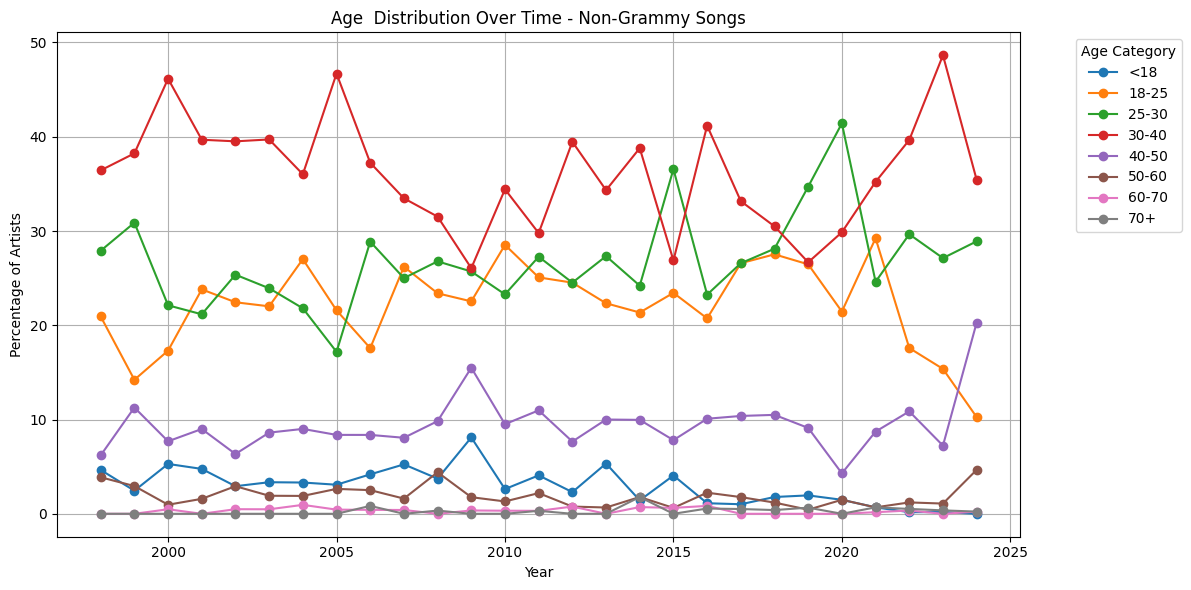

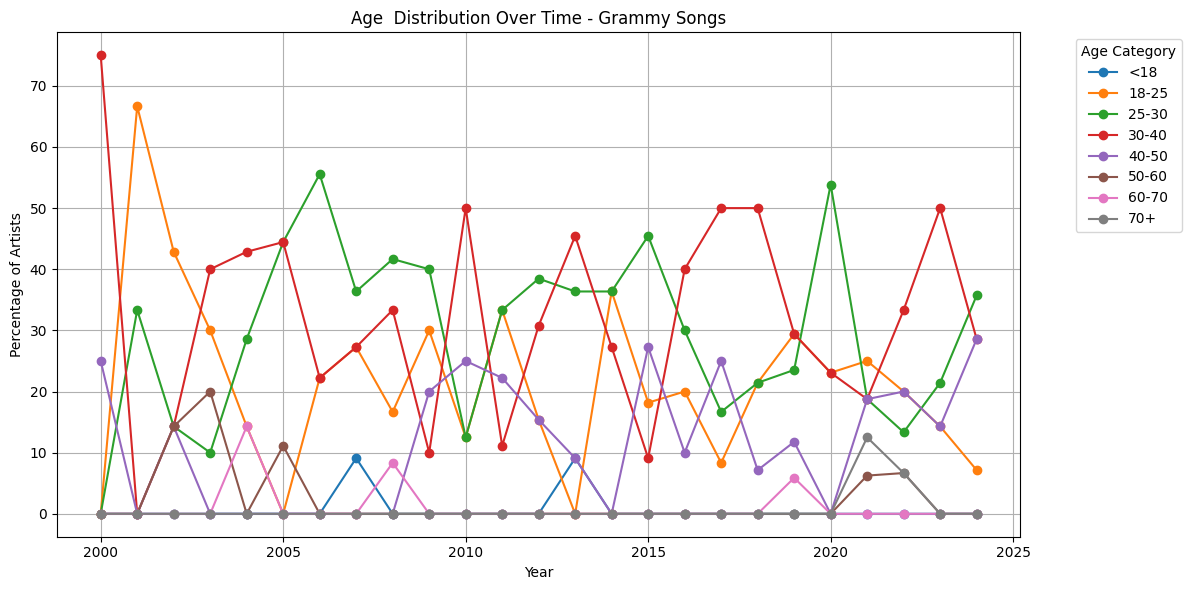

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Hapus NaN yang diperlukan
combined_df = combined_df.dropna(subset=['Age Category', 'Year'])

# Kelompokkan: hitung jumlah per Tahun, Usia, dan Sumber
grouped = combined_df.groupby(['Year', 'Age Category', 'Source']).size().reset_index(name='Count')

# Hitung total per tahun per source
totals = combined_df.groupby(['Year', 'Source']).size().reset_index(name='Total')

# Gabungkan totalnya ke dalam grouped
merged = pd.merge(grouped, totals, on=['Year', 'Source'])
merged['Percentage'] = merged['Count'] / merged['Total'] * 100

# Pastikan kategori usia urut
age_labels = ['<18', '18-25', '25-30', '30-40', '40-50', '50-60', '60-70', '70+']
merged['Age Category'] = pd.Categorical(merged['Age Category'], categories=age_labels, ordered=True)

# Plot untuk masing-masing Source (Grammy dan Non-Grammy)
for source in merged['Source'].unique():
    plt.figure(figsize=(12, 6))
    subset = merged[merged['Source'] == source]
    for age_cat in age_labels:
        data = subset[subset['Age Category'] == age_cat]
        if not data.empty:
            plt.plot(data['Year'], data['Percentage'], marker='o', label=age_cat)

    plt.title(f'Age  Distribution Over Time - {source}')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Artists')
    plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

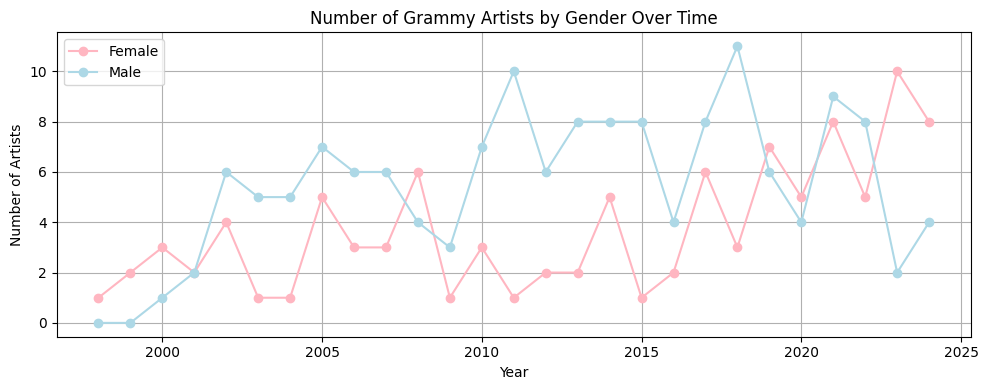

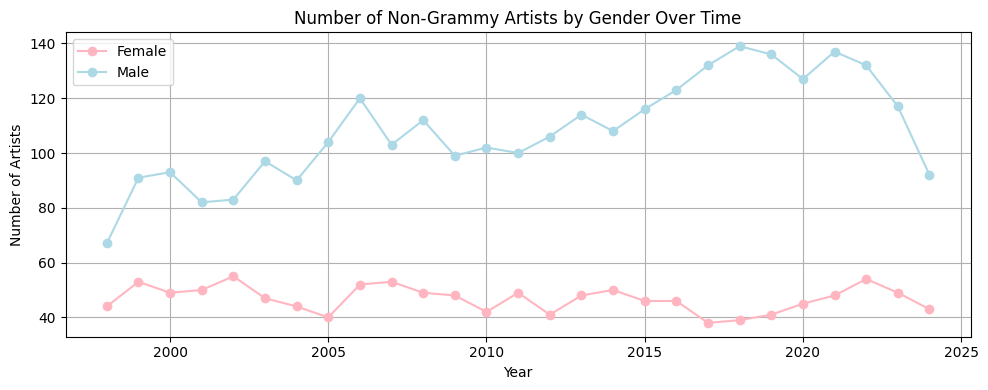

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Gabungkan Grammy dan Hot 100 dengan informasi gender
combined = pd.concat([
    grammy_songs.rename(columns={'Year': 'Year'}),
    hot_songs.rename(columns={'Charting Week': 'Release Date'})
], ignore_index=True)

# Gabung dengan artist_df untuk dapatkan gender
combined = pd.merge(combined, artists_df[['ArtistID', 'Gender']], on='ArtistID', how='left')

# Format tanggal dan ambil tahun
combined['Release Date'] = pd.to_datetime(combined['Release Date'], errors='coerce')
combined['Year'] = combined['Release Date'].dt.year.fillna(combined['Year'])
combined['Year'] = combined['Year'].astype('Int64')

# Hapus baris yang tidak punya gender atau tahun
combined = combined.dropna(subset=['Gender', 'Year'])
combined = combined[combined['Gender'].isin(['M', 'F'])]

# Hapus duplikat artis per tahun per source
combined_unique = combined.drop_duplicates(subset=['Source', 'Year', 'ArtistID'])

# Hitung jumlah artis per gender per tahun per sumber
gender_yearly = (
    combined_unique.groupby(['Source', 'Year', 'Gender'])['ArtistID']
    .nunique()
    .reset_index(name='Count')
)

# Pisahkan untuk Grammy dan Non-Grammy
grammy_data = gender_yearly[gender_yearly['Source'] == 'Grammy Songs']
non_grammy_data = gender_yearly[gender_yearly['Source'] == 'Non-Grammy Songs']

# Pivot agar mudah diplot
grammy_pivot = grammy_data.pivot(index='Year', columns='Gender', values='Count').fillna(0)
non_grammy_pivot = non_grammy_data.pivot(index='Year', columns='Gender', values='Count').fillna(0)

# Plot Grammy
plt.figure(figsize=(10, 4))
plt.plot(grammy_pivot.index, grammy_pivot['F'], label='Female', color='lightpink', marker='o')
plt.plot(grammy_pivot.index, grammy_pivot['M'], label='Male', color='lightblue', marker='o')
plt.title("Number of Grammy Artists by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Artists")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Non-Grammy
plt.figure(figsize=(10, 4))
plt.plot(non_grammy_pivot.index, non_grammy_pivot['F'], label='Female', color='lightpink', marker='o')
plt.plot(non_grammy_pivot.index, non_grammy_pivot['M'], label='Male', color='lightblue', marker='o')
plt.title("Number of Non-Grammy Artists by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Artists")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()